In [1]:
%matplotlib inline
from CartPole import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn import linear_model
import math
from sklearn.decomposition import PCA

# Task 4
## Defining action as non-linear combination of system state variables

In [2]:
plot_path = 'plots/Task4/'

In [3]:
n=20
no_RBC = 5
# x_train, y_train, x_test, y_test = generate_data(n) # TODO change these to values more evenly spaced
index_to_variable = {0 : 'cart_location', 1 : 'cart_velocity', 2 : 'pole_angle', 3 : 'pole_velocity', 4 : 'action'}
policy_training_data = np.random.normal(0,1,(n,4))#TODO write a function to do this better
# policy_training_data = np.array([[0,0,np.random.normal(),0,0] for i in range())

alpha_start = np.random.uniform(-3,3,4)
w_i_start = np.random.uniform(-0.1,0.1,no_RBC)
W_ = np.random.uniform(-0.1,0.1,(4,4))
W_start = np.matmul(W_.T,W_) # This is to ensure it is symmetric
X_i_vals = policy_training_data[np.random.randint(0,n,no_RBC)]

In [4]:
pca = PCA()#n_components=4
pca.fit(policy_training_data)
U = pca.components_
sing_ = pca.singular_values_
sing_matrix = np.zeros((4,4))
for i in range(4):
    sing_matrix[i,i] = sing_[i] 
W = np.matmul(np.matmul(U.T,sing_matrix), U)
W

array([[ 3.68075044,  0.08246948, -0.64449233,  0.09958902],
       [ 0.08246948,  4.33909227, -0.47898637,  0.26737771],
       [-0.64449233, -0.47898637,  4.88274552,  0.37906022],
       [ 0.09958902,  0.26737771,  0.37906022,  4.41964447]])

In [5]:
array_start = np.concatenate((w_i_start, W_start.flatten()))
kwargs_ = {'linear':False, 'w_i':w_i_start, 'X_i_vals':X_i_vals, 'entire_array':array_start,
           'W':W, 'parameter_to_be_optimised':'w_i', 
           'model_predictive_control':False, 'alpha':0.5,
           'sig_start':np.array([0.75, 0.6, 0.25, 0.4]),
           'sig_end':np.array([0.75, 0.6, 0.25, 0.4])}

optim_ = scipy.optimize.minimize(training_loss, w_i_start, method = 'Nelder-Mead',
                        args=(np.array([0.5,0.5,0.5,0.5,0]), kwargs_), 
                              options={'disp':True})
w_i = optim_['x'][:-16]
w_i_start, w_i, w_i_start.shape

-1.2741262898641591e-05
-1.2537505036832384e-17
-5.099872205126857e-65
-1.6179431785104349e-130
-8.120986070631327e-51
-3.029400643423042e-11
-0.006109175876965939
0.00014602167857199257
8.667053168594723e-33
1.4808828890433274e-99
5.513526887288565e-35
3.821170310362424e-06
-0.000837572748499675
-3.147473511262523e-15
-2.7905051326471475e-63
-3.942070353352975e-124
-1.5518681200534112e-45
-2.16497014289105e-08
-0.0033662920352609525
6.73059381871691e-10
-1.2742870752594046e-05
-1.2537504992243146e-17
-5.099872161950163e-65
-1.617943181701406e-130
-8.12098611610715e-51
-3.02940087032467e-11
-0.006283795145104522
0.00014605019907848677
8.67263603150241e-33
1.4812843468831928e-99
5.510632074993083e-35
3.820978594456532e-06
-0.0008375163097539241
-3.147627766378353e-15
-2.7912155219096496e-63
-3.942984845484448e-124
-1.5517930544196894e-45
-2.1649082831302543e-08
-0.003464937862960858
6.732443900806821e-10
-1.3376722647310065e-05
-1.316436175491362e-17
-5.3548478976885046e-65
-1.698841661

-3.549871680013553e-63
-5.022936606622409e-124
-1.9714487871324188e-45
-2.7491362140313073e-08
-0.00447757019103912
3.9243215306609354e-10
-1.674745457355213e-05
-1.6475122187081748e-17
-6.7014921078526625e-65
-2.1261151276183664e-130
-1.0671763770586342e-50
-3.980883180732545e-11
-0.008502308656744851
6.791161396427588e-05
4.056154639334177e-33
6.894866059455442e-100
2.5389278591302026e-35
1.7712058196908955e-06
-0.001099458537728159
-4.136367321835304e-15
-3.6746300116430167e-63
-5.201036372466144e-124
-2.040084218080585e-45
-2.8446241024345334e-08
-0.004705331945252698
3.1337144994481674e-10
-1.80655713162735e-05
-1.7769924219880664e-17
-7.228142334946097e-65
-2.2932197819478587e-130
-1.151055850479319e-50
-4.2937630929131177e-11
-0.009370301694142765
3.5277835619039364e-05
2.1118404453551463e-33
3.5831110484673144e-100
1.3141550747672568e-35
9.189690359454469e-07
-0.001185408311939958
-4.461646847415796e-15
-3.966556323787909e-63
-5.61796865412552e-124
-2.2007114400526634e-45
-3.06

-1.8760235269313492e-07
-0.037089341849980535
-9.730157329317766e-09
-0.00010499050114874926
-1.0319709916054573e-16
-4.196560288187902e-64
-1.3321635057795179e-129
-6.687956168940238e-50
-2.4942009588504873e-10
-0.06042582541238141
-0.0018693212626970579
-1.2791755888816395e-31
-1.9458398864012578e-98
-5.633683379843532e-34
-4.533635614429025e-05
-0.006725452130382764
-2.5958089800073986e-14
-2.409172547909268e-62
-3.556142732415299e-123
-1.289120169723761e-44
-1.7776150903708765e-07
-0.034347563953315036
-8.840192116478695e-09
-0.00011571655130922007
-1.1372695555576923e-16
-4.6246107284576134e-64
-1.4681468233295456e-129
-7.370821347893019e-50
-2.748787227847577e-10
-0.06772353881966618
-0.0021634534808624003
-1.5090796631745633e-31
-2.2602878601263714e-98
-6.325304285651451e-34
-5.193664545620724e-05
-0.007386841502524046
-2.862075785163966e-14
-2.673612891319661e-62
-3.966496485787851e-123
-1.421809813109942e-44
-1.958088594391716e-07
-0.038623454783875265
-1.0267527941590469e-08


-0.0023450718954791654
-2.2930126943407506e-15
-9.261155852932876e-63
-2.982948990422525e-128
-1.5051353415569617e-48
-5.578777701396961e-09
-1.4139057789296503
-0.21702608568303094
-6.5561140635957225e-28
-9.597553125594607e-96
-1.8187067501377794e-34
-0.0007865190840400731
-0.07026205750293021
-6.139396598000537e-13
-2.1521532829212693e-60
-8.432511136773947e-121
-3.029087534809104e-43
-3.210817916116895e-06
-1.368861308693221
-3.392382645201822e-06
-0.002374450710117135
-2.3216029393174215e-15
-9.375787672294343e-63
-3.020447205645786e-128
-1.524157106581005e-48
-5.648825530776808e-09
-1.429990725319571
-0.22276015786891196
-7.070483939909334e-28
-1.0134342716495146e-95
-1.733350812192268e-34
-0.0007891817759119282
-0.07034924605918415
-6.207850585784687e-13
-2.2097678401474582e-60
-8.831587863688622e-121
-3.0769795724688866e-43
-3.2409599999107313e-06
-1.3928934117493552
-3.553420035406633e-06
-0.003176282933988278
-3.1000707741882867e-15
-1.2489047699604433e-62
-4.044400545153103e

-4.030680643174689e-05
-2.0144070283872586e-17
-4.7071607430649135e-66
-2.631361096781496e-108
-7.359748765693956e-38
-1.370797872842835e-07
-9.932731595531202
-8.47515088356797e-11
-0.0068157505954459414
-6.598744469809423e-15
-2.6290467136909037e-62
-8.717451428596945e-128
-4.4431601210321517e-48
-1.626741387617812e-08
-4.107794799293863
-6.025680349171951
-2.5004701670311174e-20
-1.1461246059630094e-87
-3.081288171467089e-41
-0.00013972676771861861
-0.0010906251197014374
-4.892290103088704e-15
-4.0999505425091737e-63
-9.228468872367655e-113
-3.481059797264873e-39
-3.935996904754483e-06
-15.353760221063528
-4.361142526530914e-05
-0.00794319270593776
-7.671080863732612e-15
-3.045791785754682e-62
-1.017355047793004e-127
-5.1984815761854644e-48
-1.8973932269325623e-08
-4.788729919792381
-10.960117248151622
-2.5651144127681757e-17
-9.123046730090207e-83
-1.3865688424576123e-45
-9.454164679845928e-06
-5.1008992325702434e-05
-3.623388371668802e-17
-8.950363751118388e-66
-1.0762482091883599

-7.383323490630302
-2.2274215950573407e-19
-3.0409144756919057e-86
-1.8693166504067185e-42
-7.137695017296711e-05
-0.0003895509703725427
-1.1869178102534661e-15
-6.128235724612636e-64
-1.958970661790332e-111
-1.1904812289414117e-38
-2.1570572744877456e-06
-18.42646604940602
-5.170580095778362e-06
-0.007012007691361351
-6.785786837659094e-15
-2.7019496600802585e-62
-8.970614718925843e-128
-4.574213327994951e-48
-1.67381983173119e-08
-4.2275621345889345
-6.728051953734715
-8.000657562588616e-20
-6.360187601982676e-87
-7.183968237889322e-42
-9.947801679451745e-05
-0.0006348981904175206
-2.3415170447774434e-15
-1.5068638070722698e-63
-4.691629503005803e-112
-6.871226569131222e-39
-2.948086891001815e-06
-17.291101821096273
-1.6450165377881555e-05
-0.007177586821332335
-6.943483618898601e-15
-2.763345188490923e-62
-9.184325383250578e-128
-4.684931707531694e-48
-1.71355449393596e-08
-4.326428958343729
-7.359148114910435
-2.1473961635473006e-19
-2.8730070694560365e-86
-1.9632052982848512e-42
-

-18.363601453116758
-5.718927377783238e-06
-0.007142120122122264
-6.9097179079824995e-15
-2.750204690301588e-62
-9.138545387315443e-128
-4.6612073370371815e-48
-1.705043292713294e-08
-4.304941108070574
-7.218508354288588
-1.73057971552067e-19
-2.0574583175167518e-86
-2.6206180706781693e-42
-7.76985518128585e-05
-0.0004396588626629795
-1.4070383050785782e-15
-7.65929751990449e-64
-1.3786480090579267e-111
-1.0448233734706716e-38
-2.342390188680304e-06
-18.21506178817783
-7.05222364644618e-06
-0.0071361078824139805
-6.9039960131523135e-15
-2.747977650731842e-62
-9.13078859709652e-128
-4.6571879102881853e-48
-1.703601158874645e-08
-4.301016097085936
-7.193681662302828
-1.665060587583381e-19
-1.9385953680796323e-86
-2.7593634553102898e-42
-7.870966035520766e-05
-0.00044786502013372865
-1.4436201881369645e-15
-7.920313042262297e-64
-1.3072197480218606e-111
-1.0243880132832691e-38
-2.371678158568982e-06
-18.180672751631917
-7.385202562949298e-06
-0.007121339018845741
-6.889926592754837e-15
-2

-1.0714432923705245e-38
-2.3106624261522453e-06
-18.264252632123714
-6.687612283378205e-06
-0.007151532460233964
-6.918697224711252e-15
-2.7536995863550367e-62
-9.150717974000522e-128
-4.66751492902502e-48
-1.7073064050187292e-08
-4.308647130553456
-7.2464035587448485
-1.8039667601462423e-19
-2.192963224905311e-86
-2.4830738314138433e-42
-7.668183531335632e-05
-0.00043105317564172635
-1.36714090780585e-15
-7.364896783534341e-64
-1.4652729830785955e-111
-1.0705510071479813e-38
-2.3132526661139073e-06
-18.264537255779413
-6.7115844018675785e-06
-0.00715409160467627
-6.921134194234359e-15
-2.7546480204067543e-62
-9.154021872459546e-128
-4.669227035680792e-48
-1.7079206549123833e-08
-4.310143356490906
-7.256285480715319
-1.8315216755303437e-19
-2.2448791201619385e-86
-2.43345733548553e-42
-7.629600398240021e-05
-0.00042793442365131746
-1.35325561772948e-15
-7.266551004734366e-64
-1.496655446624511e-111
-1.0791110437615008e-38
-2.3020251555379545e-06
-18.278422303715864
-6.589609999987257e-

-1.7123431809730816e-08
-4.297215366713407
-7.215847292414427
-1.6920172686340736e-19
-1.9800956270737328e-86
-2.7499377224714036e-42
-7.894793779123241e-05
-0.0004452227230729774
-1.4122704729342558e-15
-7.560389175511122e-64
-1.3903271423977726e-111
-1.068252629261259e-38
-2.384054093033525e-06
-18.34044147836829
-7.288892978773488e-06
-0.007176045226606257
-6.9422380603924766e-15
-2.7628624751638593e-62
-9.182629058334737e-128
-4.684050164814989e-48
-1.713239288666359e-08
-4.30069910542135
-7.236238659156
-1.747603329168142e-19
-2.081578999561205e-86
-2.6318321238936856e-42
-7.807221339675709e-05
-0.00043834051841880296
-1.382758033737826e-15
-7.359682252100786e-64
-1.4515953251262774e-111
-1.0846923304372075e-38
-2.358364366865736e-06
-18.36366403464876
-7.009328503818596e-06
-0.007176069583841897
-6.942306885407962e-15
-2.762889660805829e-62
-9.182720865409123e-128
-4.6840972522036374e-48
-1.7132563900550257e-08
-4.295616230687054
-7.212493059166462
-1.6786942508046163e-19
-1.9550

-3.9996942277175666e-87
-1.3943895761063642e-41
-0.0001254181477035367
-0.0007518794853694574
-2.318143365611028e-15
-1.0987304792307011e-63
-6.286791360560556e-112
-1.0596548225983344e-38
-3.832809063241514e-06
-19.452815062581813
-2.509416715095224e-05
-0.007525910360485426
-7.278662454019208e-15
-2.8936628918187497e-62
-9.639241394448408e-128
-4.920839306712225e-48
-1.798116990474897e-08
-4.107614920910246
-6.711679325508534
-5.791754442427775e-20
-3.7251460796373524e-87
-1.4560180769611312e-41
-0.00012610408936112336
-0.0007681586618558322
-2.425250322275037e-15
-1.1912921662830849e-63
-5.59671588874304e-112
-9.904345527707855e-39
-3.837669654154728e-06
-19.180671507034837
-2.619807115552162e-05
-0.007622574423045145
-7.371242358185358e-15
-2.9296046130469853e-62
-9.76509959506203e-128
-4.9861741126779285e-48
-1.8215068167596235e-08
-4.085334760672301
-6.704390189847558
-5.426282842601531e-20
-3.3514633222177466e-87
-1.6673872906789556e-41
-0.00013186464687962897
-0.000797964423370

-3.868175027640848
-6.593534096208973
-2.735621872057921e-20
-1.1374983280310701e-87
-6.471679096981206e-41
-0.00020451420011974859
-0.0011889989444338355
-2.8584480418122467e-15
-8.80556296145777e-64
-6.333985587436611e-112
-1.7885500006790094e-38
-6.504326121294344e-06
-22.872404986734406
-6.489281224030686e-05
-0.009022202924051214
-8.707139571529307e-15
-3.4457993059911405e-62
-1.1590631380801706e-127
-5.936969600132306e-48
-2.1605155239782405e-08
-3.7758727378222825
-6.4889570232524125
-1.9047484553237607e-20
-6.59811154154189e-88
-1.2173546321698601e-40
-0.0002479391609089392
-0.001455376447869142
-3.242562637364841e-15
-8.770387286221085e-64
-5.645553769765297e-112
-2.0406965770536167e-38
-7.965515918148837e-06
-23.904021288455077
-9.530151475440651e-05
-0.008899469783793136
-8.590136127463016e-15
-3.400768598001376e-62
-1.143004258321981e-127
-5.853097249100079e-48
-2.130712311479996e-08
-3.824704706018863
-6.619761099128905
-2.527910725299277e-20
-9.967364341700572e-88
-8.0483

-3.3741685259465164e-15
-1.888295618789393e-64
-2.624080343412342e-111
-1.8617993209361226e-37
-3.2282701055132586e-05
-44.511823817670205
-0.0002959082456791907
-0.01595507137582204
-1.5197202057082546e-14
-5.888378029077593e-62
-2.071972281425034e-127
-1.077957932167042e-47
-3.848760107320592e-08
-2.7820576769475185
-5.492961692217474
-4.208784830261524e-22
-3.700976309677885e-90
-7.149398259220728e-38
-0.0017056827045083861
-0.01227053426979549
-1.1913402655346567e-14
-8.64501539821149e-64
-1.6131259396158782e-112
-7.140857168035795e-38
-5.802949812361031e-05
-32.19031420472558
-0.002716020827955786
-0.012356406737581578
-1.1852543693501078e-14
-4.643119782594381e-62
-1.596017372917237e-127
-8.236614764479697e-48
-2.970037537674417e-08
-3.4237435547526687
-6.9889883730199545
-1.4117688637212678e-20
-3.704182586608518e-88
-5.263521098766014e-40
-0.0004576055523522485
-0.002013945518504753
-2.1308630847655035e-15
-1.7576151342368635e-64
-4.1163765197350705e-111
-1.2851074688902362e-37

-0.00017746156982758856
-0.012939668167359685
-1.2398199739543081e-14
-4.8482436350854355e-62
-1.672856571691798e-127
-8.644473373860458e-48
-3.1121153219915174e-08
-3.334038128887517
-6.852197791813609
-9.538006863569929e-21
-2.118490904680602e-88
-9.996713536922199e-40
-0.0005540281198970981
-0.002514411916756943
-2.5108522555821625e-15
-1.8820044151495972e-64
-3.352822792518535e-111
-1.383139068742922e-37
-2.0408760896868365e-05
-40.356911181337715
-0.00014219059928576952
-0.012856934833880096
-1.2320837958852203e-14
-4.819207556246923e-62
-1.6619438255831307e-127
-8.586486971705518e-48
-3.0919423419521085e-08
-3.3523932151675058
-6.902412949568548
-1.0613457149833972e-20
-2.457524326289772e-88
-8.577247008300295e-40
-0.0005314059709616799
-0.002375537467128618
-2.373639450901271e-15
-1.782670067932779e-64
-3.717491860240353e-111
-1.4090743204905826e-37
-1.95830712204295e-05
-40.436709770752245
-0.00012648407015848655
-0.013124315173604045
-1.2570761671645957e-14
-4.912955612589568e

-6.792790559808393
-8.400644002825313e-21
-1.7773863338741832e-88
-1.1983349407752447e-39
-0.0005819682514435125
-0.0026895010213673944
-2.6838213126590723e-15
-2.0074021473367456e-64
-2.964659899676766e-111
-1.3521439938536393e-37
-2.1423465248051823e-05
-40.23986997323912
-0.00016321847335910622
-0.01301000543402014
-1.2463951119380249e-14
-4.872909937383388e-62
-1.6821364580759483e-127
-8.693799693218545e-48
-3.129268534818583e-08
-3.3180377798368563
-6.807285974410085
-8.676406439685674e-21
-1.8586156902511668e-88
-1.1433451003720993e-39
-0.0005744877215581696
-0.0026434389491112615
-2.6401084938826496e-15
-1.9778459686072987e-64
-3.0525363612077146e-111
-1.357697878991581e-37
-2.114955865780335e-05
-40.25310067691659
-0.00015769741871966055
-0.013043972312100785
-1.2495679958574985e-14
-4.884808614801335e-62
-1.686616263552642e-127
-8.717617376132232e-48
-3.137548681698941e-08
-3.3121213774770824
-6.794949912045485
-8.420497826024022e-21
-1.7827976304430587e-88
-1.1963444453610892

-3.142362332541432e-08
-3.3064848645508773
-6.776315804036899
-8.11637820810897e-21
-1.695192277529524e-88
-1.2576692445015173e-39
-0.000589551632173013
-0.002738567443489702
-2.7336153921997036e-15
-2.0451302110732173e-64
-2.8628588844023325e-111
-1.3420478591830673e-37
-2.1695670190927695e-05
-40.19054806268856
-0.0001694645599755974
-0.013055617600678882
-1.2506565490171112e-14
-4.888890353956446e-62
-1.6881533853406299e-127
-8.725790394624332e-48
-3.140389733650443e-08
-3.309113348274536
-6.7856094354073075
-8.262816067692655e-21
-1.7371259704505424e-88
-1.2279583579878141e-39
-0.0005859399966594074
-0.0027135330332219527
-2.705880525060331e-15
-2.0213940287188442e-64
-2.9230513172420182e-111
-1.3502020769981613e-37
-2.156950600468162e-05
-40.24011258662999
-0.0001660793660870383
-0.01306433983710098
-1.2514721858707422e-14
-4.891948597802333e-62
-1.6893051874831272e-127
-8.731914832847401e-48
-3.142518585356818e-08
-3.306457473024403
-6.7765591270893335
-8.118176100176311e-21
-1.6

-2.713865156702252e-15
-2.0278116878918357e-64
-2.9061611264303185e-111
-1.3482293255210374e-37
-2.1609717498655768e-05
-40.22916032488376
-0.00016706698231676927
-0.013056807671340176
-1.2507681024944015e-14
-4.889308677969796e-62
-1.688310895008017e-127
-8.726627848574449e-48
-3.140680860451145e-08
-3.3084507086876678
-6.7828090716355565
-8.221149261234692e-21
-1.7252235962001493e-88
-1.2359460567781186e-39
-0.0005868804452070858
-0.002720455370946617
-2.7141023047659793e-15
-2.0290203753303406e-64
-2.904107673795192e-111
-1.3472138590218498e-37
-2.160147412040772e-05
-40.220619004786286
-0.00016705666141136685
-0.013053201176537953
-1.2504313763758444e-14
-4.888046162548218e-62
-1.6878353702180932e-127
-8.724099304728698e-48
-3.139801961413242e-08
-3.3089452548741507
-6.783421267030617
-8.237625283892137e-21
-1.730101682785555e-88
-1.2317919590720835e-39
-0.0005862805345026958
-0.00271733043881648
-2.7120229858463394e-15
-2.0287208031147205e-64
-2.9063970048996424e-111
-1.3464376881

-2.7138212808518335e-15
-2.0272146748982697e-64
-2.90711043783265e-111
-1.3487684279395007e-37
-2.1614706565111917e-05
-40.2337567543112
-0.00016708352052324479
-0.013058702440242325
-1.2509448496129555e-14
-4.88997133367131e-62
-1.68856051206198e-127
-8.727955203883543e-48
-3.141142216993669e-08
-3.308370647358949
-6.783417130414364
-8.225453425222985e-21
-1.726340493111051e-88
-1.2357490446607487e-39
-0.0005869287438684109
-0.0027199844292989583
-2.712496064825216e-15
-2.026486255284787e-64
-2.909393346574489e-111
-1.3487793191751992e-37
-2.1604914844426866e-05
-40.23285624679636
-0.0001669061257590357
-0.013059571444586904
-1.2510259681984003e-14
-4.89027546776924e-62
-1.6886750720506535e-127
-8.7285643764859e-48
-3.141353953876111e-08
-3.308269456324902
-6.78336246880294
-8.222780245380566e-21
-1.7255336875831894e-88
-1.236513641825652e-39
-0.0005870466982013449
-0.002720526591783745
-2.7127275170014666e-15
-2.0262898121740085e-64
-2.9094894641994204e-111
-1.349082197500091e-37
-2.

-8.22388748492443e-21
-1.7258920492643087e-88
-1.2360595233509047e-39
-0.0005869661957378287
-0.0027202483824885315
-2.7127951842727912e-15
-2.0267493628194266e-64
-2.9087263564038675e-111
-1.3486838362310603e-37
-2.160620906277849e-05
-40.23226225278056
-0.00016694233013195183
-0.013059369864731388
-1.2510071768766827e-14
-4.890205018565948e-62
-1.688648532294668e-127
-8.728423246058326e-48
-3.141304901842805e-08
-3.308264130989035
-6.783225958741001
-8.221322790375936e-21
-1.7251312214724498e-88
-1.236718508361773e-39
-0.0005870621438534483
-0.00272073987741411
-2.7131068801893043e-15
-2.0267672768419434e-64
-2.908424884645795e-111
-1.3488259261653378e-37
-2.1609936261121992e-05
-40.23371375686749
-0.00016698999606151748
-0.013059075282406093
-1.2509796585788364e-14
-4.890101842358291e-62
-1.6886096707163304e-127
-8.728216603611428e-48
-3.141233075173852e-08
-3.3083211346915298
-6.783362535760528
-8.223870850045295e-21
-1.7258706234736215e-88
-1.2361573971335604e-39
-0.00058698838133

-0.013058874172457161
-1.2509608913993655e-14
-4.890031480302498e-62
-1.6885831663763224e-127
-8.728075665756687e-48
-3.141184088282944e-08
-3.3083380272371823
-6.783343351030091
-8.224038067499532e-21
-1.7259290159248725e-88
-1.2360646291885723e-39
-0.0005869706494099655
-0.002720235927215729
-2.7127240400366e-15
-2.0266272136936284e-64
-2.9089738330040636e-111
-1.3487621265838565e-37
-2.1606452164804994e-05
-40.2328844104683
-0.00016693613415579806
-0.013059142680300596
-1.2509859493246605e-14
-4.890125427861468e-62
-1.688618554880763e-127
-8.728263845261765e-48
-3.1412494954279854e-08
-3.308313981733693
-6.783363741414275
-8.223731859776104e-21
-1.7258272614038112e-88
-1.2362052142616366e-39
-0.0005869963707048333
-0.002720318665935731
-2.712687382137887e-15
-2.026458723430192e-64
-2.90926391098287e-111
-1.348902102978835e-37
-2.160755765154547e-05
-40.23405807493033
-0.00016693701483389125
-0.013059133122849502
-1.2509850520322054e-14
-4.890122062863909e-62
-1.6886172879966888e-127

-40.23429330085214
-0.00016693507958659865
-0.013059400882883834
-1.2510100569436259e-14
-4.890215814193082e-62
-1.688652600645013e-127
-8.72844488261615e-48
-3.141312420993113e-08
-3.308277868697246
-6.78333337058076
-8.222670884533093e-21
-1.7255101410340813e-88
-1.236491603461418e-39
-0.0005870392361109999
-0.0027205208364451733
-2.712793252653288e-15
-2.0264232278760702e-64
-2.9092044188675853e-111
-1.3489849269931386e-37
-2.160919361531855e-05
-40.234883443764346
-0.0001669556682635172
-0.01305844653165911
-1.2509209649461923e-14
-4.889881784262888e-62
-1.688526780768697e-127
-8.727775837501615e-48
-3.1410798727447146e-08
-3.308396338251037
-6.7834325592512155
-8.226147514056407e-21
-1.72654961893146e-88
-1.2355532027790575e-39
-0.0005868987137838164
-0.0027198370487347685
-2.712425154768096e-15
-2.0265244275745266e-64
-2.9093731681202544e-111
-1.3487018276863375e-37
-2.1603656290048205e-05
-40.23218025693047
-0.00016689461984787009
-0.013059186838413426
-1.2509900542991721e-14
-4

-1.6891416891469096e-127
-8.731045632024813e-48
-3.1422163829427874e-08
-3.307833627219483
-6.783322136762125
-8.213196601074537e-21
-1.7225885858586498e-88
-1.239572879075375e-39
-0.00058754179636904
-0.002722480225725764
-2.713071584942493e-15
-2.024642936002655e-64
-2.9113445239345234e-111
-1.3507294695740514e-37
-2.1628944360967074e-05
-40.25064346016394
-0.00016708224222742706
-0.013063252972105985
-1.2513696908550634e-14
-4.891564163028238e-62
-1.6891604989343328e-127
-8.731145645194878e-48
-3.142251148922879e-08
-3.307762915805882
-6.783009426198273
-8.208630216064756e-21
-1.7212880205813578e-88
-1.2404477627903867e-39
-0.0005876432684995028
-0.002723247826802966
-2.713996703929724e-15
-2.0255139270763412e-64
-2.9092224987095238e-111
-1.3503857132666499e-37
-2.1632433173988116e-05
-40.248340520715864
-0.00016719082304976658
-0.013063199266861726
-1.2513647009903882e-14
-4.891545458968943e-62
-1.6891534503297804e-127
-8.731108158918869e-48
-3.142238121649764e-08
-3.30774282418360

-1.711068282864588e-88
-1.2486635162007247e-39
-0.0005887590896476306
-0.002729062515736693
-2.7187173960647376e-15
-2.02772735889152e-64
-2.8997969281085508e-111
-1.3502807664260349e-37
-2.1669383082129703e-05
-40.25424816453735
-0.00016791617907104645
-0.013068600767001231
-1.2518693688660083e-14
-4.893437579712616e-62
-1.6898661732849001e-127
-8.734898079128154e-48
-3.143555418445322e-08
-3.3065757974415773
-6.781470215575071
-8.168589691447206e-21
-1.7094816481404748e-88
-1.250608321337256e-39
-0.0005890940070983005
-0.00273023013802627
-2.7185261326514356e-15
-2.025983165154249e-64
-2.902482090692982e-111
-1.3517960922660509e-37
-2.168311274016066e-05
-40.26734522738392
-0.00016796064603131813
-0.013068729577477284
-1.2518815854725296e-14
-4.893483410930174e-62
-1.689883415307488e-127
-8.734989728594552e-48
-3.143587288758047e-08
-3.306341214383189
-6.780732640321183
-8.156461644634629e-21
-1.7060038240079998e-88
-1.253166912818105e-39
-0.0005894111611552314
-0.002732188443744951


-1.6942707378457294e-88
-1.2613588056809283e-39
-0.0005903553259254679
-0.002734321616164796
-2.7240051003998795e-15
-2.0317645279687063e-64
-2.8731083847642576e-111
-1.3455902592757713e-37
-2.1685422705567658e-05
-40.245709716708035
-0.00016924445949598521
-0.013036195806484427
-1.2488485975847093e-14
-4.88211212765467e-62
-1.6856000158280483e-127
-8.712212610694605e-48
-3.13567045015529e-08
-3.3055370479475417
-6.776625061204899
-8.099653945639885e-21
-1.6899998556995657e-88
-1.2640529294283158e-39
-0.000590624893374918
-0.002735075208237064
-2.7257905914302103e-15
-2.0343354134298803e-64
-2.8623572624147534e-111
-1.342884627183404e-37
-2.1679630480276802e-05
-40.2330962106532
-0.0001696466950913848
-0.013030515031051305
-1.2483170328103352e-14
-4.880118632310811e-62
-1.6848495223722458e-127
-8.708222554269589e-48
-3.1342832878314944e-08
-3.307591082619099
-6.7804795114671395
-8.180154605918175e-21
-1.7134253773767468e-88
-1.2448571863174936e-39
-0.0005880281895168149
-0.002721607725

-2.066671645541173e-64
-2.6561828577771726e-111
-1.2733152108415246e-37
-2.118064490922738e-05
-39.91450570612907
-0.00017471169723669362
-0.012614266053232081
-1.2094629800685277e-14
-4.7342302232004804e-62
-1.6300653813556973e-127
-8.417199079001703e-48
-3.033004437660334e-08
-3.307184112538957
-6.751163291403888
-7.888988889223372e-21
-1.6346322399260358e-88
-1.2857456958891242e-39
-0.0005907022277444853
-0.0026896517435334574
-2.7185984045890957e-15
-2.0763772113748057e-64
-2.5894324376572312e-111
-1.2516017225740604e-37
-2.1031573296257942e-05
-39.8200589652984
-0.00017668547353292012
-0.012613918601564442
-1.20943174966741e-14
-4.734112993690519e-62
-1.6300213361081386e-127
-8.416965075940805e-48
-3.0329230121085656e-08
-3.3057841428897334
-6.746441872915399
-7.816252535367153e-21
-1.614081251560267e-88
-1.3019235953731349e-39
-0.0005926187441374092
-0.0027015016640035625
-2.731726581353988e-15
-2.0876835162280564e-64
-2.5614536206042454e-111
-1.2474914068392268e-37
-2.1088523328

-2.6036239057558747e-111
-1.2392434461583188e-37
-2.066488184895336e-05
-39.77917928586581
-0.00017301238697864705
-0.012445856686532674
-1.1937177140857859e-14
-4.674998617335588e-62
-1.6079099550364333e-127
-8.29965591732293e-48
-2.992033872416059e-08
-3.312336148272718
-6.7596020173379205
-8.075265125737664e-21
-1.688999527854397e-88
-1.2393176181117611e-39
-0.0005843837480992093
-0.0026274597294834363
-2.6623987019684153e-15
-2.0426948812104502e-64
-2.5984191103744198e-111
-1.2351568382614213e-37
-2.057905346962055e-05
-39.78267063034207
-0.00017270383138246246
-0.012463383468128125
-1.195353023210827e-14
-4.681152813055751e-62
-1.6102100501570097e-127
-8.311855552864094e-48
-2.99628755358382e-08
-3.3162402958844956
-6.766706188828445
-8.226383482167371e-21
-1.7331773073808714e-88
-1.2039740954627848e-39
-0.000579512964989722
-0.0026088939351454985
-2.6488442173809407e-15
-2.0387309866075858e-64
-2.6393967683621404e-111
-1.2376641719862504e-37
-2.0469610987416704e-05
-39.7493359402

-0.010969408674970524
-1.0551803598567747e-14
-4.151089367203727e-62
-1.4140823577424238e-127
-7.274999496995952e-48
-2.633306334879413e-08
-3.342354316074251
-6.798382541979387
-9.13558286251655e-21
-2.01244977710388e-88
-1.0114876409562713e-39
-0.0005497076930899156
-0.002204983452599821
-2.2743332938944105e-15
-1.8051662339190106e-64
-2.4614227422328835e-111
-1.0757421363809899e-37
-1.7321735548668898e-05
-39.444905404410996
-0.00015391199137572295
-0.01072764864265771
-1.0324110114363701e-14
-4.064510245846681e-62
-1.3824151285249488e-127
-7.108219896582199e-48
-2.5746476465938697e-08
-3.343797633787522
-6.800966600632706
-9.197707997441598e-21
-2.0320487749647626e-88
-1.001332866121035e-39
-0.0005481279776617107
-0.0021519654751421154
-2.2191183771068084e-15
-1.762646586937656e-64
-2.421140371574356e-111
-1.0530516071282584e-37
-1.6906517942733123e-05
-39.456749881486466
-0.0001528916611853736
-0.01008328442229366
-9.715880500635324e-15
-3.8325799339157195e-62
-1.2980841418338684e

-2.50364207323557e-88
-8.282903759100255e-40
-0.0005221168475785822
-0.0008108143236371145
-7.808659062384479e-16
-6.099560080370417e-65
-1.096579929900662e-111
-4.2522124168750616e-38
-6.196272114957957e-06
-40.34563630900148
-0.0001302775184643951
-0.0032509372878885786
-3.159579956570547e-15
-1.2725890415069514e-62
-4.1230971373945045e-128
-2.0846824898784658e-48
-7.707667195086587e-09
-3.36635456393719
-6.82357211459947
-1.0007358991699823e-20
-2.3057586779864445e-88
-8.78172154121941e-40
-0.0005268799934259277
-0.0006835737306336198
-6.597630001775778e-16
-5.33818972581792e-65
-7.708005977455889e-112
-3.1861695744712925e-38
-5.003608945543022e-06
-39.75137233853391
-0.00014236350659682773
-0.0005590510073781998
-5.210869046728192e-16
-2.1160926333578392e-63
-6.737192930539129e-129
-3.385787612865877e-49
-1.2611567843568028e-09
-3.371891371054058
-6.797096108070232
-9.832341743710132e-21
-2.263123034920342e-88
-8.798042772645283e-40
-0.0005242229617429064
-0.0001774013384037325
-1.

8.05188968560279e-08
-3.3431422182901414
-6.017091878427977
-3.496380651907528e-21
-6.039351498361376e-89
-2.4071768154454814e-39
-0.0006163321465409754
0.01181453492332332
1.8499087800169312e-14
2.5955766070586675e-63
1.091651005026556e-111
1.2755563391259693e-37
6.681217350581705e-05
-34.55884123155603
-0.0005800113471918942
0.0370121343810241
3.974065282051885e-14
1.8098209722792428e-61
4.5169185797895285e-127
2.0842498968277013e-47
8.608877579302319e-08
-3.318418655332393
-5.818458338772722
-2.5499175068561667e-21
-4.0199279658750035e-89
-3.347977243112842e-39
-0.000655464150205083
0.014796778543834275
2.4926941587389288e-14
3.9397789684386255e-63
6.945501399930284e-112
1.064613205936925e-37
7.544205225748413e-05
-33.39111736173686
-0.00082506095424985
0.020913284619553545
2.1683139566769908e-14
9.40139261486122e-62
2.6041000717743853e-127
1.246569085231551e-47
4.92563705993977e-08
-3.3727256456828627
-6.454200852301991
-6.497509508205951e-21
-1.3404933840222976e-88
-1.295021776587

0.08806600686758816
2.4129121798062714e-13
8.065200330851567e-62
4.1271156870781054e-113
3.9913941791578603e-38
0.00021829609463023928
-37.37098898471454
-0.009631223769984237
0.09283281546650966
1.1270611594085919e-13
6.086012451712796e-61
1.059686957487783e-126
4.2974597198343917e-47
2.070508740081712e-07
-2.8481393271565114
-3.549318312364356
-3.26689906984359e-23
-2.2715817375925668e-91
-2.9049834217251986e-37
-0.001425072543015155
0.23799454773688775
1.207797115887896e-12
1.0150849037313032e-60
2.0858127933845512e-114
7.616214108807824e-39
0.0002839113036817899
-46.252583711569144
-0.05383271172084561
0.11931919833820598
1.5356792363807735e-13
8.990907805015623e-61
1.3205826456927279e-126
5.032424247433801e-47
2.608770437040122e-07
-2.4013060640784136
-2.205485753263922
-1.1803483972603976e-24
-7.483611750102493e-93
-5.75412074697466e-36
-0.0020555353752399258
0.8980644523590073
2.292577623103035e-11
1.949873552394031e-58
1.1214256117041412e-116
1.6447816932097843e-40
0.0002523488

-3.128749317368041
-3.3814615088659217
-5.2347645023105864e-23
-3.93805832190125e-91
-7.970505268400639e-38
-0.0008646203261430485
0.21561195689601215
1.6606954577540423e-12
2.7678408557050727e-60
1.2987417989543262e-114
3.4561434477246387e-39
0.00021031427771587676
-47.841836081413646
-0.04799825634678244
0.10747350049763509
1.347628286289079e-13
7.609676996604018e-61
1.205998199150053e-126
4.725818057867115e-47
2.3708892615250504e-07
-2.9420203264328166
-2.730385041303304
-1.1581530917664387e-23
-7.445576481850038e-92
-3.1529844966336908e-37
-0.0010268548490176069
0.4063022382597254
5.457813125982686e-12
2.058877832175601e-59
1.4299272407470484e-115
7.999281944506208e-40
0.00021930506230855395
-57.330960842661106
-0.1271923221142961
0.09686943859442523
1.1866176796032889e-13
6.487056987902028e-61
1.1005747942504726e-126
4.421328470738409e-47
2.1540746791049453e-07
-3.1518086139417174
-3.096630452195022
-3.576873989737007e-23
-2.573343558224378e-91
-8.641869764426704e-38
-0.0007886758

0.1184117186782272
0.081736874721712
9.685215577121754e-14
5.055745354071942e-61
9.454552234904404e-127
3.93473988308416e-47
1.8385458382276664e-07
-4.326490062303879
0.9901179271245759
1.0786220806341209e-24
5.199024279900358e-93
4.78069198760585e-39
5.35421691289673e-05
0.6628759921535647
1.227323071124576e-09
2.062753885130213e-53
5.829293214437324e-135
4.169993144740178e-46
3.0747526258084004e-06
-34.8292413739528
0.39885085058049796
0.0872354227999098
1.0462389044989021e-13
5.5538711076834035e-61
1.0024894553447935e-126
4.1189868368183285e-47
1.9540787094915783e-07
-4.00278280013126
-0.7753620476912939
-4.024984077482232e-24
-2.5428128816927456e-92
-3.2197613486619534e-39
-6.272132176280906e-05
0.39069024606436537
7.789753032180139e-11
2.8332308604240494e-56
5.494024541678793e-118
4.962657802387521e-43
2.1472180334836643e-05
-57.633897127973825
-0.11030640445284945
0.08685433439866684
1.0407747138208613e-13
5.5184418510291726e-61
9.98540265442636e-127
4.1064089978447265e-47
1.9460

0.01546227466148764
0.063911135760915
7.281498908278868e-14
3.5997206271050686e-61
7.551222128113708e-127
3.2753098753430485e-47
1.456963577585173e-07
-4.365900877899528
-0.3829593465169978
-2.9939474788466077e-24
-2.0342911086950586e-92
-3.913346572223888e-40
-1.8135206644441645e-05
0.25638056297885986
8.632531553494678e-11
8.307611044522824e-56
2.007850884975661e-118
7.493958088298303e-44
8.563847371828834e-06
-46.172416731068004
-0.05538676316780955
0.056356251393228744
6.314977249191844e-14
3.0507524715349176e-61
6.719362012162244e-127
2.965776628512461e-47
1.2920721601506233e-07
-4.414536266171542
-0.6195632152921622
-7.540535537691961e-24
-5.638173344151684e-92
-3.8645717573156855e-40
-2.6580852149549715e-05
0.19081898201995917
5.145905789935547e-11
3.452739814166947e-56
3.508358311636121e-118
1.3723130234684918e-43
8.439306973174802e-06
-42.807005064312605
-0.07077720591758663
0.05339761345946486
5.944636432326918e-14
2.8460298287737943e-61
6.38934766673674e-127
2.83940670541499

7.006151039471727e-14
3.441104624772564e-61
7.318598643129192e-127
3.190112517123128e-47
1.4107336662534964e-07
-5.20968716490941
0.8850808121021139
1.0653745491441458e-23
8.694034850964117e-92
5.995658121551647e-41
1.3411754659484979e-05
0.2389512559098478
5.813156161257128e-10
1.6864974200444522e-53
8.458530712516754e-135
2.479785152054033e-46
1.3066665490080653e-06
-42.005698373084826
0.1607344232882606
0.0605597748829485
6.850206521870357e-14
3.352045319914578e-61
7.185360309944423e-127
3.140846993349412e-47
1.3842958663131365e-07
-5.545215638196124
1.76307265184915
1.476914257871006e-23
1.1331726072262673e-91
6.208883187840923e-41
1.771443211283328e-05
0.2733322525475484
2.0962876696014563e-09
4.673357062100614e-52
1.0847698012762281e-134
5.3785937320229185e-48
4.0025208555055743e-07
-30.83709550790441
0.481468847605103
0.0662227291086943
7.583942374821397e-14
3.775781237282587e-61
7.803334863570236e-127
3.3666131845891115e-47
1.5071574240605973e-07
-4.92653888957738
-0.5127188365

-0.008212033244725081
0.09631145072584908
1.1787545799936436e-13
6.433103359134379e-61
1.0953435893366938e-126
4.406064477112152e-47
2.1433310837635128e-07
-6.893752327630117
-1.9332323488368957
-6.417802387196595e-20
-3.559594158554246e-86
-8.19374254006058e-46
-1.2493418633810157e-06
0.015061014597091364
3.986632610986436e-11
7.504657209221222e-55
3.4247590150307955e-116
1.7833863966050566e-44
8.621514298248818e-07
-42.80332837331013
-0.007504190693860102
0.11137552170015817
1.4090609667619973e-13
8.051923469704738e-61
1.2445124938184582e-126
4.832185412575567e-47
2.4505435205103506e-07
-6.710936330999042
4.484992497937668
1.5364093630352503e-23
1.0824458167532058e-91
1.459522303962943e-41
1.1313476706940407e-05
0.6866430916395443
3.407583806487494e-07
1.4751858065374616e-46
5.651466614054835e-132
3.785967542397843e-54
6.0384402005307254e-09
84.31817595930788
3.752169339125173e-18
0.08889760010506856
1.0703282150628351e-13
5.7106481617855084e-61
1.0198218746235393e-126
4.173981646505

1.2828375838314635e-126
4.934906648683558e-47
2.5300921468399633e-07
-8.004357454009028
-0.02743554795661396
-2.955016504947987e-22
-3.19864992683638e-88
-1.9051164430995283e-49
-1.560576804853506e-09
0.021679267112517803
8.707454471774307e-10
1.5876942307872392e-51
7.86551610870293e-133
7.016303805584087e-48
9.861982735394223e-08
-61.349776784573514
-9.656164041249582e-05
0.13872990187544146
1.8643757931984316e-13
1.1581845182783382e-60
1.5021784409124815e-126
5.467124498986355e-47
2.990500874029587e-07
-9.202701793495052
2.3894685565801694
6.238861005536692e-20
8.378878513529955e-86
8.135194732883438e-48
2.0197888705719092e-07
0.03836847460367577
3.5778596234309254e-08
1.766349246603094e-47
5.086915033344924e-131
1.3487546968538303e-52
4.158484441475889e-09
-50.6267060657346
0.044731340781897444
0.1516846558956898
2.097480685465393e-13
1.3555777101922776e-60
1.6183641364914902e-126
5.710872197043333e-47
3.237934204198174e-07
-9.896516803744834
3.8874525829692743
6.324802394919486e-20

2.4127201819814544e-126
6.653078984086188e-47
4.997826456757529e-07
-10.308957586647196
0.6040112302943044
2.69895931519854e-18
3.319195028404936e-82
8.249379823495226e-52
8.1540330004089e-09
0.007524854073303458
1.1117675101613942e-08
4.956237949858335e-48
2.4942435489002833e-130
2.1936169249176606e-51
4.0900954781521165e-09
-67.05278766043878
0.0035322904183647807
0.22263089311727663
3.5979066517913375e-13
2.8880627582243166e-60
2.1943492512139507e-126
6.521409693309365e-47
4.5020529443170557e-07
-10.733700323344705
3.893978037483407
4.14914230508027e-19
2.997513557949772e-84
1.6115698147367173e-49
8.051468944441335e-08
0.038642611379709924
6.352967350647709e-07
4.763402351217748e-44
8.69140972025942e-128
9.286159403116421e-57
1.7123846781507373e-10
-20.168794208019303
0.5024688877217685
0.22633815292572296
3.6876310641446744e-13
2.9938113749250087e-60
2.2218177353753464e-126
6.543244655768285e-47
4.5639243555847065e-07
-10.298988684256978
0.934238058527626
2.377500790151785e-18
1.89

-12.52942876905433
0.8223997075089073
3.6467847154656784e-16
1.028815014390976e-77
3.6330033877183986e-56
6.19996655411225e-10
0.0008262276245439015
2.702427456138586e-08
1.994782591551929e-45
1.936681243477784e-127
2.1619571125440525e-55
3.9078965088935945e-11
-19.5462469546961
0.021441737465749178
0.2772990302560736
5.052180470234809e-13
4.79297673342806e-60
2.5767617133539505e-126
6.688199564004314e-47
5.376101822897604e-07
-11.696778426396587
2.3156890799427856
1.874867420376364e-17
8.035665234565075e-81
9.9600618059297e-53
9.359381693506323e-09
0.007116423274919237
1.6337126947231927e-07
9.419286039766268e-45
1.2649798087735111e-127
1.211644349759098e-55
1.545570480214105e-10
-45.04912298478112
0.011531562918289051
0.21355797040906796
3.3833599156678765e-13
2.6415818643969933e-60
2.1260813376276713e-126
6.460448739268338e-47
4.348911252871017e-07
-11.590760440742555
3.4962774866356767
4.292220712770056e-18
3.209738171754343e-82
1.6605917444439553e-51
2.303728713574749e-08
0.012728

3.052088758036382e-126
6.478276172937741e-47
6.498601949999244e-07
-12.742470236163204
2.0680890371500027
2.3328856428818847e-16
1.8454036649873523e-78
6.503561113745927e-55
2.4576389721273704e-09
0.003400509374297922
2.2311791501095815e-07
6.943409391516201e-44
3.0780222068003017e-126
1.023421031462178e-56
3.936086049839538e-11
-37.52432680722571
0.009384724141706435
0.369523065754691
8.236500733348846e-13
1.0360071523189345e-59
3.1215936956937315e-126
6.408983801843095e-47
6.665606679489334e-07
-12.411055701263214
2.646603165350939
6.44128482325091e-17
1.010560035464994e-79
1.1632041127288175e-53
5.9846935642896256e-09
0.006920522880302593
4.213947989206041e-07
1.2569239336137716e-43
2.705649647343885e-126
6.679344595015817e-57
5.808424803504299e-11
-45.068782784411475
0.009691241156716712
0.3830357220530831
8.793096251755055e-13
1.1527011270531132e-59
3.1922540740467575e-126
6.32868156120992e-47
6.835974622140584e-07
-12.308424376187508
2.8821463783058334
4.045551862735746e-17
3.623

4.001685961663448e-07
3.2009310015505144e-43
1.9992958501105908e-125
1.8919247669860567e-57
2.292960148786601e-11
-38.63698629857234
0.008743190395055
0.41785999489028947
1.0349229110412566e-12
1.509258553271638e-59
3.3649985448772046e-126
6.091257717933987e-47
7.254439064947268e-07
-13.648073485354034
2.2636021906466794
1.3048715612690736e-15
7.332144094602824e-77
2.4474802494410754e-56
1.1532581945311682e-09
0.003443875778205263
4.404713504875219e-07
9.187652570940227e-43
1.107889307691346e-124
2.9645912261116643e-58
8.67561247730818e-12
-28.81880063702644
0.019876151817570964
0.44456582121767213
1.1669582444014878e-12
1.8467593541949316e-59
3.488729011402187e-126
5.885472663566319e-47
7.55526256214047e-07
-13.393220477922853
2.781006206893153
4.539458126186981e-16
6.375519193518641e-78
2.848550841021621e-55
2.4765205746710206e-09
0.005204127108594192
8.201158607158327e-07
1.725273837741711e-42
1.1778297511563248e-124
1.9825565942229506e-58
1.2483668351061306e-11
-35.44697410083799
0

-29.326903783279867
0.022400099324367595
0.49297312469400234
1.437590699760496e-12
2.6384795716793752e-59
3.695813763527342e-126
5.478115054001553e-47
8.058342815873502e-07
-14.118528935851186
2.8437128171578934
1.8989617503954174e-15
1.3977848997224683e-76
1.814905521337976e-56
1.2892511272938746e-09
0.005567669242656725
1.219274942649578e-06
1.0219324711943879e-41
1.9355878093490913e-123
1.5003649207666205e-59
3.843037386945587e-12
-28.000938117066752
0.027563576171236726
0.4953115553848262
1.4517480810629882e-12
2.683610721342446e-59
3.7052581720498854e-126
5.457600090279105e-47
8.081221345809276e-07
-13.660364706362062
2.740249164744455
8.479888529639192e-16
2.4190096975353934e-77
9.953088611937152e-56
1.9666025311006884e-09
0.005312391473337064
9.610971200605956e-07
2.916671592931777e-42
2.763892174819273e-124
1.2151377977643686e-58
1.005039325980206e-11
-36.726789778881006
0.010384955024158371
0.5203670214418799
1.6103794463746222e-12
3.214250568678772e-59
3.803961323623681e-126


3.82821035999834e-09
0.00990153693196949
3.3231042808560723e-06
3.066968587281139e-41
2.6881998335789974e-123
6.818604013295679e-60
6.252893489918357e-12
-32.55402016012151
0.016993221990049268
0.5181542690403018
1.5958728615665876e-12
3.163782785004342e-59
3.795486044304647e-126
5.255248792969972e-47
8.299080150342132e-07
-13.942009093841834
2.7904951433609995
1.4423720289517698e-15
7.538433673175784e-77
3.7016230328406843e-56
1.574129808109801e-09
0.00557980855250062
1.1647302003049968e-06
6.170417532644589e-42
8.555739327889052e-124
4.228042470908862e-59
6.382680881028994e-12
-33.790531741568635
0.012976742557035514
0.526886397172061
1.6537889423893719e-12
3.367465455185568e-59
3.828883657025269e-126
5.176986002974443e-47
8.3793557685402e-07
-14.118555344742555
2.8272521960168433
1.9846473627383485e-15
1.500268168738882e-76
1.9875137631539297e-56
1.3626800859860609e-09
0.0058352757938157085
1.3015928586851297e-06
9.931711373231891e-42
1.7800803483864872e-123
2.052533718613276e-59
4.

4.018596655308086e-126
4.700070063804524e-47
8.829568307922861e-07
-13.838565803968669
3.4516448692321546
5.745702286814759e-16
8.940935411129372e-78
3.309166457416772e-55
3.2048133113963283e-09
0.00906012267257561
2.8331002861721476e-06
2.297177613762865e-41
2.2301511859869945e-123
1.1498768294976602e-59
6.903958098127827e-12
-36.66462697801653
0.010605156455407272
0.5492813552043632
1.809807126363689e-12
3.9468098935067567e-59
3.911874712425203e-126
4.974877717973745e-47
8.577695652183505e-07
-14.189313019685525
2.8840266628138806
2.181121119585725e-15
1.7946417508399063e-76
1.8455098933864827e-56
1.3813472237556304e-09
0.006274657721538679
1.495547212032607e-06
1.3266464466091426e-41
2.5428099485200184e-123
1.5523038025878378e-59
4.399563625298462e-12
-32.23119222590667
0.015294873028433464
0.5666282632615669
1.9384105659785695e-12
4.457982732366248e-59
3.973673976278888e-126
4.817747031243631e-47
8.724057338271696e-07
-14.261216434953138
2.9214185177437457
2.4448273392557117e-15
2.

-40.534798413470455
0.007774531605518886
0.6475072431866362
2.637981511935864e-12
7.773223980911322e-59
4.2363596090754614e-126
4.0958934027138857e-47
9.326150149178335e-07
-14.183359751940227
3.4144731273540856
1.2596130535059734e-15
4.6731612034552956e-77
9.41882650284352e-56
2.4829726183907903e-09
0.009546087212879861
3.4411532603371975e-06
4.4572323629408517e-41
6.81113300231185e-123
5.817015963541814e-60
5.132544919797074e-12
-38.30821009327312
0.008724190814350719
0.6094484383874862
2.287138792208526e-12
5.9974279726419955e-59
4.117661407416375e-126
4.431834785125333e-47
9.058955058958059e-07
-14.408297142099538
2.6683099612860133
4.521206497656133e-15
8.775063691329634e-76
5.547437049963035e-57
1.0473717955830198e-09
0.006508281694013407
1.410140859036904e-06
1.3227406449253958e-41
3.3609083136875506e-123
2.0507361433276375e-59
4.403097217147912e-12
-35.18940558514551
0.010665948501367817
0.6368677405597878
2.5357823647154095e-12
7.232340350311789e-59
4.2040085120753513e-126
4.1

4.286181591366766e-41
9.05719706269637e-123
6.367807229347288e-60
4.468678065160162e-12
-39.53518434437868
0.008063471158787916
0.6699344872235351
2.8645456477361612e-12
9.041526227209351e-59
4.30268486200445e-126
3.902828692166605e-47
9.470787873076391e-07
-14.643825273541484
2.740196922977816
6.993945717475954e-15
2.1408225091141369e-75
3.159498181112119e-57
9.842928029344842e-10
0.007861014218548679
1.8566295308524928e-06
2.6013785245657637e-41
8.639366430796433e-123
1.0305528009898182e-59
3.6008821033992825e-12
-36.78113425299934
0.009455818965195428
0.6775808352965205
2.9453554831581355e-12
9.51708481172954e-59
4.324716865578785e-126
3.837978341517098e-47
9.517959228687462e-07
-14.723046756824552
2.636367265390845
9.26642504411641e-15
4.032079454555101e-75
1.821273816568543e-57
8.493327543334727e-10
0.007840223146615699
1.7048593436805636e-06
2.4496701536553025e-41
9.261042679934324e-123
1.1025148820740383e-59
3.3853332140984877e-12
-36.18793777337334
0.009738883958032796
0.652793

1.051421266222492e-60
1.9156717925766537e-12
-33.11213344219302
0.013925423666535597
0.7231848935131389
3.4676526268725345e-12
1.2886287769649258e-58
4.4504986159284664e-126
3.462902730816371e-47
9.777384431855326e-07
-14.775230975814347
3.3030825793118765
4.9079869850749955e-15
8.622855547704875e-76
8.749556058149854e-57
1.4638041036215865e-09
0.01099053393515037
4.1102133439436395e-06
1.2254618142996086e-40
4.487933825438031e-122
1.526848002529064e-60
2.5663959278350752e-12
-36.19914939748343
0.010063289123952934
0.7235709093209651
3.472395923395383e-12
1.2919198235784127e-58
4.4515412309604485e-126
3.4598323442731163e-47
9.779459900718643e-07
-15.049761024713298
3.1546002518440446
9.930578458644158e-15
4.1531836654891253e-75
2.0430399752702454e-57
9.971990376704134e-10
0.011461186714440741
3.711572850001911e-06
1.5704887331999059e-40
9.261105284710929e-122
8.723286081104275e-61
1.6724772721426787e-12
-32.29082021736442
0.015382663130282914
0.7374311745538051
3.645881586040491e-12
1.

(array([-0.09741669, -0.03849315, -0.02756764,  0.04622689,  0.05488273]),
 array([], dtype=float64),
 (5,))

In [6]:
array_start = np.concatenate((w_i_start, W_start.flatten()))
kwargs_ = {'linear':False, 'w_i':w_i_start, 'X_i_vals':X_i_vals, 'entire_array':array_start,
           'W':W_start, 'parameter_to_be_optimised':'entire_array', 
           'model_predictive_control':False, 'alpha':0.5,
           'sig_start':np.array([0.75, 0.6, 0.25, 0.4]),
           'sig_end':np.array([0.75, 0.6, 0.25, 0.4])}

optim_ = scipy.optimize.minimize(training_loss, array_start, method = 'Nelder-Mead',
                        args=(np.array([0.5,0.5,0.5,0.5,0]), kwargs_), 
                              options={'disp':True})
w_i = optim_['x'][:-16]
W = optim_['x'][-16:].reshape(4,4)
w_i_start, w_i, w_i_start.shape, W, W_start, W_start.shape


-0.06244579908565935
-0.061809488989984514
-0.059834171898724794
-0.059743997394867604
-0.06101086499844317
-0.06216834389377655
-0.06243360701130311
-0.061677246031398195
-0.059537168662226574
-0.05670709141281531
-0.06054123317739884
-0.061948285726271174
-0.06245010629448897
-0.061846746680291324
-0.05987403422635907
-0.05993241076928892
-0.06121741183898726
-0.06227430081687983
-0.06234950432450358
-0.061173717322861296
-0.06730398269881681
-0.06658339054890738
-0.06441594890197377
-0.06431714064231481
-0.06570365674657055
-0.06698297062695446
-0.06730212833129535
-0.06652290466216859
-0.06425595836373839
-0.06123816357202207
-0.06532470979144157
-0.06680774724392483
-0.0673121738565537
-0.06662225477374718
-0.06445493367450088
-0.0645197026825133
-0.06592880249932834
-0.06710182201864898
-0.06721989582299953
-0.06599304909023203
-0.06436926566544728
-0.06370988931004837
-0.06166978134156214
-0.06157553277094076
-0.06288443532105754
-0.06408104262718027
-0.06435789367375133
-0.0635

-0.060546094674770505
-0.06194793002018551
-0.06244824029371596
-0.06184071772721858
-0.05986815225338052
-0.05993954725533791
-0.0612112506737323
-0.06227012854793031
-0.06234885232557734
-0.06117490506308853
-0.0624417031413965
-0.0617928275214071
-0.05979491022444911
-0.059752309258445435
-0.0610047705669929
-0.062161262605893476
-0.0624319257101046
-0.06168073483854384
-0.059537930854074356
-0.05668773885830299
-0.0605712287348029
-0.06195852923661547
-0.062447437602233286
-0.06183021985118573
-0.05983430480599106
-0.05993950958797336
-0.06121138873763686
-0.062268190667528214
-0.062349136564199006
-0.06117720655164987
-0.062461247820239374
-0.06180615867737209
-0.05972625068233499
-0.059542434034583716
-0.060938769250907965
-0.06217410250664001
-0.06244306239783885
-0.06162458762395574
-0.05933206913908879
-0.05629669638401952
-0.06036902311635759
-0.06190692341804588
-0.062463502949626666
-0.06184489870193775
-0.05976707605078678
-0.05974447995396796
-0.061158017066160024
-0.0622

-0.0666083369345197
-0.06788392415794275
-0.06821307859207132
-0.06745511748823096
-0.06522625741671934
-0.06225907390607409
-0.06628902868965345
-0.06773655155593314
-0.06822016461698953
-0.06751988638218723
-0.06535659599884797
-0.06544563169836962
-0.0668337607974484
-0.06800445541004135
-0.06813488919789079
-0.06693424822731683
-0.06875991885840517
-0.06802198569193825
-0.06584158481270755
-0.06576423175185167
-0.06714434827691931
-0.06842980955747861
-0.06876441937610006
-0.06800643375171705
-0.06576730492730418
-0.06277527043333697
-0.06683518621915935
-0.06828879385464352
-0.06877056560597919
-0.0680617672743376
-0.06588160024330747
-0.06596853273150137
-0.06737151017904945
-0.06855148189152024
-0.06868661248028127
-0.06748354145946686
-0.06785663673305636
-0.06713551708522125
-0.06499968139206064
-0.06494270801244803
-0.06627814804850145
-0.06753513944628908
-0.06785883130772433
-0.06710381341671308
-0.06489410713303076
-0.061965498877992964
-0.06594926349257998
-0.067383788284

-0.07075908057702335
-0.0722548617577708
-0.07368002965841464
-0.07408245185568088
-0.07330527320255517
-0.07094135925157763
-0.0677869203047056
-0.07207235168070714
-0.07360076926923131
-0.07408038478158568
-0.07326741338772824
-0.07087297035798429
-0.07097519084228598
-0.07250142099219711
-0.07381716585428885
-0.07400941714979305
-0.07275875674600675
-0.07410199362878167
-0.07325018929417154
-0.07079516703046083
-0.07066960569578565
-0.07224031044369508
-0.07371006392025528
-0.07411807718752406
-0.07331442661349039
-0.07087415063731752
-0.06760022269950897
-0.072027272151894
-0.07361646225008481
-0.07411735059384414
-0.07329090024449073
-0.07083084538445826
-0.07089127174526566
-0.07249274190823152
-0.073849339793203
-0.07404194145395046
-0.0727518498331251
-0.07430812534914676
-0.07348089521256901
-0.07114402288829816
-0.07114709671165942
-0.07255771402169968
-0.07393213009694587
-0.07432954933740155
-0.07358621633392765
-0.07130412720607203
-0.06825174999583358
-0.07243062596491971

-0.08262279977296022
-0.08163879295174428
-0.07892308861502975
-0.07884260962138231
-0.08053287297365327
-0.08216263937537532
-0.0826603770694457
-0.08185301947033573
-0.07928842753249761
-0.07583197391248417
-0.08052701029167995
-0.08217097790196357
-0.0826452299704194
-0.08167840878445606
-0.07895166096115458
-0.07907581553085152
-0.08080686878593014
-0.08232058185962653
-0.08259286280391118
-0.08126865480834905
-0.0827586999090634
-0.08177649762712011
-0.07907378092953696
-0.0790006310573442
-0.0806763147298776
-0.0822984790115821
-0.08279705091694722
-0.08199803405468634
-0.07945361114147848
-0.07602502163855712
-0.08068572612605263
-0.08231397428503451
-0.08278147181926922
-0.08181589762047115
-0.0791020507772229
-0.07923205550809452
-0.08094881447614898
-0.08245607799126013
-0.08273085209818387
-0.08141857868403585
-0.08318901637373585
-0.08221148760689323
-0.07952938513783647
-0.0794826424007363
-0.08112681915322198
-0.08273208016482052
-0.0832276764959121
-0.08243511433044619
-

-0.09292844610877046
-0.09478785747582624
-0.09527169525118129
-0.09407803036205388
-0.09084550866268835
-0.09091825537433407
-0.09301431695854424
-0.09485116091847601
-0.09524374803052058
-0.09379517263242168
-0.09562563350570685
-0.09441944192300669
-0.09119379961215135
-0.09100123917134262
-0.09305783534780368
-0.09503973541083244
-0.09568913522555836
-0.09482206430754678
-0.09192233356731475
-0.08798074263619939
-0.09329764263507276
-0.09516958022309682
-0.09565612943240134
-0.09445414751481404
-0.0912031441892925
-0.09126230926229112
-0.0933761062819817
-0.09522995600811046
-0.0956289705172303
-0.09417578194421997
-0.09671489383912715
-0.09548369230769532
-0.09219052604440958
-0.09197539831248583
-0.09408835024582057
-0.09611591505218678
-0.09678022153167018
-0.09589771673404132
-0.09294053790358646
-0.08891679613522477
-0.09433660411366342
-0.09625044599381083
-0.09674585435728424
-0.09551806508975524
-0.09219805871472506
-0.09224136366304887
-0.09441291608319992
-0.0963098707604

-0.109196143184426
-0.111320679590574
-0.11181236238908689
-0.11033876521242478
-0.10650878264407021
-0.10647244173706698
-0.10902466027936605
-0.11126823172669714
-0.11182033211357781
-0.11024038535821842
-0.1129582278956025
-0.11145408186932501
-0.1075673815466557
-0.1073010282564554
-0.10979138539839345
-0.11221073484664501
-0.11306068514569534
-0.11213466142983805
-0.10883119902949094
-0.1042957494640756
-0.11039991148121413
-0.1125229430886044
-0.11299911535715236
-0.11147764882277042
-0.10754423404829898
-0.10759083601556446
-0.11016276261730781
-0.1124417857876702
-0.1130126064664716
-0.11141570273453913
-0.12216560998350574
-0.12050244218085175
-0.11625932028231381
-0.11593317906491611
-0.11866896318285453
-0.12132963338330066
-0.12228790889455578
-0.12132788249939983
-0.11780290343090913
-0.1129442672137327
-0.11947171968766779
-0.12173789323847532
-0.12221123513933116
-0.12051756859984677
-0.11621443362450694
-0.11623636313173218
-0.11906781398078226
-0.12158183549799816
-0.1

-0.15587297339722506
-0.15440844162153525
-0.15809824991974414
-0.16145180936785808
-0.1620186863591961
-0.15936637185709224
-0.15282060444648768
-0.15226629301121716
-0.15698199537544696
-0.1609745266938278
-0.16214487200189376
-0.15988641175349427
-0.14988369902429532
-0.1476601976132531
-0.1420808536376655
-0.14131834861165493
-0.14512110818187418
-0.14872323191814554
-0.1500632672185133
-0.14892554096513663
-0.14447884706851857
-0.1433892022872972
-0.1464968985658741
-0.14941747466216843
-0.14993942859011297
-0.1476369035221109
-0.14194276272892822
-0.14166818292996364
-0.1456186309091656
-0.14904759146824234
-0.15003601416227505
-0.14800745429891893
-0.15153191267837052
-0.14934017603667538
-0.14387563000770842
-0.14332853542799462
-0.14692439863949353
-0.150401642121352
-0.1517154017836101
-0.15062846325475984
-0.146323677778986
-0.14545620187382233
-0.14835253852136013
-0.1511185897289616
-0.15158660023650067
-0.14931112154306123
-0.1437305351398939
-0.1436547100424835
-0.147401

-0.18674949727407517
-0.1854386328686337
-0.17988196683719732
-0.17830214205363146
-0.18237886011186705
-0.18603705198795728
-0.18654486539586893
-0.183401640364421
-0.1758650193792467
-0.17534122783147568
-0.1807073686949192
-0.18530827819887805
-0.18674898982073407
-0.18433800392837899
-0.18913760864473123
-0.18612815096015323
-0.17869445486672503
-0.17730735610595147
-0.18260288207656236
-0.18751394386900005
-0.18940052192422913
-0.18806390068110118
-0.18241304992091417
-0.18070019587316344
-0.18490665916625523
-0.1886656707782589
-0.1891990864192962
-0.1860171324802711
-0.17836814563930886
-0.17768663636545012
-0.18322119550683114
-0.1879312425998319
-0.18939942462720832
-0.1869467684012319
-0.19123979768923763
-0.18814002964153612
-0.18050117692367448
-0.17916676390806807
-0.1845626553456879
-0.1895786687714361
-0.19151643622054462
-0.19016352666250452
-0.1843887023644573
-0.18270658949864885
-0.18697675778170836
-0.19078490221962724
-0.19130295788333623
-0.18802154652991648
-0.18

-0.23492638967478538
-0.2304723362970441
-0.2199606963547671
-0.21867389503912799
-0.22658916253243525
-0.23313902850078122
-0.2352788208531627
-0.2321933040282021
-0.23910751415646264
-0.23491508868933536
-0.2246134476834864
-0.22195669846017158
-0.22979043296506668
-0.23677634175982265
-0.23949033344238513
-0.2378153302932636
-0.23023867820359248
-0.22723964025345375
-0.23341071295113563
-0.23857950122643756
-0.2391670573834108
-0.2346417237863097
-0.22394898984020822
-0.22237353488912306
-0.23059676630115813
-0.23733275621120054
-0.23952303150939516
-0.23637658653889984
-0.24393668593538642
-0.2395562921008779
-0.22879809933821707
-0.22590841582150692
-0.23417035419743873
-0.24149214757933093
-0.24433842574183529
-0.24260998579955412
-0.23472480176140487
-0.23148049822980224
-0.23799264738749437
-0.24339586968553467
-0.24399536260821722
-0.23925978133646605
-0.2280854150682109
-0.22633662975105184
-0.23500979422419058
-0.2420720508644369
-0.24437667174241548
-0.24111859427771878
-0.

-0.3127718483005645
-0.2963522657629102
-0.2922194206080938
-0.3061532603576115
-0.3168978780756786
-0.3204811517168948
-0.3160587533677035
-0.3253745701525249
-0.31894400223563807
-0.3031113850673822
-0.2967786492860124
-0.3102883104941348
-0.32159208670378897
-0.3259665085822711
-0.32365035943993853
-0.31235457758251217
-0.3057915342423469
-0.3164662976850173
-0.32465659940479
-0.32540339081757635
-0.31826764159943616
-0.30164016423639256
-0.2972553376064802
-0.3114863440774568
-0.3224253576244102
-0.3260685710740883
-0.3215900295133811
-0.33229183913606164
-0.3256255331386101
-0.3091870612678038
-0.30224853358080905
-0.3165133342593975
-0.32833871105580215
-0.33289957595542075
-0.3305057510544111
-0.3187815399264057
-0.3116594602945603
-0.32295021999486906
-0.33153102432556236
-0.3323181661325221
-0.3249131588104341
-0.30763953961031937
-0.30275791575585054
-0.3177728421894289
-0.3292090143389077
-0.33300790866603786
-0.3283673063533692
-0.37606224786912645
-0.3681103788225384
-0.34

-0.42083966469883144
-0.43413381613624996
-0.424072945879044
-0.3990495389681801
-0.3854379933797945
-0.40929591310976243
-0.427961042389447
-0.43507499583037434
-0.43171727129983983
-0.4142249245213353
-0.4006770363752127
-0.41965477995004685
-0.43306682470915603
-0.43411265214425837
-0.42271169501948214
-0.3962038468216773
-0.3862497449517898
-0.4113519623766717
-0.4293436299121953
-0.43529364143760474
-0.4285149705251972
-0.4931465178855062
-0.48087271935996995
-0.45016159187892685
-0.4313580686256168
-0.4621038603678686
-0.4854804979436572
-0.4943064991933255
-0.49029350531211435
-0.4689344906362842
-0.45039012955100854
-0.47498276966401676
-0.4918152856879743
-0.49310314806652383
-0.47908384226420087
-0.4464624065249031
-0.4325368013428888
-0.464822193317034
-0.48726417799455923
-0.49459817234237663
-0.48630754592130093
-0.4468237716795341
-0.4362911019305316
-0.4100555027193115
-0.39519992460370545
-0.4205838834622017
-0.44030258224987784
-0.4477954611806382
-0.4442842970398863
-

-0.6037543239653891
-0.6430694533171901
-0.6575081320916759
-0.6512244977069305
-0.6170322919247302
-0.5792232431599755
-0.6241401392385026
-0.6531114493500116
-0.6555789369799597
-0.6332321588185733
-0.5809466508847744
-0.5521570161890389
-0.6093367500136497
-0.6464919224383345
-0.658004771763214
-0.644187376850957
-0.5943568563623808
-0.5779440314752768
-0.5364204493339555
-0.5051670093654561
-0.5506126423122102
-0.5836942266295584
-0.5959181904263828
-0.5905462105226058
-0.5616226832934456
-0.5307049341979334
-0.5678123728350397
-0.5921743102970213
-0.5942834418467453
-0.5753527729647668
-0.5311404081818012
-0.5074447048126604
-0.5549235025203338
-0.586396472635575
-0.5963388983184361
-0.5848555046832467
-0.6005039131716203
-0.5839198114798848
-0.5421623110497219
-0.5123315570980344
-0.5569540170825324
-0.589831826865647
-0.6020929249369324
-0.5967477887706455
-0.5678156116021779
-0.5383379996436325
-0.574546589009947
-0.5984960717551682
-0.6003916488245009
-0.5811834734441803
-0.53

-0.7222801520836243
-0.78043708019786
-0.8014873396845917
-0.7925888514362164
-0.7434760683380242
-0.6811583152943494
-0.7508726890694146
-0.7946061411540898
-0.7987490330317374
-0.766929626654031
-0.6923010162198289
-0.645683150409928
-0.732140216588445
-0.7862179754778023
-0.8021568189119991
-0.781252825931279
-0.8196539600931654
-0.7907328085598107
-0.7165152798789814
-0.6485445041461801
-0.7382401438361355
-0.8002640841723108
-0.8225967126077509
-0.813082006064152
-0.7610464452578906
-0.692941257137127
-0.7679731938155591
-0.8150586459300241
-0.8198035978101011
-0.7863573050385204
-0.7078057672977525
-0.6565314779237219
-0.7489655405805524
-0.8065028273859657
-0.8232664948661143
-0.800868467490123
-0.8146546045993438
-0.7866192471398432
-0.7146826764729385
-0.6511434397494444
-0.7367942420265383
-0.7961118379781902
-0.8175481630500034
-0.8084253871998964
-0.7582117028858215
-0.6945767006301027
-0.7658857110842143
-0.8105202553802118
-0.8147500421254008
-0.7822685049447576
-0.706058

-1.0673075673719925
-1.0128842971546188
-0.8835677861751522
-0.7884584559858476
-0.9504968482280314
-1.046957196034392
-1.0717203101093717
-1.0287104170274612
-1.1047956497387692
-1.0566168737537884
-0.9306074535410225
-0.7940826585837649
-0.9607160642202043
-1.0716997613916632
-1.1103110397767268
-1.0931332124428477
-1.0022464301034302
-0.8588106707652164
-1.0038612340570519
-1.0938329560638673
-1.106045976392642
-1.0512927678477568
-0.9206956920701675
-0.8186163558893766
-0.986799754929308
-1.0856472295071955
-1.110103024337756
-1.0648614278192658
-1.0967003001334334
-1.0488066233552726
-0.9235914104814191
-0.7908385200432537
-0.9550079525263568
-1.0641630077218485
-1.1021790404847294
-1.0852832887682042
-0.9951424293511972
-0.8563438314937009
-0.9985665085766446
-1.086404063416474
-1.098006341857976
-1.0437814955663098
-0.9140121300369372
-0.8152046480259573
-0.9808662713384575
-1.077989669672308
-1.102020413691636
-1.057348500588681
-1.1075352817481117
-1.0580964722413757
-0.928940

-1.0667764980696344
-1.0933682991488582
-1.0467243438260652
-0.8898121630569948
-0.8563087470411743
-0.7699162321559728
-0.6880972112691794
-0.7947218245324349
-0.867410892366615
-0.8933493887720851
-0.8822338511910195
-0.8213941296785237
-0.7383712902000636
-0.8283434589802602
-0.8841977377186843
-0.8901411642513064
-0.8516121283287065
-0.760568124360008
-0.6992847761859503
-0.8085692803726303
-0.8752788671502126
-0.8939992884882616
-0.8669271649940677
-1.0730026333793539
-1.026055400833278
-0.9038557353657527
-0.7758757832358373
-0.9347470684514624
-1.0410632774329116
-1.0782819220582829
-1.0619217827799237
-0.9742295426671028
-0.8408274427633694
-0.9780805395229385
-1.0631805115298323
-1.0741753135215242
-1.0209174912153256
-0.8940052496678095
-0.7982941937433343
-0.9590907422976658
-1.0542459606869357
-1.0783521935914313
-1.0355729099468103
-0.9229214578980963
-0.8873808319610739
-0.7954950540240531
-0.70703435029117
-0.8215025221230811
-0.8991232774970547
-0.9267312913061216
-0.91

-0.9752956530668457
-0.9274400989666364
-0.8139059068632991
-0.733832040689326
-0.8729292135444728
-0.9568943402774566
-0.9795437505018855
-0.9438482173160294
-0.8732215997545636
-0.8393200754757641
-0.7523224940091426
-0.6704221066970437
-0.777147652396722
-0.850423036043017
-0.8766947344998053
-0.8655408015128926
-0.804266901553145
-0.7215615045164976
-0.8114503799985349
-0.8676148259903593
-0.8735488614219764
-0.8346442535339448
-0.7430162770146104
-0.6811454184378716
-0.7906777546680843
-0.8581816065553285
-0.8774038918589826
-0.8504427171838258
-1.0228386568567145
-0.9780469722175776
-0.8621592372773071
-0.7442878609688615
-0.8925462235933533
-0.9924734560167436
-1.027729950517187
-1.0124728939144814
-0.9297448435767018
-0.8075311544174051
-0.9349268970704877
-1.0140554876535846
-1.0237780476632627
-0.9729336556931876
-0.8522659722785527
-0.763677665831313
-0.9142021881368342
-1.0043815185575355
-1.0280938509799127
-0.9889056444318809
-1.0003743539740522
-0.9561898654141898
-0.842

-0.6863619379698853
-0.8087852675132402
-0.884293933130144
-0.9056560935046412
-0.8751426864718114
-1.0999221939833324
-1.0450792136920877
-0.9041030348703372
-0.7590515213208163
-0.9401933285477195
-1.0627137612367217
-1.1059642507107448
-1.0873793024068954
-0.9860816810249371
-0.8333273102642452
-0.99025459236439
-1.0886612771577528
-1.1015098507154497
-1.0402814507042373
-0.8949283296363804
-0.7849904573978876
-0.9682133363110418
-1.0779842537965134
-1.1060323048957275
-1.05671949317466
-0.974378271514991
-0.9287470031561169
-0.8122958073927594
-0.6998435752109728
-0.844626609477632
-0.9436856685716662
-0.979141975222274
-0.9642836892428032
-0.8816562851904732
-0.7660834113100893
-0.8893400305152723
-0.9665050033143647
-0.9753061928594162
-0.9239234991744203
-0.8026920053303642
-0.7171736837202957
-0.8647427462765874
-0.9550148492771751
-0.9798433492920585
-0.9421473530725919
-0.9501305740485717
-0.9041447188424597
-0.7875576927882167
-0.6779189330106883
-0.8208254082293185
-0.91933

-0.6942197475375562
-0.8612715091599356
-0.9764413709770645
-1.0178304600340304
-1.0007198181424732
-0.9048734937129407
-0.7691724481248774
-0.9122496210547804
-1.0028669806978625
-1.0136959617887158
-0.9546041712091103
-0.8155520019860286
-0.7149236275704609
-0.884843160037145
-0.989723574047703
-1.0185340503586524
-0.974493248552313
-1.1191353393918495
-1.0540372675917165
-0.8898666786953813
-0.7252037936738752
-0.9318860290267384
-1.0748036367750327
-1.1260011287570502
-1.104736757265352
-0.986568270720311
-0.8113874973031782
-0.9908726072292156
-1.1060811317172552
-1.1213312297658276
-1.0498787319894085
-0.8818860959728844
-0.753905427307478
-0.9633036276721678
-1.0922632559544807
-1.1262373783047426
-1.0695255970869237
-0.9473066734196706
-0.9012832558412002
-0.7847365513137611
-0.6741130855622797
-0.8172560989702345
-0.9162554955473745
-0.9519391858202719
-0.9371602163486388
-0.8545013505142547
-0.7408724053501876
-0.8626195355772092
-0.939515499975875
-0.9481306810985741
-0.8964

-0.801177013790282
-0.6581433333996058
-0.8434161627898998
-0.9742034061064494
-1.0220901523056203
-1.0032287991359312
-0.894464868183697
-0.7439999017258523
-0.9028760456982026
-1.00560577349994
-1.017654049950144
-0.9499607194397985
-0.7927887497340154
-0.6800194028131018
-0.8687469354641861
-0.9888424549205583
-1.0231387237307221
-0.9743257812429292
-1.0625552153545388
-0.9945931726938997
-0.8263063232128322
-0.6669520152502403
-0.8718951871854461
-1.0166662708925935
-1.0695602778586308
-1.0486792541830101
-0.9284366745184288
-0.7584373283227747
-0.9354270381878598
-1.050598724418825
-1.064895226465772
-0.9909843958038542
-0.8189919370645617
-0.6926246524578612
-0.9009319792140608
-1.033329512616547
-1.0704635775804263
-1.0154739056194968
-1.0764051291867465
-1.0008474704226462
-0.8161064457413661
-0.6450817656649002
-0.8667033635908516
-1.0255635579520197
-1.084212777907457
-1.0617291962284503
-0.9297156697576174
-0.7446151986910874
-0.9366153777775843
-1.0634564400039612
-1.079339

-1.0726875724020857
-0.981779293364103
-0.7671286983392946
-0.5821755580203019
-0.8274595917638888
-1.011679288757854
-1.0818602807017033
-1.0566716154857685
-0.9030530307738942
-0.6970839391824001
-0.9107010832952138
-1.0583445849888697
-1.0766935601575112
-0.980729133061367
-0.764060429090205
-0.6094750557648474
-0.8593619842018697
-1.0312263605449759
-1.0836694890830003
-1.0169609039437129
-1.1872222019998864
-1.0794851566882593
-0.8265662923819352
-0.6067102961796212
-0.8961022315542231
-1.115036328579258
-1.198396539699739
-1.1683346962857213
-0.9858557265130443
-0.7337250990449188
-0.9884426258908074
-1.1681787880087684
-1.1928337602938004
-1.0808639658899302
-0.8281566947479879
-0.6426346992195453
-0.9366365194530827
-1.139517028158851
-1.199504054751046
-1.1168593395678261
-1.1752755586496773
-1.0665725633847265
-0.8125654724796195
-0.5921627769151993
-0.8814839326510422
-1.102090376976141
-1.186405461241625
-1.156213123064052
-0.9727522479016665
-0.7191817748711926
-0.97430013

-0.4955692853935995
-0.8900968061379153
-1.216173355192671
-1.3259738440491613
-1.203325946193971
-1.3093071945981853
-1.1233004472086243
-0.7323772454637936
-0.44708410116222536
-0.8375065436086467
-1.1841700888205693
-1.328408262223046
-1.2853462123540926
-0.9954880059208049
-0.5665774350550603
-0.9713902620286288
-1.2739376527099273
-1.3230914112592633
-1.1403708777294483
-0.7566736576335218
-0.4878752340351489
-0.8849812098376341
-1.2176590721427265
-1.3311215127258607
-1.2068772694978205
-1.4090416513145099
-1.2014786749711381
-0.7685929096935038
-0.4471528032283882
-0.8774481184053279
-1.2675592794943575
-1.4301070648092609
-1.3811947771825128
-1.0573322592503391
-0.5829735296787765
-1.012004473365638
-1.3618304691927237
-1.4255095778446267
-1.2248899845974957
-0.8027835514422901
-0.49312205442801077
-0.9304830297711896
-1.3051252223147667
-1.4314170896022367
-1.2886951408975877
-1.317472660798351
-1.122947771726134
-0.7193057787445383
-0.4321937048934937
-0.8287164969321604
-1.1

-0.6628397141160457
-0.33231372020674754
-0.7825987458179428
-1.2653246997020393
-1.4585653024595675
-1.2940008881921652
-1.4740371233839207
-1.1665856242807806
-0.6096872405464432
-0.28774481661496876
-0.7495511727838702
-1.2643921478223712
-1.5049553835404486
-1.4475643350222938
-1.0088051141876166
-0.4210164066491157
-0.9157696689855523
-1.4037024406434497
-1.5041451691748047
-1.218774840136399
-0.6725266934379108
-0.3262634450788808
-0.7901249104975283
-1.3020518917125203
-1.5097817480891664
-1.3349268583124505
-1.4848533434145064
-1.1702186042285687
-0.6042526450620452
-0.2800916181961963
-0.7453095897626417
-1.2701206037119017
-1.5165341721817363
-1.4584690901119775
-1.010926207818488
-0.4143693789884305
-0.9116188845065718
-1.4115417651235593
-1.5162144288806834
-1.2256257388684642
-0.6701865646674228
-0.3187699250325541
-0.7860079995936725
-1.3086141453015072
-1.5216621910538377
-1.3433534411203945
-1.3938389083702958
-1.0978515002189253
-0.5673442070927756
-0.27212943944059975

-0.5824458250636267
-1.3371465611694844
-1.7641690345173253
-1.6918619723015442
-1.0004383770222716
-0.24319423172771865
-0.7541727638125822
-1.5528664680177464
-1.7793751800179534
-1.3066160851725612
-0.5306825671219906
-0.1532851576374099
-0.5986476283696369
-1.3686594536294492
-1.7712657028321035
-1.5165008557647184
-1.847373672664142
-1.2674619826647215
-0.44617463776570604
-0.12570510115149944
-0.619201323869887
-1.4425084353267872
-1.9054779841338512
-1.8260868123384175
-1.0793199452590274
-0.2569355628095844
-0.7659659007843101
-1.6466550782460072
-1.9243411151873864
-1.426515077654702
-0.5880476594951646
-0.15888637123436686
-0.6350357946841506
-1.4729360234520041
-1.904703424666757
-1.6192019890938536
-2.060079438849031
-1.3047016017381143
-0.36834995808554344
-0.07600804892484374
-0.5443787234684501
-1.525670401163208
-2.135576426812327
-2.0460377152037665
-1.1125339733332964
-0.19554906642833442
-0.6501386057323727
-1.7420496043209355
-2.170061199799277
-1.5412269221017243
-

-0.025166689947919846
-0.3533576430217516
-1.4107133998376657
-2.229172610027209
-2.138221998718925
-0.971838506971451
-0.0942765917188895
-0.45795450557796374
-1.7147139958069582
-2.290150046114235
-1.4300641216589973
-0.3479050743250448
-0.027997476073029815
-0.3435431283162723
-1.4191865288041248
-2.2286777996588745
-1.78975366589162
-2.2127782717303948
-1.1663670673671773
-0.2014430526040741
-0.023645943630377395
-0.35608619638577943
-1.4615419981989113
-2.3250464096945893
-2.23161602499151
-1.0083495859635165
-0.09371217470301163
-0.4409472122968009
-1.7501960772454008
-2.390962383910098
-1.4960653523809113
-0.3623458622540377
-0.028305968670981337
-0.34322100469334527
-1.4622646081309139
-2.313225103321026
-1.8458043996608287
-2.248754164674935
-1.1505819415180556
-0.18350592820871575
-0.019500891427196028
-0.3332096620663394
-1.4578780182900886
-2.3680676750771448
-2.272812890895431
-0.9965230738040898
-0.08349325127293439
-0.4112726520432433
-1.7532321496225522
-2.4396220158857

-1.7314350359816428
-2.9421055627700787
-1.4404901332474753
-0.16950155731406377
-0.003497056474661922
-0.1487464471180777
-1.3759953815005361
-2.7711009886116327
-1.9347973564602454
-2.6420139370138807
-0.9635367260929254
-0.06225161822371225
-0.0020615563024952957
-0.15369649825406545
-1.389935340016735
-2.854870819474031
-2.732498647726725
-0.8496191714969412
-0.02130972665690184
-0.17469141333184587
-1.7343738522556083
-2.9947405969259826
-1.4502044196641823
-0.1663536114659676
-0.0032761901433237674
-0.1438094595874426
-1.3755831050356917
-2.8062581624805545
-1.9465097678433207
-2.620905946289328
-0.9562159338029327
-0.061647072443649795
-0.0020384355043339035
-0.15250222182505127
-1.379321803871154
-2.833736338554652
-2.711480611092102
-0.8403791229270238
-0.02090057542737978
-0.17593405405684262
-1.73135140941116
-2.9730082875811825
-1.4376766887179513
-0.16397444169542988
-0.0031924490439883026
-0.14380897496102796
-1.3718468445008019
-2.792384043679881
-1.9355081965785028
-2.5

-0.9262273917874446
-0.020691150173029516
-0.13466058686655769
-1.714541184554509
-3.2743496801224836
-1.632309012252561
-0.19145880204178367
-0.003522014517018314
-0.13714780008054395
-1.4462528293852963
-3.001715581098752
-2.0213492508295903
-2.942809780086466
-1.0072248298745872
-0.054142355669732994
-0.001197594721311754
-0.13834541628098215
-1.4894473814248756
-3.1917144306412206
-3.0565043528671425
-0.907589502768724
-0.017677548444704476
-0.11732442707445928
-1.690497206384872
-3.344202332897562
-1.6267178611617223
-0.17717606643575454
-0.0028517083298528175
-0.12333391100206444
-1.4298161402242184
-3.052307848539165
-2.017182623613002
-2.8452741233155447
-1.0840054822426188
-0.07769405239416868
-0.002550190701009216
-0.1802609304936212
-1.5368473170836487
-3.058544635189394
-2.933847781587653
-0.9723556853967296
-0.028071488810868996
-0.16092641798538143
-1.7356007493185437
-3.191299361505094
-1.6747571746418919
-0.22632082732511674
-0.005398946454458977
-0.1607746682360181
-1.

-0.32633195052233865
-1.7358932920968297
-2.9496183940651335
-2.8358446424150854
-1.1909344204470487
-0.07591856121427698
-0.2744599544224117
-1.8262764753594385
-3.0319637448365135
-1.9082725619211225
-0.42356606335330726
-0.02435045409741378
-0.29112319295853584
-1.659407457451669
-2.819908526051237
-2.114386581116384
-3.143490820462035
-1.0734659571030123
-0.056708642834256064
-0.0011301578721106924
-0.14518023196645793
-1.5958028559439177
-3.4089661599841357
-3.2712240877227017
-0.9885321468224767
-0.018828430240019563
-0.09598466488146085
-1.6528948482826462
-3.543363223498365
-1.8004571073001898
-0.20989588001037401
-0.00346803662925928
-0.12375039050998893
-1.4847437266165897
-3.173112916099183
-2.057792856486734
-3.169547016678676
-1.1971282991200534
-0.08237887121591768
-0.002151445148462645
-0.18841866652406047
-1.7058408019936948
-3.4061338715388443
-3.274223154266842
-1.1040810931836387
-0.030404420085729883
-0.11546783315726786
-1.6745391677385746
-3.510182037262647
-1.959

-0.3456307173978574
-0.013021189120744096
-0.21581597636629526
-1.609446015144799
-2.969601807658621
-2.126019551133705
-2.7352979064152634
-1.2654841006505513
-0.15142438545111594
-0.009318205821593992
-0.29279352406951925
-1.6637491184165956
-2.895590774858235
-2.7809272417778352
-1.1212235695138104
-0.06340520817620632
-0.26125640433833497
-1.803649215301833
-2.9888576100420483
-1.8174896735753778
-0.3690962218641853
-0.018249908150003828
-0.26387064612945815
-1.6050370297320955
-2.791182758215282
-2.0781661138338676
-3.1642679761846995
-1.130287853808371
-0.06726171007627545
-0.0014896584721602437
-0.1625805175597014
-1.6467202184897143
-3.416730206255545
-3.281830581744927
-1.043533232081185
-0.02361916995467049
-0.10289767742415452
-1.6576623514260973
-3.5370221702629077
-1.8765455407364209
-0.24320908836346913
-0.004827505705664656
-0.13567828440883897
-1.5142325171354123
-3.1644917383242013
-2.0920933131291957
-3.0968628004992604
-0.9824305349664517
-0.04279136519750429
-0.0006

-0.14596012886515228
-1.7213498136239946
-3.331722817194889
-1.8424636037149675
-0.2749549448262687
-0.007300541595624493
-0.17033198940686495
-1.545513867028221
-3.0340186123509296
-2.0964325567681614
-3.048576180517686
-1.1305905523945905
-0.07469503046800063
-0.0019920176338934607
-0.17545288316125648
-1.6218695071915947
-3.2839639813195283
-3.155996843621518
-1.0349256603140482
-0.026831843352817204
-0.1260358498910278
-1.6991689850682667
-3.4095845672964016
-1.8228072072353514
-0.2474963064151461
-0.0055269491436202006
-0.15037640453129358
-1.5181288762332592
-3.085596972422213
-2.088665048203854
-3.1262750586383676
-1.2833527351596818
-0.110130150400812
-0.003791822466858169
-0.23254460591686804
-1.7686065484232878
-3.336231070146857
-3.2080584430251897
-1.174288807912745
-0.043328138079695926
-0.1452803124095033
-1.7155323552969042
-3.4224582015676215
-2.0308778175991815
-0.35350419651110854
-0.011864094229388816
-0.1938790435071977
-1.625709738403806
-3.0907036094637714
-2.1528

-1.2309513192030292
-0.05016484847543251
-0.1488837446547914
-1.719813492732345
-3.44723724255511
-2.1118415948660454
-0.39636139903455825
-0.015069276054950247
-0.20866080637732837
-1.6647070612553194
-3.1060028782398277
-2.1755817342277584
-3.113370910216352
-1.1927162987499857
-0.08541239370553015
-0.002399397479820535
-0.19324042904308072
-1.689185709031751
-3.3416498644094097
-3.2104509778195
-1.0925808577528948
-0.03164501970669682
-0.1258663064460167
-1.691353959349139
-3.4495367689920022
-1.926135729280083
-0.2868396834652872
-0.007335685221425395
-0.16224728442802044
-1.561242489706927
-3.1100515784342715
-2.1178390163354095
-3.095396568997542
-1.3209478438282818
-0.12582913067594298
-0.00497606954328649
-0.2562811380425856
-1.7927087862551596
-3.2935431171657354
-3.16846669064614
-1.205088585379244
-0.0510172388941474
-0.16409153233535517
-1.7403054828216589
-3.3737612467238165
-2.05283901923527
-0.3852979474020971
-0.014960836515295417
-0.21527003564489833
-1.654697043607377

-0.003634858380164411
-0.2217837521369818
-1.7030358392134937
-3.2377500165995965
-3.1119302721431596
-1.119299131389889
-0.03997519208266909
-0.15527294300464506
-1.72989163337256
-3.341063998225223
-1.9295856469926054
-0.3193102596263421
-0.010063018254521479
-0.18948726468453117
-1.5923819534853447
-3.0411234969393677
-2.1272035198676784
-3.0477933231016143
-1.1976104111748305
-0.09202103389276658
-0.0028974848606991184
-0.2036376877394072
-1.6779478442395641
-3.2644683059271458
-3.13604476590307
-1.0902624264916585
-0.03466602187195625
-0.14198801808300154
-1.7140511910235972
-3.3748251751226475
-1.899696840694619
-0.29309061737209013
-0.00815160266293007
-0.17337017971373375
-1.565965567736038
-3.0632980720918157
-2.1165906476732492
-3.172105164834808
-1.1901566550616458
-0.0803656626007704
-0.0020462912716110427
-0.18539423263541022
-1.7012164179829643
-3.4105360265234324
-3.277412794884392
-1.0964550316718542
-0.029325131254039016
-0.11286638968101308
-1.669594130589663
-3.51487

-0.20936448146832867
-1.7026357486546804
-3.292911186933532
-3.1643848075392493
-1.1119178494080701
-0.03627435292695949
-0.14051773706970294
-1.7113604272698395
-3.397217753765981
-1.9379573040651488
-0.30726367904734997
-0.008862245423885718
-0.17713567185296233
-1.5821249920679508
-3.077665547248294
-2.1265009320619335
-3.066282983703631
-1.211827747504886
-0.09428244597395959
-0.0029903290305677236
-0.20782219953828765
-1.6953345807757585
-3.2833454853779083
-3.154611768198471
-1.104322081241744
-0.035638633068624935
-0.14098035872127115
-1.7120440669882409
-3.3895132371244436
-1.927843070048272
-0.3032657456514078
-0.008620424423878318
-0.1766996373285843
-1.5806710511169437
-3.074493836674304
-2.1220360036975117
-3.1864354159199793
-1.2173931625600574
-0.08614584436807979
-0.0022736673836551906
-0.19407142445598305
-1.72607429190494
-3.420188153164032
-3.287087243709739
-1.1215561165056593
-0.03205190550239995
-0.11518093831965928
-1.6694601844335506
-3.5174707127319156
-1.994214

-3.3990344391882816
-1.9588469670553514
-0.3162968599641531
-0.009318388456323502
-0.18116734201947038
-1.596947453795043
-3.082985176053965
-2.129361919940603
-3.0470552376535456
-1.2259792240951222
-0.09979721509885257
-0.003347786364699606
-0.21667245393265389
-1.7032541702213384
-3.2577635032133885
-3.1283835653436975
-1.1115582923707723
-0.03793776673357465
-0.1481729704637129
-1.7189750134435913
-3.3617201890050454
-1.9394178540509053
-0.31565397673968315
-0.009497109210781307
-0.18570860195321737
-1.5977369560941654
-3.06078924802281
-2.1240299555519697
-3.1618300368897114
-1.2029094123003337
-0.08413251197991906
-0.002221229261813217
-0.19105049744092323
-1.708806927833178
-3.395109966755096
-3.2609046151004097
-1.1038184457242266
-0.03094633676744165
-0.11670710222569713
-1.6727749769241056
-3.4979688114749137
-1.9690840884723897
-0.29345952218447785
-0.007331077755916639
-0.1593617356201754
-1.574409810156941
-3.1458764436256144
-2.1229804431415404
-3.1646267460411037
-1.2431

-3.057799715455455
-2.114178014966003
-3.1737284452928995
-1.2316747865570494
-0.09037589753327147
-0.0024855276881160537
-0.20136202430068795
-1.7365844124452925
-3.4017220645585557
-3.265405212984203
-1.1261578227673277
-0.03356163205283358
-0.11901078271942557
-1.6712870338329577
-3.496306434875108
-2.015960881648557
-0.31529218459112635
-0.008439119643842944
-0.1682276190342614
-1.6040856597128805
-3.1519729370016236
-2.1335753244228606
-3.046799015093185
-1.2708460073071686
-0.11372489391973833
-0.004226461329470917
-0.23764861758754846
-1.739863188556893
-3.24794457133821
-3.1196095617866098
-1.1501703536408852
-0.04453374454901214
-0.15995421899851456
-1.7307295890676684
-3.3415461330426766
-1.986625950859733
-0.3498277435593813
-0.012117812277577019
-0.2031637056913091
-1.6291002275803164
-3.047566570252757
-2.140242840260265
-3.1388014197484724
-1.2435370100992116
-0.09649647264329281
-0.002866507701548639
-0.21071737781651428
-1.737881588412347
-3.3584433994119616
-3.22414655

-0.007917531003969351
-0.1670268985079394
-1.616309276766196
-3.164373890707742
-2.127128714530701
-3.0904070160234465
-1.2746200451326803
-0.1099801210809424
-0.0038003736389869893
-0.23234068344671416
-1.7540081246626067
-3.2959104489350626
-3.1623067714261435
-1.1514528542109288
-0.04233437374542649
-0.14758844544377325
-1.711285484596287
-3.3874116987886205
-2.0264363324730774
-0.3530780104310285
-0.011642488868183826
-0.19875149941598583
-1.6473818708481658
-3.089510899868127
-2.144379273475517
-3.132107739982558
-1.238700195936524
-0.09529481439614158
-0.00278446541521597
-0.20883402622852534
-1.7326640507932736
-3.3513778506969896
-3.2137422984605477
-1.1221684151049018
-0.03540852351414319
-0.12748786978137247
-1.681379807756798
-3.448519053395385
-2.0140800316372585
-0.3241840130616429
-0.009114817504837372
-0.1776244927216462
-1.623490468394166
-3.1329107308738138
-2.1337990751754496
-3.156118900120828
-1.220819113710038
-0.08848188259013823
-0.002393694741980917
-0.198199040

-1.6048724360415612
-3.5887775532359183
-2.0701722662637874
-0.30064720388793137
-0.006526910537391587
-0.15033334573962653
-1.6276561176432913
-3.252058013763907
-2.1225790100801296
-3.1533517074111153
-1.2264203729233734
-0.08953898351460975
-0.002401413925407509
-0.19979230427821112
-1.728050132860614
-3.377284340250904
-3.231804678803151
-1.1036658852556434
-0.03227798945850098
-0.11736599991111615
-1.6586377788524982
-3.4757462857729577
-2.028248274675656
-0.3168746122560495
-0.008208773739065913
-0.17110661693146492
-1.6323462490638678
-3.165620291692301
-2.127483270109397
-3.2378054921962653
-1.1998564907561788
-0.07676492523163708
-0.0016673007919668396
-0.1782997485356822
-1.7236350028092147
-3.4810808630064276
-3.3321065523658877
-1.0900273482532488
-0.026800153394525662
-0.0954806881403147
-1.6166829185409957
-3.5790596818091593
-2.0465495459424003
-0.2958755545816005
-0.006480541141215838
-0.15052653815993064
-1.6139858106095004
-3.2346713375388663
-2.1198251280915037
-3.17

-1.7800357555700221
-3.534665221960388
-3.374922827519205
-1.1243808483379796
-0.029207998997348723
-0.08942912231185612
-1.5837652335192154
-3.6136056850047127
-2.1761196213068117
-0.33828226702737363
-0.007902170700182813
-0.1604244464947703
-1.6876708514209375
-3.2930124764626747
-2.1424172850277343
-3.2755893519118056
-1.2714530229498675
-0.09058379527684758
-0.0020931084810164435
-0.19994955071803283
-1.7926798989402586
-3.5057842099569294
-3.347807880274444
-1.1410083668021407
-0.032321360446112155
-0.0969262143948923
-1.5995915534577474
-3.5827186901862467
-2.1861754848701707
-0.3546164917560202
-0.009045464536563408
-0.16986751734757724
-1.7007741341052665
-3.272279096734266
-2.15280041682145
-3.2428151399054963
-1.2207251071796852
-0.08035335703845897
-0.0017103585595224214
-0.18298157652929356
-1.7410639629173652
-3.4794447996518896
-3.3212911868427204
-1.0930485223967565
-0.02766334300395496
-0.09349125795840857
-1.5985050624028991
-3.5722965083518567
-2.1052781983273756
-0.

-0.06796636262224492
-0.0009408990678387138
-0.16100757970041804
-1.8150374732043666
-3.7579447339865313
-3.574507625973971
-1.117444467548506
-0.022261098967723197
-0.055289025677538184
-1.4530120194751046
-3.801432266825603
-2.340131228778284
-0.3402302023958009
-0.006185840063100141
-0.13373584412482262
-1.7200701086049925
-3.46258010477989
-2.133464689812544
-3.348937189404487
-1.2842462646328774
-0.08691703945259212
-0.0016995374101261593
-0.19241365219953555
-1.8188800116655865
-3.584508260987615
-3.412548106157523
-1.1416071879421728
-0.030029881374705213
-0.08077861546036855
-1.5419278545705264
-3.6465619077222144
-2.2922380425779822
-0.37258166369132645
-0.008828319448633586
-0.16512671986588442
-1.7563785613583944
-3.3608613845804456
-2.1601857638985997
-3.2995621642618085
-1.2652853630179246
-0.08586828762239454
-0.0017329957544807589
-0.19073012849217041
-1.791268808180182
-3.5319330939276132
-3.3614837749193023
-1.1193653793655116
-0.029381541870372025
-0.0858159706275392


-3.6545331373974754
-2.354311408162691
-0.3824130868024443
-0.00847141319982068
-0.1645711821279169
-1.8121042023203833
-3.4210843048428266
-2.16268645237861
-3.4036782101369054
-1.1952637359570055
-0.062135382031319256
-0.000784223983578036
-0.1494236799397633
-1.7531194984966816
-3.666993787184351
-3.470495646587022
-1.0428002172499542
-0.01882265774127253
-0.05533118349550768
-1.452243801774781
-3.742706911722197
-2.28458992791116
-0.3130887042204526
-0.00493344327844653
-0.13224688407197324
-1.7492799985986367
-3.4797972886169726
-2.1171646440453262
-3.467808753327986
-1.2210193192172707
-0.06330672883863403
-0.0007486853147976419
-0.15102789536238287
-1.789865833782978
-3.7336389394334994
-3.5304189834954136
-1.065977892120539
-0.019296943860861674
-0.04966659711180969
-1.4159423344934208
-3.7866526118155335
-2.3795061292196222
-0.3367656882810326
-0.005370507570837682
-0.13241178051160626
-1.7862575594228447
-3.53200874206041
-2.13011911264553
-3.529667497805689
-1.22057129302272

-2.448031006747609
-0.36173491698879146
-0.005840640067775318
-0.14193419448999492
-1.8713732662718916
-3.5723948193519393
-2.142969038429105
-3.456393038419742
-1.2485507241660203
-0.06675338250668018
-0.0007039922357221614
-0.15387411769875403
-1.8082800616792056
-3.705282726420608
-3.4719931034783427
-1.0412593042459817
-0.019106703220649557
-0.045104262393870255
-1.3618651284943943
-3.739492961053452
-2.5158982042094213
-0.3776438874830391
-0.005918715856035621
-0.14326959741495357
-1.9252883311332958
-3.62268650441965
-2.148919846352384
-3.4415975247606143
-1.2646700087268452
-0.0720399247971454
-0.0008678640616752905
-0.16290149249303576
-1.8178069642623684
-3.686701291137294
-3.4679819709388244
-1.0715406789752893
-0.021714009644382436
-0.05116765267209705
-1.3976304023785342
-3.725643665362207
-2.4834743078476675
-0.383666344633997
-0.00672825337900716
-0.14852409142325101
-1.8928228165401468
-3.5708402238899724
-2.158154930338575
-3.488523329975335
-1.174428825162993
-0.051971

-3.445017190202351
-1.2395272991223814
-0.06451284124896488
-0.0006073154311128805
-0.14777052398019594
-1.7939661213856777
-3.687929592911237
-3.4372263835374564
-1.0084356836767367
-0.017617874089400007
-0.04163882479635003
-1.3314651890403297
-3.7180118525835657
-2.5367793650694535
-0.37560169115826814
-0.00548785293510179
-0.1405228251449063
-1.95764485376651
-3.654369075288176
-2.1445383903092297
-3.473295178095354
-1.2350400348209967
-0.06183126916560458
-0.0005216786912117595
-0.1420341674155877
-1.7941146818420775
-3.7222120866488497
-3.4688454948388276
-1.005309812414727
-0.016660758769847805
-0.03762393310323976
-1.3073383782414756
-3.745345152300446
-2.5683352409936777
-0.37525506721942137
-0.005195033887213783
-0.13522266656432244
-1.9679620348094322
-3.693065893617792
-2.147591219400229
-3.5121145558928
-1.1941087424857983
-0.0523698147821168
-0.000361276962083544
-0.12598674261089238
-1.7674021396804729
-3.7758164168528157
-3.511320136325625
-0.9678913138005543
-0.0133588

-3.4912243540057637
-1.010535044064577
-0.017423429178762575
-0.028511985369449707
-1.196654566320558
-3.723131971367714
-2.795145728413108
-0.44503016586983635
-0.00627157465927385
-0.13752221759210148
-2.1121431657345924
-3.82047072834872
-2.1798224663672667
-3.784940346555451
-1.2059110644324007
-0.04091765220503637
-0.00013061696410771598
-0.10163191139741638
-1.8365480638567957
-4.073399130250262
-3.7370198047022285
-0.9471380380298112
-0.009454911946357182
-0.012236404033802776
-1.023162182458048
-3.933676089675184
-2.967202226540009
-0.39369138466572123
-0.0031730012051499642
-0.09445369383905648
-2.1105767571875296
-4.072318892405792
-2.14229749353791
-3.6975862477641224
-1.250681392798196
-0.051298133614606806
-0.0002190629595804905
-0.11833964613741332
-1.8517707068802536
-3.953695450998918
-3.6306900904641313
-0.9767570745078131
-0.012620601877490707
-0.017135429005945058
-1.083354109205235
-3.8332414469310025
-2.9166558890488727
-0.4231645416909647
-0.004390977944673322
-0.

-2.133659697219006
-4.097347396266196
-1.2356160010526729
-0.03615757997339909
-4.8052726129370425e-05
-0.0829055858116913
-1.920393339502427
-4.335640375060707
-3.8890061026660745
-0.9394882555537567
-0.008850486573372339
-0.0037369122847938025
-0.7225603755461917
-3.7410222869917478
-3.1856695838027216
-0.42825344871221344
-0.003015704801671701
-0.05706229675708739
-1.983940944564122
-4.025604606761596
-2.0569015365413015
-3.941361730933696
-1.1895571687861175
-0.033910199308289944
-5.274866761713142e-05
-0.08142886667111066
-1.8423057915775807
-4.199401627616051
-3.7778163834854377
-0.8857518675007897
-0.007357565602942926
-0.0055270318793514545
-0.8265221879757028
-3.833412452134683
-3.0846651772478673
-0.3870980367551311
-0.0024092302059546696
-0.06686158600506902
-2.070773553883343
-4.111963715648381
-2.091311199675322
-3.9490671705616127
-1.1648696552633293
-0.0309901472922856
-4.257484082407975e-05
-0.07593424602293433
-1.8206634389408345
-4.210814894492546
-3.7809236096623686


-0.26939722716636233
-0.0011073560896128754
-0.03216983263867179
-1.6513660572699433
-3.7804639708023404
-1.8640747350735292
-4.2923650771842805
-1.0033595220786915
-0.013702424768181017
-3.839342997221198e-06
-0.03817237539718567
-1.7403387624337234
-4.566516023430948
-4.007185295428942
-0.7307975058718119
-0.0024826343991892477
-0.0008017250940087234
-0.5356699366906408
-3.76616327926757
-2.9234616302331773
-0.2428004056500142
-0.0005710429741231369
-0.02181224765043268
-1.6439383698306866
-3.9290149319566505
-1.7965963423597138
-4.213468132184584
-1.037655465671101
-0.01796867517757705
-7.803660771713383e-06
-0.045434255069903465
-1.7467762064822507
-4.4421508415281945
-3.9064525951269764
-0.7639010883493503
-0.003673767346873738
-0.0013509859677717853
-0.5913815709221996
-3.6810418315971005
-2.7464605474463792
-0.24090184379208004
-0.0008081179180093384
-0.02469542562445943
-1.5532521319564696
-3.7361472718634494
-1.8072940153369361
-4.142886195074363
-1.0870293219494125
-0.0238012

-0.2639959926882048
-0.0011777086135751904
-0.03450753000335927
-1.6428275665991199
-3.737155193139803
-1.8705158481323594
-3.9862048794979255
-1.153283967040429
-0.032817747701919524
-4.0757994402125783e-05
-0.07239400181361581
-1.7982573468806344
-4.17256444131009
-3.7049418829299743
-0.8470805454794652
-0.00765778852580381
-0.004440340721403828
-0.7585971851161684
-3.627587882603751
-2.7198667493237787
-0.3030987919864647
-0.0019938584657945594
-0.04552646415768984
-1.6850533383623523
-3.6788101010383776
-1.9290264440381448
-4.376211263645011
-0.8690525058984718
-0.010606597721900339
-1.9662026061401584e-06
-0.026731658180472184
-1.5935261836562133
-4.541699054791658
-3.9303455837705243
-0.6688343198387457
-0.002336372750192605
-0.000581816665695416
-0.48727478318601375
-3.4596016642271534
-2.043897532961038
-0.11598080386701898
-0.00028684878166028926
-0.008710282289040033
-0.9736375096561357
-3.1115635196795197
-1.5356162635545463
-4.391540141957483
-0.9486915923607739
-0.01459042

-0.001194826956603046
-0.022249731778688213
-1.362272697631244
-3.4422779448602983
-1.7505468011363168
-4.272995428811167
-1.0822054569865889
-0.020531024264967113
-1.0016557058608916e-05
-0.05037854745826805
-1.8065474103468748
-4.493928150645869
-3.963391705042155
-0.8148342316818818
-0.004606627273549751
-0.0012970149684760747
-0.5689509019332517
-3.6377257069348445
-2.838218224518981
-0.2748444994982016
-0.0011041443188839705
-0.025622407816105693
-1.5549025805890884
-3.7033494109056173
-1.8104165594436359
-4.160611327350906
-0.9986357036452959
-0.020807148104152646
-1.199707444073053e-05
-0.045536669978247665
-1.6699251647363786
-4.290904980815587
-3.74975372183588
-0.7552038146803152
-0.005190408082754118
-0.002008211013011759
-0.6268357837315903
-3.4470365821380384
-2.140327117492433
-0.16394138840324834
-0.0008240124507857602
-0.01819608220174233
-1.1286349797093955
-3.154273551932651
-1.6799886018624035
-4.116763225420094
-1.1529330236307544
-0.030796168814723218
-3.0870165326

-4.172022832894155
-0.9913085422750173
-0.024616378275437698
-1.911014971672982e-05
-0.04842482214537245
-1.6506616491670258
-4.2440847691362285
-3.7189517403996946
-0.7940224313207556
-0.007710206771097628
-0.0025789659851406803
-0.6413415194590347
-3.289045377504679
-1.8258959690293892
-0.13512787472446158
-0.0010164830004260165
-0.01531786864745419
-0.904286112573568
-2.8189719482514777
-1.6322918119613232
-4.313638956715478
-1.0881724351185684
-0.027599895275691642
-2.0461588735957737e-05
-0.056554855589599266
-1.7963695768914336
-4.420790091098482
-3.9067204474653368
-0.8850852927917808
-0.008729428602800507
-0.0018446609046605714
-0.5782192605273363
-3.3506617904148093
-2.249071898937616
-0.20726445624552076
-0.0015344306298198701
-0.018734292723215983
-1.0803573748450996
-3.024305571300468
-1.6759619128613523
-4.382339103370368
-0.8652779497282181
-0.01348230746257032
-3.9207641653763886e-06
-0.02985792011620825
-1.5762909116829487
-4.475823704169748
-3.889049621880708
-0.718216

-1.821328161897741
-4.398131534232861
-3.9009338450578777
-0.9403942107746694
-0.012222787051056382
-0.0023057718300660774
-0.590176916243741
-3.250088356565863
-2.1042066718817694
-0.20123600709850156
-0.002040960149662186
-0.018513905864422257
-0.9682836542838326
-2.820901734285831
-1.6516606327829055
-4.37164066833622
-0.9859894974138987
-0.02566062455109339
-1.9915801128004662e-05
-0.04821036798904812
-1.689544365657327
-4.398862908239777
-3.882481244621696
-0.8771282294767372
-0.010504210982363212
-0.0019153249370707293
-0.5694937285661248
-3.1325995659699455
-1.6544563621961095
-0.11961614988602398
-0.001154019216425783
-0.010686821646253076
-0.7056457764143961
-2.5145695447085377
-1.5525587645742638
-4.419499266394868
-0.9815438098032772
-0.025877659787014166
-2.0342828864677797e-05
-0.048080364254811804
-1.6955207782522626
-4.434562087420849
-3.9242030818674456
-0.9003473124705599
-0.011418024008938491
-0.001810811382225953
-0.5555108045824186
-3.0925059299238216
-1.60333873281

-0.0900318490183607
-0.0012160975939366984
-0.005052394757831708
-0.42658987941587123
-1.97924989834631
-1.3891600010896263
-4.696590192642055
-0.9469348490487653
-0.021333882284922993
-1.0427504114772006e-05
-0.0408734918016774
-1.7344651187545255
-4.696008667375356
-4.1739030379615905
-0.9601690659802581
-0.011100692488445496
-0.0007520853581581399
-0.4309045873683228
-2.9391238409962424
-1.546190513307252
-0.10412478110587133
-0.0009809921317405906
-0.005698034374752736
-0.5285422435979137
-2.220440075644463
-1.4171083561281141
-4.738399293039858
-0.7741353593108291
-0.014269759559213462
-5.11867602954236e-06
-0.02724604828075953
-1.5485048452537749
-4.702191656612681
-4.159945111038783
-0.8768408235400651
-0.008944466511729417
-0.000611909468690138
-0.42048099773324554
-2.7985752888896176
-1.0827306467946376
-0.04918576191768608
-0.0004311598728669554
-0.0027607618552899136
-0.3449039874766809
-1.9323385036791985
-1.3385212560415167
-4.694103559452782
-0.9504753349643401
-0.0230643

-1.678715852024905
-1.2053372404505434
-5.228579493347595
-0.6226700940041983
-0.007161513635238197
-6.580948479483712e-07
-0.01479331093546398
-1.4972954366718991
-5.173358830984734
-4.6040085611266965
-0.9246797932220694
-0.006458099775505551
-6.96042992583133e-05
-0.22993242872391112
-2.375713878221227
-0.8313602706166222
-0.027417780538742817
-0.00016636634098762376
-0.0006133196569262612
-0.1781024328619926
-1.46112630785991
-1.0910138208473166
-5.048508674838284
-0.6914888136347437
-0.012212633252220214
-3.454673419599689e-06
-0.022652105051702485
-1.530335745413965
-4.952638628312181
-4.443346207935662
-0.9967754633500954
-0.012104393969974012
-0.0002875250422600238
-0.3234141566873029
-2.4540293638554336
-0.8223418939014322
-0.03141096007222398
-0.00033969579283523935
-0.0012105643075082172
-0.19901770457634263
-1.4986112457668455
-1.2022021794467133
-4.933667627090782
-0.8909798997912153
-0.021611783625779746
-1.1861856435498953e-05
-0.03938791577147143
-1.7351169802748037
-4.

-1.093597661233545
-5.239935678644076
-0.4635291824127924
-0.005619846678610504
-8.460476824883285e-07
-0.010953312791346074
-1.2803065246283043
-5.133035074860378
-4.618544362502402
-0.9434846282123449
-0.009572930601157546
-0.00012459533818702805
-0.2649879412527817
-2.1175418825779593
-0.43420717660610963
-0.008618989321436017
-8.258582568971588e-05
-0.00029157882587730477
-0.08603594916298218
-1.1128928629656876
-1.0709864187121294
-5.054086317277787
-0.8510367106424598
-0.01657372534918946
-4.9493113422574455e-06
-0.03169419951550491
-1.7252694221639402
-4.995877348613262
-4.482657224330178
-1.0611248908766027
-0.012668634950289233
-0.0002543953191761011
-0.3048245774492075
-2.5890885854584917
-1.232600529778662
-0.06947871741141193
-0.0006978819809663857
-0.002223929456648975
-0.3119809233183252
-1.746040127607362
-1.2370023622039577
-5.326862090536072
-0.6816413889360033
-0.011494137530660194
-2.4205657281953495e-06
-0.021791147742206998
-1.5997834772791566
-5.202400735328753
-4

-0.4342094650590473
-0.008858548807761957
-6.86274209267292e-05
-0.00013979736432737306
-0.0613939953137318
-0.8760591871805556
-0.8911204664707824
-5.659135945596425
-0.4334536983659376
-0.0032585274739026066
-9.107093225677421e-08
-0.007230911213834282
-1.3563334922361292
-5.592344971185383
-5.052071315074242
-1.0051264172680887
-0.00578116196905919
-7.674012187180269e-06
-0.11815760974578714
-1.795105242763332
-0.4654186548862673
-0.009061171630597779
-4.4666087620807605e-05
-9.426836360344743e-05
-0.06284523536751317
-0.8981211203437499
-0.8356697478722614
-5.613539629777742
-0.52985450660828
-0.007378616998784353
-9.94976191072015e-07
-0.014563629729391328
-1.4865117837342723
-5.454695266101844
-5.009069907933176
-1.2267408164017037
-0.016160148494704648
-3.9882997455577486e-05
-0.1657811606486178
-1.8001731099118479
-0.4963997079747841
-0.012974439652902561
-0.0001420550317784373
-0.00022638935167796652
-0.06818960958551752
-0.8600254904891748
-0.904009867352414
-5.61497449268386

-0.003993869519777219
-1.9891727070462496e-07
-0.008400555580960747
-1.3545021644845132
-5.592658637692928
-5.104796665517643
-1.1197624003929942
-0.009654881297822885
-1.1834277893913009e-05
-0.12390515995070409
-1.6563888738442374
-0.38718506686901194
-0.007208078205957771
-5.292765622324395e-05
-9.111165784601921e-05
-0.047795145817244006
-0.7615133573253778
-0.8161934868412769
-5.692704642983766
-0.34964134481193143
-0.003173129975778592
-1.7681512219066432e-07
-0.00665681256196305
-1.2300402825148893
-5.58548002229883
-5.124704690266766
-1.1127011561473523
-0.010558932145642895
-1.4374362380920371e-05
-0.13195660466526787
-1.5506501072958212
-0.27194000625411946
-0.0036727842856726614
-3.0130285946500078e-05
-5.9338415675954696e-05
-0.03255813373248551
-0.6609242528007705
-0.8039720636880573
-5.658133273236306
-0.6030495974552386
-0.008169101563707542
-8.104459323279114e-07
-0.016314851396037527
-1.601584934208156
-5.5145390939552765
-5.03502208796427
-1.233454197713524
-0.0141631

-0.003631687707362982
-1.3921536670473459e-07
-0.00767209125322469
-1.3594766918183445
-5.732842107433776
-5.269992314552105
-1.2072447550857164
-0.010970679020240865
-5.505885184992765e-06
-0.09371079167444364
-1.4552949234571098
-0.33486093651593085
-0.005763812943219532
-4.301608419694149e-05
-5.6674496691350355e-05
-0.03454196713053122
-0.6203364279564673
-0.7234299929536434
-5.7942113207300165
-0.40323418490767154
-0.005712218193059544
-8.62532193315933e-07
-0.01117658733207664
-1.3560764186484173
-5.6097896779397365
-5.241116313020019
-1.389051402152276
-0.025090470234466592
-2.650629119454983e-05
-0.1349816864935934
-1.4015272905433642
-0.26922973067080247
-0.004500828679628117
-6.441047587192656e-05
-8.497848034947078e-05
-0.02756203900096638
-0.5364933923783076
-0.7645074167286829
-5.990964476284216
-0.3188083529288991
-0.002062224840598312
-3.0061030169892154e-08
-0.004730387769966233
-1.274288782812765
-5.935966053724933
-5.47051492571066
-1.1893360326905547
-0.0078892230375

-1.466466988706933
-5.802774022773898
-5.3474304661147825
-1.3189886051717568
-0.013982574325930258
-3.302852279604703e-06
-0.07456666539442458
-1.3482010231178325
-0.3702480201130004
-0.007791013303162752
-6.773189520678402e-05
-5.994886806661495e-05
-0.034985630540599895
-0.5771855016642332
-0.6761421824794887
-5.935388702011666
-0.4617215437093565
-0.005412241186273978
-1.9476001428246958e-07
-0.009992511867776107
-1.4919051480741
-5.795587687591593
-5.350097169288189
-1.3648186448275195
-0.016363046843463482
-3.1923394803446073e-06
-0.07187933509511048
-1.3096577388896138
-0.36977765310393057
-0.008218954908387258
-8.216846082737445e-05
-6.36834203068349e-05
-0.03476467613929868
-0.5633102075846242
-0.6723573190881154
-5.834609691338386
-0.6139651585353029
-0.008888257978819845
-8.07770174371553e-07
-0.017377288700007702
-1.6737870078653632
-5.657142806592339
-5.199765569202831
-1.3754580943962913
-0.018520060485031117
-1.1785677289010608e-05
-0.10500434185172981
-1.615077554808879

-2.6389993194369864e-05
-0.14582949090009006
-1.8209744511674277
-0.6078704410603745
-0.019336549890345184
-0.00019858405796636377
-0.00026487126134920917
-0.08383595204857683
-0.9235842028629214
-0.8931319158170776
-6.035575692164446
-0.348456108788549
-0.002341693227565016
-2.5971223135474125e-08
-0.005138387463348042
-1.3449903832274044
-5.979985907535407
-5.500586926161372
-1.2211202030307817
-0.007971157100550701
-6.388609529062748e-07
-0.048163823790463085
-1.1859088159094815
-0.28029503979614245
-0.004104294795246837
-2.1934928988505968e-05
-2.0775975683394754e-05
-0.022891938584886706
-0.4792071680966686
-0.5720375248246709
-5.942023197225868
-0.37425735228259693
-0.0024391437194715643
-2.500294401138792e-08
-0.005256093893760554
-1.3536683424310885
-5.889980501543026
-5.371827747432997
-1.1270213472819406
-0.006267052128153314
-8.836925725568022e-07
-0.056850649384597454
-1.3402671362612208
-0.3389604097390907
-0.005567011294951251
-2.7158996431108292e-05
-2.922936828851076e-0

-0.08443391174779956
-1.5116710330936207
-0.4748014943211349
-0.012248497701204107
-0.00010517435546543154
-9.616814638374774e-05
-0.0536325439985023
-0.7337980656655141
-0.7528668680754043
-5.645069473708273
-0.571608436322414
-0.007748819224378872
-3.7496806495526443e-07
-0.0130933925746047
-1.5450162760552075
-5.518870779710933
-5.016455566710079
-1.2024975378363192
-0.013242104998903164
-1.1035520169968687e-05
-0.11452468059718024
-1.6868078360242487
-0.5624217828358362
-0.017346146528921236
-0.00018188196341123515
-0.00018972811027311958
-0.07642375093709082
-0.8847147258945933
-0.8566808347445604
-5.93750586592239
-0.38786266014878595
-0.0037275751462644857
-8.490293610358583e-08
-0.007067776792552423
-1.3746082161164819
-5.826422749084582
-5.365178290514809
-1.2781014700630065
-0.01243189686317477
-2.003156644723007e-06
-0.06575454482757749
-1.2453283279947298
-0.29176473209371145
-0.004912214093193866
-4.181949557894435e-05
-3.807076698406626e-05
-0.02662068447927355
-0.5151533

-0.4514199578155562
-0.01224990744719319
-0.00013037701417307899
-8.51711275795031e-05
-0.04982167816142292
-0.6899553502918209
-0.7280548789293564
-5.784883048242153
-0.5701885450262453
-0.00782372478901021
-1.3027314589312844e-07
-0.010876153823027968
-1.5771817047659176
-5.6627239197887596
-5.137842417083633
-1.2649322890434185
-0.013674675555625775
-2.0152810488795902e-06
-0.06595917852483771
-1.4016277413476679
-0.5075817503608415
-0.016091044673691882
-0.00018876613600791268
-9.947874888167488e-05
-0.058288278261389444
-0.7336886540235674
-0.7397915105525542
-5.41669470278942
-0.7075071072502699
-0.015972548487082572
-2.1391514402493676e-06
-0.02222181813188096
-1.6327983099388002
-5.252961580397442
-4.792338722872917
-1.2799199625976643
-0.024113064814058793
-5.4207989835908914e-05
-0.17414449462740964
-1.8435111085175704
-0.6612471370359927
-0.027670298570954106
-0.0005297564828630969
-0.0005268350590510845
-0.10981591420621531
-1.0251099173221077
-0.9982446942304178
-5.8090122

-0.01939823594879926
-3.4154124574851937e-06
-0.07517953126730058
-1.451196108399231
-0.5951389058020545
-0.024588800464040425
-0.00042547166514922256
-0.00017812787385375188
-0.07794819725439786
-0.8286093628826631
-0.8139903066934153
-5.6187071849989545
-0.7872389341255943
-0.01716283207640222
-2.3243682535759725e-07
-0.016370219483245217
-1.761574247541387
-5.507114795156154
-4.9604592530739895
-1.3336750635405417
-0.020379363612645172
-2.159701257239206e-06
-0.06464915899201684
-1.447605658896182
-0.7251828965492093
-0.038469085728476356
-0.000743093656205391
-0.00021209717510085402
-0.09979814031852771
-0.9137575277885496
-0.8308382911743196
-5.534010081090618
-0.7303492186483264
-0.020306710359261678
-9.786618342795455e-07
-0.020255133078106877
-1.6819590809951248
-5.37053354488223
-4.906204724932718
-1.4213367622559003
-0.03348964859351408
-1.1137163534678234e-05
-0.1015753603441969
-1.460435091970268
-0.5575320045951181
-0.024756599786319295
-0.0006976142765220823
-0.0003005569

-0.07504537597776442
-1.3342668695093136
-0.5193990898797708
-0.023908766311010396
-0.0008482943770797097
-0.00021663980508879202
-0.07548889285862578
-0.7981551808868674
-0.8524760158578695
-5.332574718267506
-0.8027831671653534
-0.02949439942328409
-2.200331464966985e-07
-0.015667889621415992
-1.6452016535854115
-5.219927238620105
-4.684612162881694
-1.3255478996730674
-0.03204254470062196
-2.6086655233756757e-06
-0.07096682074597316
-1.3166463424710695
-0.5276358465727755
-0.026734465214627322
-0.0012059303609045313
-0.0002275412852368686
-0.08265272431674753
-0.8375448082733968
-0.8816507659797552
-5.159440158150867
-0.9503258782138163
-0.03424358790735658
-7.351379700706398e-07
-0.02285493467956359
-1.7401418344974235
-5.06235470131416
-4.517774625994046
-1.2516613063863833
-0.028273684540109163
-1.396205000384404e-05
-0.1194189805260958
-1.7018031141009091
-0.844966283930161
-0.05794740712660357
-0.0019617245034344254
-0.0006597904487977474
-0.16750790666057586
-1.205121908346909

-5.282219954168097
-0.7042789785230275
-0.039406774726174855
-5.025888693599935e-07
-0.01754154378334633
-1.570318433796464
-5.2084574441396825
-4.770665161371244
-1.57400331641105
-0.0734707680854068
-2.8010836016237736e-06
-0.06514623193894531
-0.9971751384794041
-0.2855965712401327
-0.010918815220926055
-0.0010937834944260802
-0.00017895942708562475
-0.03967550897499458
-0.5466326554793852
-0.7954949389238749
-4.963021824834999
-0.9943243518830774
-0.061725747798314703
-5.684457760284901e-07
-0.022570815899005964
-1.6864411268450232
-4.883764502532253
-4.357190390190912
-1.332402642555052
-0.050662906149200694
-7.907735899766868e-06
-0.09954999430373576
-1.397985681538621
-0.5941122834763823
-0.04164362343053679
-0.003655922669310563
-0.0005492563735576406
-0.12043475558492246
-0.9849785936571408
-1.023190317329153
-5.228718926167364
-0.9481478247315406
-0.048374355664475
-1.6252368535390297e-07
-0.017419942147793372
-1.7324657191403472
-5.142392652222266
-4.595578777201456
-1.38029

-0.9038370089721822
-0.39535339159957095
-0.02762778950209196
-0.004965967188096553
-0.0002405471317436335
-0.06655711512537454
-0.6326541689163766
-0.7754010227016559
-5.546568170803423
-0.6066103560581386
-0.021058334583120845
-1.1940238542938813e-08
-0.007607629341751181
-1.5451880489321115
-5.543794742847951
-5.067682396313385
-1.4644656442744854
-0.032821365365052736
-4.361921331041311e-08
-0.01991801588454664
-0.78894304254902
-0.25825685504769014
-0.007719281497549043
-0.00040298458493707095
-3.450288915537536e-05
-0.02797232530595731
-0.45376430810655516
-0.6015394464575694
-5.3383254477126165
-0.6799112630038959
-0.037939283774599604
-8.012783751573705e-09
-0.00821163584360413
-1.5758482566466299
-5.398914099274648
-4.953413695930124
-1.5393901600376063
-0.048219003445996375
-1.7301690168034147e-08
-0.015260930143151667
-0.6774015963111499
-0.22468912731544044
-0.007474558693346912
-0.0007673487678136253
-3.676026917586077e-05
-0.025846736813823108
-0.4179179264246247
-0.59537

-4.1947446169353426e-08
-0.022167442470498722
-0.8777806611007672
-0.4095696689357522
-0.026800969381321437
-0.0038975100141152345
-0.0001016146911913476
-0.065074947189065
-0.660133838358113
-0.7587973611028799
-5.382437586055834
-0.6928871413943729
-0.0300878115975438
-8.251188671164928e-10
-0.0050407062834526015
-1.573546444796844
-5.449043640378724
-4.9897943821833906
-1.3792504933706042
-0.025855001535736444
-2.3795569634559152e-09
-0.009338846356677092
-0.6914945158745198
-0.2671939131469236
-0.009185216465907775
-0.0006644629278771485
-1.8079980478960416e-05
-0.030139227467580774
-0.4683896294821552
-0.5786299893149407
-5.448838987298311
-0.8061162707042854
-0.03974662988712628
-3.434899531068437e-10
-0.005169380572450772
-1.7333313721592523
-5.520181864309547
-5.078301404486725
-1.4577826789703288
-0.027365839735843892
-2.850094688860588e-10
-0.004497348994966196
-0.5722618597469625
-0.29559720734997047
-0.012293043448175932
-0.0009068503101092181
-1.2013114355661932e-05
-0.030

-5.111912535352904
-0.8731520187803139
-0.04956125767036113
-1.7705931323815653e-10
-0.004308660652737579
-1.6210404823701967
-5.221311487407169
-4.764640221527262
-1.2664685310111135
-0.021804488346891325
-8.936812643049888e-10
-0.008218266418697846
-0.7593380543938627
-0.3486012853088729
-0.016671148067234662
-0.0016312507091672964
-1.8551722157609644e-05
-0.046541471005620116
-0.5945080067237304
-0.6644718346655448
-4.828657830878506
-1.1552071263833095
-0.10783004504243711
-1.5224318094980921e-09
-0.008576859249188844
-1.7387182958847274
-4.939146131876285
-4.423558304244588
-1.3033057140941067
-0.036872188581992024
-9.74218249393946e-09
-0.016558555810393633
-0.8890537149448576
-0.4557733126946741
-0.034536144748295965
-0.005832120537059824
-7.525651704881256e-05
-0.07903131020396256
-0.7363952690919137
-0.7885932567731316
-5.316144570280136
-0.89130007158842
-0.05238600453449747
-5.290823115765966e-10
-0.0059913484854616636
-1.7462190058970517
-5.386837323323008
-4.9237144180377


-1.4551696889767563e-06
-0.031189495103401854
-0.45442203672309994
-0.4621534630187768
-4.899118210101887
-1.1556472463803462
-0.061272675390299305
-3.1158776281731375e-14
-0.0008423666363490032
-1.7428557461858842
-5.1026010629417415
-4.937927221643179
-1.030978128272969
-0.006191307822258081
-1.8037766186564173e-13
-0.000899510869426319
-0.6187809092244997
-0.46850791246540363
-0.029153935863338355
-0.0021351585836101574
-1.00005061797714e-06
-0.05547044687587739
-0.6188294833993551
-0.5772570844270353
-4.911548436806949
-1.293396109841505
-0.10682522238595031
-5.397224917485011e-11
-0.004731107097769269
-1.8489034745502368
-5.046511434845625
-4.560550745405814
-1.2246752098009723
-0.02107289597126269
-2.0099128342614967e-10
-0.005551097907493148
-0.7718922016410199
-0.5343087280415277
-0.0452097964359651
-0.005691108523458853
-1.9778721566581025e-05
-0.08004014699004508
-0.7068999859037329
-0.6805991845934205
-5.183367031333659
-0.9425811097492541
-0.04731599720406671
-1.65441264164

-0.0004908170611380904
-1.8520663828419146
-5.320150296086556
-5.22441991655056
-1.0152616989414605
-0.0037615095849386454
-3.805896773648173e-15
-0.0002467307103502594
-0.5004119122022942
-0.5484681537535269
-0.03699627412644048
-0.0015479053552171773
-1.8758087222733502e-07
-0.050247495183286174
-0.5642359425328536
-0.46768666382008134
-5.0127867536177995
-1.2789658051599824
-0.04994949692809037
-5.173344744688806e-14
-0.0008887550089090747
-1.8036520368572309
-5.2362209769450985
-4.933081796310274
-1.0113489002090092
-0.0051227128539246625
-2.5577186794975844e-13
-0.0009233339388545285
-0.6911531135576278
-0.6492009976691264
-0.05204318650320667
-0.002307214523399962
-8.578832971384057e-07
-0.07173533972762816
-0.7217002728863889
-0.6010105026235437
-4.888745549823705
-1.2978701781081887
-0.0592333977868868
-1.251684509891036e-13
-0.0010772026684631112
-1.764472879039286
-5.113741682594123
-4.77570786549066
-0.9981629040740263
-0.0060144060468001045
-1.3277057189505208e-12
-0.001623

-2.6590119553300257e-15
-0.00046936142140153173
-1.7979247752452636
-5.3712072503910075
-5.337236902094696
-1.0300230279054206
-0.0036904721262955506
-2.7817847606218038e-15
-0.00021560686042868224
-0.44255185754433013
-0.43154482877826245
-0.02222563472863554
-0.0009764104899880968
-1.8665406207667095e-07
-0.03847331340228779
-0.48538051443790353
-0.4116183179624711
-4.976393874507659
-1.2438262145094146
-0.05277851828231164
-4.991593708650743e-14
-0.0008893414545320155
-1.781919657978096
-5.1935925437976636
-4.919211041724059
-1.0132841273902322
-0.005415046068276846
-2.7908251703017907e-13
-0.0009741831586525308
-0.6814113489241982
-0.5963494447664514
-0.04470271761752452
-0.002258144418539165
-9.464485548118275e-07
-0.06782549652644178
-0.6986233537661789
-0.6013784882493352
-5.222080666297156
-1.1615419531394304
-0.03806542273352497
-3.4186251694856816e-14
-0.0008144850631995554
-1.8471190471053516
-5.4295575103192135
-5.17904167222627
-1.0703375832243824
-0.004858875449450994
-4.

-1.1515082688581094e-06
-0.06506535332846075
-0.6740736108725353
-0.5970731073366566
-4.953029016683474
-1.2813679713741655
-0.06439013505937602
-8.727005852173737e-14
-0.0010772270135410297
-1.8123145108538603
-5.148546525034279
-4.864599984479652
-1.0383121767043355
-0.006490604720542982
-3.8517171555882317e-13
-0.0010469659952490452
-0.6631589269193395
-0.5801150253769534
-0.04480652180737286
-0.002850202603106767
-1.2534966068228732e-06
-0.0676056939952716
-0.6776377067097308
-0.5952796652517288
-4.9445146401627085
-1.1403550788622734
-0.04958660121238054
-1.2460201820814316e-14
-0.0006481601955000021
-1.727175936206112
-5.153120172330942
-4.997028215535412
-0.987703617742737
-0.004649764249478014
-7.994015474368435e-14
-0.0007196396659599756
-0.6202986187997244
-0.4893419668774288
-0.03015379068501506
-0.0017139703469402944
-6.340601305322672e-07
-0.055381777385076776
-0.6294833260610908
-0.5638544767562045
-5.053660246253829
-1.2805501835591773
-0.0534620989356493
-1.950733446455

-1.0151519996060516
-0.003836477514299606
-1.5432897606802698e-15
-0.00018654566360629167
-0.45434127874067975
-0.5213664505614763
-0.03509335871079914
-0.0017961448790388542
-1.5895825356804492e-07
-0.04709886852573783
-0.5246446868484268
-0.4398963295716869
-5.032652148886477
-1.308930312607205
-0.06590474688225231
-1.192596457866085e-13
-0.001208592799324081
-1.874859874085608
-5.217354060651615
-4.916805707396809
-1.079674763720988
-0.0071165427565676315
-2.501568374493198e-13
-0.0008360886633444558
-0.6096035614539209
-0.5865569652872739
-0.046548173939262596
-0.0029698132716499703
-1.1266369642074722e-06
-0.06444005307725013
-0.6395708574005521
-0.5556079124684581
-4.92605457323156
-1.3303600753958278
-0.048101141837305704
-9.03703139940961e-16
-0.0003774218834116731
-1.810169075458309
-5.173665283396155
-5.08040255201863
-0.9265923123645625
-0.002940013426413435
-4.429201945982423e-15
-0.0003121660841403026
-0.5908047399067548
-0.6195353151683016
-0.04812237037672509
-0.00191605

-5.190585932725212
-5.196819556306044
-0.8606794093247486
-0.001857092039003687
-7.276137481948418e-16
-0.00019632066252713812
-0.5642726091320714
-0.5906343717414417
-0.04187713452756636
-0.0013041751610992176
-8.044649889848386e-08
-0.05687708692045679
-0.6382042699256393
-0.506462602940329
-5.01418228202779
-1.300279755114229
-0.05761826908936064
-2.2574001568896014e-14
-0.0008117278758222621
-1.8510483782524045
-5.216571275228779
-4.983035794139619
-1.0260104401796812
-0.005195426218012444
-5.772233605743553e-14
-0.0005758310754300931
-0.594197375232431
-0.5901505230095958
-0.045513465022690686
-0.0024729947079531515
-5.806538929464811e-07
-0.06213049553995156
-0.637213494805055
-0.5426602661654796
-5.010797999255227
-1.3529074325219537
-0.04371678966537722
-1.4730692625535919e-15
-0.00041519999073857575
-1.8407751435487867
-5.255980138068333
-5.090315843469395
-0.9341001900760837
-0.0028540105838807182
-4.7453658700581296e-15
-0.00029453093849758714
-0.5847544427967664
-0.66832368

-0.004364590484811631
-1.0634739818863629e-13
-0.000741385028826249
-0.6736511625783385
-0.6845862887376578
-0.06176708255139835
-0.0030805648510252494
-6.777328951140765e-07
-0.07609792602626594
-0.7255225985462997
-0.5915971321240325
-4.959513027694367
-1.2979328761265179
-0.06293162285681937
-2.3794904313495338e-15
-0.0005391123334676202
-1.865438629263268
-5.13360232655604
-5.04502794095795
-0.9772298695797798
-0.003956506751442303
-4.538661278839851e-15
-0.0002873809325036158
-0.500965176360875
-0.5142826818474905
-0.03601292425982385
-0.0023468891331436454
-2.737745474207133e-07
-0.052222169783574926
-0.5576155842531956
-0.47960851176904795
-4.946618236549947
-1.331964821617918
-0.05811958819556471
-1.8405860186572654e-15
-0.0004873477590695084
-1.850464938831442
-5.135096135649288
-5.011594808630023
-0.9414141212557834
-0.0033770076230881614
-5.063944124104186e-15
-0.0003083700003793764
-0.538984365751901
-0.56303537025238
-0.042423511264299434
-0.0023747175232847442
-2.47067032

-2.1645963570792123e-16
-0.00032379864622245655
-1.9502627091824596
-5.226171238969664
-5.205788212775873
-0.9329341269323039
-0.002472535291851051
-1.4190419385283313e-16
-9.374336676342031e-05
-0.4171602160332302
-0.580362105212028
-0.044886365732565985
-0.002127602123757134
-6.244976377059617e-08
-0.048794564009826576
-0.5229218304030936
-0.41131110502001744
-4.961235053766156
-1.450181407427476
-0.0683736389672471
-1.1814681937154132e-15
-0.0004924682673885859
-1.9407700303291315
-5.120944341180499
-4.991439831485836
-0.9351253670885917
-0.003205002957815127
-1.481795492334345e-15
-0.00020115305607213037
-0.4813875252082106
-0.5882877678370274
-0.04920303238939758
-0.0031065152573330652
-1.7802330073399845e-07
-0.05676130784181521
-0.5657291817477921
-0.4602026586066259
-4.924104024838806
-1.5188234872000745
-0.07409432905450741
-5.429409319831139e-16
-0.00043516206389673334
-1.9693321277846827
-5.0758322586701174
-4.969363149070688
-0.9059971482666793
-0.0028062795784888233
-6.187

-0.5002773992852985
-0.6981488747923837
-0.07175938159465253
-0.004053070754234337
-1.2245358594587367e-07
-0.06604028941242247
-0.6153673949853209
-0.4740001913157521
-4.831054233165086
-1.5881642150993551
-0.06678474920813801
-3.5722627769083277e-17
-0.0002330865715762772
-1.9525704928775747
-5.011533443495017
-5.010898690846255
-0.8206256329461799
-0.001691645510021191
-6.568972321028919e-17
-9.260280359729654e-05
-0.4589192043723629
-0.638405306261088
-0.05908841289373312
-0.003151853580329691
-4.8343797314452145e-08
-0.05851064507547211
-0.5733819631012527
-0.44763981183657536
-4.727453918258221
-1.6504805067619333
-0.0662046857109657
-2.5955132277808296e-18
-0.0001330364048513122
-1.9473243351608132
-4.913998861606578
-5.050978964006679
-0.7514333609916668
-0.0011002587841237588
-6.981811521152163e-18
-5.3909940138767334e-05
-0.43778287207644156
-0.6378972213380296
-0.06002806207514819
-0.0029432102147424165
-1.9956540114620787e-08
-0.05715008070365263
-0.5618064772800102
-0.4343

-0.06939195581564073
-1.7005702538977222e-16
-0.00036370888330727126
-2.032463991742481
-5.063094990903815
-4.897210212236303
-0.8100110048508536
-0.00162307074733456
-7.501003610280053e-17
-8.049503514661734e-05
-0.3884465083998815
-0.59762924850651
-0.05539641944108729
-0.004023515608142902
-7.046820977112299e-08
-0.05207870620419305
-0.5048946295555721
-0.3718817705076565
-4.781192927425263
-1.6801485440312136
-0.08075279672605272
-2.8592828889825776e-17
-0.00024753397386976335
-2.0010997294883217
-4.9214273053067075
-4.887808744975808
-0.7779377399690067
-0.001460703722195271
-4.2984855900232034e-17
-8.34264463436677e-05
-0.4341488886764866
-0.628108058982978
-0.061726244311431915
-0.004224976474918427
-5.282597269673227e-08
-0.05934667764706096
-0.5505952101596168
-0.4208511858825815
-4.780892482553108
-1.6603406958547164
-0.07179274463396956
-5.1468424964671545e-18
-0.00016631361987723772
-1.9873043944690274
-4.914537959535293
-4.994721621378172
-0.7498739025885425
-0.00111545942

-4.879546702738133
-0.6708550712046331
-0.0006923254373224068
-1.3040138761747284e-18
-3.076099537811227e-05
-0.36292688916937926
-0.6440183584325889
-0.0682870012044605
-0.004564883409817902
-1.425916481428538e-08
-0.05419272935039716
-0.5017332318408751
-0.35579778646872545
-4.47965138207142
-1.906500239574687
-0.060561780392082924
-1.4830874905189699e-21
-2.7273777612086174e-05
-1.9567461020979893
-4.643227071422506
-5.097833376950206
-0.5488454671787588
-0.00024418289584044747
-8.598065402547482e-21
-1.015736740290449e-05
-0.36686424896108166
-0.6576693950941928
-0.07057224396563512
-0.0026570879721900154
-1.464693078237158e-09
-0.05337341290203646
-0.5194943299729978
-0.37068355992161495
-4.710368147418686
-1.9083964499691737
-0.06190343540849938
-2.6764689727186026e-19
-8.64810754703672e-05
-2.0257571695464898
-4.864207475316527
-4.9220785795628785
-0.6297866904896534
-0.00048027920104901675
-3.464020802169116e-19
-2.209094058991846e-05
-0.3794057179936712
-0.7279290197415775
-0.

-4.907221930493451
-1.9733371008517644
-0.06826355165950543
-1.8969243757087888e-17
-0.00024792429452014065
-2.127803925122429
-4.935099559247438
-4.577009496348687
-0.6248337855294124
-0.000559803044089123
-6.162193305036474e-18
-4.121205535042957e-05
-0.3685326370597348
-0.7571143204601918
-0.10312835739660993
-0.007137486402981768
-2.2749334706545364e-08
-0.060653816207476556
-0.5304822387554606
-0.3419444898493249
-4.707443729628692
-2.1840496497676423
-0.062173755937823524
-2.3577897590376763e-19
-9.23833960687923e-05
-2.123359504159108
-4.842140351160098
-4.671413540796099
-0.5523352793745683
-0.0002854980275865724
-1.19165123674432e-19
-1.4986870178222842e-05
-0.3455334542926537
-0.837696905915527
-0.1288736724600771
-0.006349751956723759
-3.406146458209423e-09
-0.0600205177058835
-0.5398288560213799
-0.3421913384287499
-4.7225530138707885
-2.166133455345164
-0.06702226186496121
-2.9136824986300084e-19
-0.00010122562944250323
-2.144727974564153
-4.826809762060489
-4.676325331039

-0.3565191167345653
-0.8446796353456286
-0.15917643400137715
-0.01243026682715574
-5.959675657482841e-09
-0.07080549150614117
-0.5359260562527572
-0.3297930673124524
-4.39420290428038
-2.58098348040748
-0.05239444316833368
-2.0629128191254286e-22
-2.1167894380402877e-05
-2.129665987448206
-4.574843509548156
-4.574818827449384
-0.37686150312046024
-4.7705547028357634e-05
-1.511826471893307e-22
-2.794686590449054e-06
-0.27867393762699516
-0.8708149994966372
-0.16044912023473074
-0.006260551052814324
-2.0594405961589525e-10
-0.053489014039199596
-0.48804381923300266
-0.28444084607371994
-4.464241374382164
-2.5421866254020675
-0.05522676668976613
-8.425444427616205e-21
-4.659011732903675e-05
-2.123133626757508
-4.649292994096935
-4.352674703108131
-0.40078331943106915
-7.55644989019405e-05
-8.801537646667381e-21
-8.801019819439205e-06
-0.34334575925217947
-0.9415657067573443
-0.19242121260308562
-0.008058050090312298
-9.405513458087667e-10
-0.06448842434590828
-0.5567155362290863
-0.326211

-4.354806926866544
-2.9916219191149525
-0.061225660118631696
-1.3453772989371853e-20
-6.515064399344643e-05
-2.2552275844363217
-4.454548350006089
-3.801955958087475
-0.3014734315137285
-2.7396755207224092e-05
-4.411674535243336e-21
-7.178431421419865e-06
-0.29978584521549273
-1.0036711884080498
-0.2786255509628018
-0.017655389593384106
-6.92613944400599e-10
-0.06524367828020855
-0.5166592161815661
-0.2802832048493159
-4.008101205810511
-3.241278611406155
-0.0568720540951618
-8.37632389277751e-23
-2.1116727244289534e-05
-2.1877867712868744
-4.281156412335474
-3.8131504633682627
-0.24683960558734303
-1.0074633341906928e-05
-1.2879778956562692e-22
-3.5023392101747336e-06
-0.29937446187441646
-1.0251868261681347
-0.31237375173154686
-0.01366545084790544
-1.2868218010188439e-10
-0.06386430096488051
-0.5126643835612418
-0.28169556843273114
-3.871381186328091
-3.3832346106111664
-0.05349334965966536
-9.658249823717612e-25
-8.28575629670817e-06
-2.190958422422385
-4.172373057051779
-3.9944052

-5.401371746522953e-23
-3.3356216402151163e-06
-0.2840278110427681
-1.0999627739790827
-0.515562254178338
-0.025008526632862144
-4.716092309963377e-11
-0.06230820122034581
-0.4813214107956699
-0.2505213433265239
-3.5364416042627367
-4.169445982033402
-0.055637776422245266
-1.027884436948713e-24
-1.1041555034623008e-05
-2.3106826177827213
-3.853541591015435
-3.1925016928656405
-0.14029772260316842
-8.609302504310166e-07
-4.69460558354722e-25
-8.624922754828573e-07
-0.2152660145587563
-1.0645189112712123
-0.4835170188909678
-0.02812981027873278
-6.570340367866622e-12
-0.050687777675940855
-0.4138639410470467
-0.22132176809956372
-3.1878533360361905
-4.197035751819187
-0.03983512274557553
-5.024899291739218e-27
-2.888754632387858e-06
-2.155702819549778
-3.8480793468058683
-3.245273103411366
-0.11970868829071707
-3.305388736168917e-07
-7.016378359531367e-26
-7.661127809374014e-07
-0.2658274801619383
-1.1392079972331075
-0.6116591229244314
-0.012943897719854096
-1.8791590837686906e-12
-0.05

-2.2990583180439987
-4.4953722732115144
-0.009306100677268605
-5.467667997540861e-32
-1.733240496939551e-07
-1.8271464097655632
-3.709440225744104
-2.2491849322908593
-0.036502717663983365
-8.111044696657699e-10
-6.857020001411962e-27
-1.430885324153373e-06
-0.41051445655254665
-1.2064860069165324
-1.5027336747571192
-0.0013680215367373163
-1.3135208834051674e-13
-0.08415456206254131
-0.5407196785261781
-0.219580651865425
-2.6880540143224967
-4.739187128929451
-0.019722168989336458
-1.9801575409383743e-27
-2.4530390647999823e-06
-2.0949164288414894
-3.473506547982926
-1.8922146793976642
-0.04380200008221802
-4.336913101639579e-09
-4.78517161583373e-25
-2.5345569564317983e-06
-0.317402699501153
-1.144632257028047
-1.4677953950855043
-0.010993541999709412
-5.086580044761723e-13
-0.05968031025804309
-0.467111279817106
-0.2138127126357658
-2.1320709338936115
-4.550346486809231
-0.013940016342153177
-1.7316276039738133e-31
-2.73172599019586e-07
-1.9073334283684922
-3.6226811936899703
-2.110

-1.245119747186231
-0.08705015181771555
-2.3622489002055468e-09
-0.10691284634100709
-0.5006356055896255
-0.2196390183860202
-2.1257402370864527
-4.684312783333665
-0.028513568580682186
-3.1161660323199545e-25
-9.887911684489656e-06
-2.097163804588377
-2.9204986228341734
-0.3747478030986159
-0.009385957460860607
-1.8328430896540404e-10
-7.911921670978538e-21
-2.3641558712635482e-05
-0.1407649408680965
-1.029151662041114
-2.7078570721248667
-0.008581034787036519
-5.151653315678392e-12
-0.08269284094107214
-0.53123147537486
-0.0809483173033507
-2.844255038582789
-4.693313496653887
-0.07964128415739594
-8.601256704470991e-20
-0.00014347974410140998
-2.173425431026852
-2.8467703916607054
-0.7903719650183805
-0.030690508073383107
-1.4900603055281201e-08
-9.258062387014795e-18
-0.00012156187695197265
-0.28137667541318356
-0.9637921416435586
-1.6180540966574881
-0.04707313364415347
-1.318742508471216e-09
-0.09508428439204486
-0.468320621870156
-0.15742839082562837
-2.2925733364994074
-4.95529

-0.1809820256035996
-2.045147890043195
-4.435899973322671
-0.02118255101191913
-3.0184820609163657e-25
-8.816319054810224e-06
-1.9668424602472314
-2.863398947306184
0.19538173877318255
0.007835308322850386
2.8418080654811948e-11
1.5776397193700745e-19
6.593945685106825e-05
0.15542568959308134
-1.2513360680080656
-2.818355869951194
-0.0031152873664921457
-4.035465001078746e-12
-0.07477092101026081
-0.6242807864329722
0.09257063455847042
-2.3079836100409556
-5.376366335732086
-0.17120404249133303
-1.2162201950950648e-19
-0.00024250703138705164
-2.3804149942835884
-2.2945919507238157
-0.3672526581411948
-0.013330627312172359
-2.9708226937495316e-09
-1.249136072831366e-17
-8.066616583153407e-05
-0.1282524222546178
-0.7444132072199101
-2.2547682661050383
-0.10747817973744016
-2.4006229434821833e-09
-0.1177316102369395
-0.3604072709339923
-0.06939544481479507
-2.145368399379233
-4.509459439691947
-0.0704975751719187
-2.943295748774987e-20
-8.746419720657167e-05
-1.8345602831339374
-2.3722048

-2.3157610742202444
-0.00666930997189605
-4.303109373038719e-12
-0.10406087165094524
-0.5770185662726481
-0.19453273300551782
-2.2001088978644314
-4.754529246676345
-0.060822705061658364
-1.8293435919232755e-21
-6.236127199060237e-05
-2.033315882502587
-2.4661485569118673
0.2692563518389308
0.014350004621556382
2.6537905991683755e-10
3.5894039408906366e-17
0.0002258171454512175
0.22040826597686514
-1.0308484938770937
-2.613993238096811
-0.015821120810881516
-1.033907114090023e-10
-0.07499001389171214
-0.5424518919446059
0.1362579458147761
-2.187030616020781
-3.8830244141817927
-0.049294266480758485
-3.0513183471456724e-19
-0.00013235947315267665
-1.815072789789991
-2.560019726931144
1.0389780701114577
0.0602185343128392
1.215767909567843e-09
7.342151754163034e-13
0.006570750985051187
0.9385159225709695
-2.257283397861713
-1.9583435516851855
-0.0030655752588271824
-1.5438150476706698e-09
-0.09546238702608763
-1.0070979163791747
0.7440613020834879
-2.1836397077250096
-5.114847789093305
-

-0.6828010156248453
0.21999179990734216
-2.1262287348614657
-4.2864837753976985
-0.01759369171384717
-4.9217205449453295e-25
-9.044657697684377e-06
-1.9527007943126782
-2.9790917036754077
0.21246621878366578
0.008220608636510255
2.8071949227972974e-11
2.666257544885792e-19
7.878469606835206e-05
0.17120622752053322
-1.3654772711933387
-2.726575480008634
-0.002384025259844177
-5.401019408917507e-12
-0.07783981445223824
-0.6598309382687653
0.1000100775598626
-2.1247641317165926
-4.9924595061855515
-0.07175327051414547
-5.227776332193861e-22
-5.992691401158711e-05
-2.198587209792238
-2.4423524485369112
0.03745108164946209
0.0052904568759388065
1.7364687178401603e-10
9.583092133346536e-19
3.843318565254194e-05
0.06120146706426016
-0.8359421099536581
-2.8256351465315896
-0.029380779754090224
-5.832417559252123e-11
-0.08119591824160333
-0.471585594383413
0.03635621615332013
-1.9602581675821793
-4.463673400947109
-0.03241740690119459
-8.906374243110546e-24
-2.1087734952414614e-05
-2.0825837068

-2.3465894851454093e-22
-6.0446051610094775e-06
-0.05419868735952893
-0.9249602066673712
-3.1993559718650633
-0.00737134583747637
-7.12676051601471e-13
-0.07228614761867322
-0.48410746949550926
-0.03150692406714803
-2.0769062845237105
-4.735245323176791
-0.06355441967965418
-1.2007882375019413e-21
-6.888296524853953e-05
-2.1843201227827413
-2.478707929612667
0.3009434250435079
0.018132692553560748
5.01630091269166e-10
2.955288048123536e-17
0.00023736344090623517
0.23554285816491777
-0.9903821296638585
-3.011421794599744
-0.01991497896923191
-8.267830262688274e-11
-0.08864320426705127
-0.5589474274330581
0.14870088864651204
-2.0908696330880345
-5.1852232578695725
-0.08612613804029307
-3.3986741418966573e-22
-6.470343639316213e-05
-2.353506639796656
-2.444272458945916
-0.1680335175324108
-0.003530718221157022
-1.9866642036922207e-10
-7.58017945535678e-20
-1.262877798147292e-05
-0.04204888358912756
-0.7435972975906551
-2.8623632100685557
-0.05261900230566263
-4.5562689761988147e-11
-0.086

-1.8298599825581032
-4.661902735191243
-0.03239740519840163
-1.9652705883105703e-25
-1.1378010680080003e-05
-2.28461346400047
-2.860420462688725
-0.014734570416591986
0.002316167048732748
2.5345234428435093e-11
2.123967114169858e-21
6.472992261525402e-06
0.025894036046569258
-0.9092358744922338
-3.4676793885488504
-0.012068218142717878
-2.6699159512650674e-12
-0.08981850862726048
-0.5238475020571491
0.015205094320106277
-1.8118745680704262
-4.5123615807567905
-0.046093695034738286
-4.0034829796174684e-23
-3.6265897223003114e-05
-2.2928480941665135
-2.6539487452757444
0.5435967358803337
0.02910165296131708
2.7400585130896466e-10
8.875949402392484e-18
0.00030914985133179276
0.37780423262354207
-1.0251409755396943
-3.543663702185136
-0.01323129885412828
-1.4547555413740817e-11
-0.08994211681135311
-0.6214192199077988
0.25448012811636433
-1.9237849145484605
-5.167894423384464
-0.0962280309446293
-3.129177420162525e-22
-7.583358598021156e-05
-2.5496691439414096
-2.4358553097378013
-0.061631

0.12374732185038431
-1.6258161650237202
-4.505660196869132
-0.048343904145286165
-6.685625907479245e-24
-2.7311374095268587e-05
-2.3680341243567096
-2.662893106219778
0.6353916443855061
0.03342390811253169
1.6372872509722748e-10
2.90562695265939e-18
0.0002824646677761038
0.41510501299284963
-0.9135612361859233
-3.7789824455382743
-0.013922501812371209
-6.39843483102008e-12
-0.08796692174302663
-0.5953689125505712
0.2922654710459083
-1.6646754666239332
-4.640787066310721
-0.040870038105025853
-4.0027860219413984e-25
-1.576977914497682e-05
-2.4706915385934067
-2.8437742151727643
0.10650413374648715
0.00804566439216757
9.137578238529505e-11
6.112860575218886e-21
1.9302168226021525e-05
0.08265493519731998
-0.7619716044405986
-3.8113479528839367
-0.020062198304237798
-2.8223274322298513e-12
-0.09777711223854806
-0.4972998426066659
0.05215327810626452
-1.5552200416370499
-4.498560618416071
-0.03423694501979296
-8.483918452536383e-26
-1.024661832767489e-05
-2.323571359644065
-2.82895938572944

0.05774357244934139
-1.6495934188017238
-5.080776708745259
-0.09647989529906445
-7.155459369677314e-23
-5.9217320182008476e-05
-2.7127592687617113
-2.4443555360255202
0.18052866412375268
0.012857010626279704
2.3118916100402923e-10
4.2690358629728676e-20
3.163847016614058e-05
0.11000486829172365
-0.4738044592300814
-3.691721241805109
-0.07613148491143029
-1.1953072605425341e-11
-0.08928688947600924
-0.3780031541894165
0.07193609016950714
-1.5420707848308977
-4.413176604366182
-0.05062724218649654
-6.641521769028581e-24
-2.8914871282173184e-05
-2.3919566034377335
-2.651926240871855
0.7325675025254526
0.04154332097035837
2.0694257285296422e-10
7.541128253045241e-18
0.00041125481146678196
0.48480821275175373
-0.9556395460858618
-3.8333649603255955
-0.012646807363517386
-7.754286288912993e-12
-0.09657198054409152
-0.6359009518667877
0.3582963482939376
-1.5539131839418985
-4.854543771293438
-0.08736026312036886
-3.8444201836080033e-23
-5.263028079479064e-05
-2.740645508475609
-2.543850906571

-0.15191091645013433
-2.731303324129925e-22
-0.00011659914040809794
-3.2112603598574077
-2.4820514611003084
0.03788926437794604
0.008924951789594932
4.694713233711648e-10
1.6467178100367224e-20
1.3221088982719645e-05
0.04551680336005631
-0.3605951071468151
-3.5001986089174095
-0.13937696752954276
-7.127673193382764e-11
-0.15642406749342522
-0.34767634046332874
0.03198519774629788
-1.3123083799439512
-5.110732389253582
-0.20549632031881462
-3.360223054876826e-22
-0.00012994685441513587
-3.124370930459195
-2.12066371851574
0.20402392775513478
0.017357839484692134
3.4799356145381345e-10
1.8031532055601045e-19
4.6544430066403056e-05
0.11357474156764374
-0.27706345543622224
-3.6328275258994975
-0.14002234628520308
-1.3505930625179507e-10
-0.14613040441190087
-0.27307351019191095
0.07599974153645503
-1.6282117622043752
-4.648275954630979
-0.059753809674964034
-1.2009852111996421e-23
-3.682248517783077e-05
-2.671350925707931
-2.788333469583252
0.18670777313456555
0.014284807728076294
2.738348

-6.923112960279147e-05
-3.1059947306451776
-2.673037869835739
0.2002023500257073
0.01946479038281529
3.72285273406596e-10
2.9204135607333484e-20
3.352400655554045e-05
0.11290036247204055
-0.3323263519087093
-3.5462944271945553
-0.07625318797842287
-3.445388962582126e-11
-0.1452818662282297
-0.38649659571653466
0.08713177219670423
-1.1247025202356418
-4.3463967125629335
-0.141302435268664
-4.9591461954528826e-23
-7.562097781006642e-05
-3.236158448489019
-2.7305449398166513
0.1578615622531726
0.017890045176135363
2.7417698709229865e-10
2.056665641586585e-20
2.7041335734061728e-05
0.09268614780543627
-0.28388838477852696
-3.1964517589086943
-0.07430110943602145
-7.910072208053962e-11
-0.16779453862057891
-0.36324506343002544
0.07580161209141037
-1.1478492152211834
-4.251999804678356
-0.12529862477350012
-6.92452180345613e-23
-8.376824933292609e-05
-3.1733099101241224
-2.712573826194415
0.2930419308968887
0.03090897280657258
7.020475030822013e-10
2.185105619646602e-19
7.415953189751866e-05

-0.008040839333581407
-1.3831158569368744
-4.711200542844034
-0.14311900615810785
-7.67300567035737e-22
-0.00012029013417218698
-3.0499819789002354
-2.5037556098118747
0.26330453325639525
0.023558185565274906
5.61315192535127e-10
3.9946864824695037e-19
6.7747941866014e-05
0.15059302897426222
-0.34202962556914784
-3.511587904233436
-0.09230200686863303
-1.0766056994999497e-10
-0.1395017824921366
-0.3675131045395291
0.1091534052021374
-1.239056834392924
-4.170078930861786
-0.08304276150249781
-1.2393300086575911e-23
-5.1612525568103645e-05
-3.0893816796276434
-2.9941856415065113
0.08637956762957155
0.014282135470417949
5.083295859222718e-10
1.369414539829028e-20
2.1255958976606904e-05
0.07278027203551216
-0.4509846755422392
-3.6015797033544383
-0.05036234976164898
-3.702505717614829e-11
-0.18845404631409826
-0.47155352268423134
0.05668067230144261
-1.2470874431499983
-3.89668321825437
-0.07458687811572265
-8.474654446993671e-23
-6.765559052144494e-05
-2.934968403279539
-3.069462973421971

-1.603540150642532e-05
-0.06505149566225257
-0.5236259542936025
-2.5800829885286496
-0.046106005558448244
-6.818021101077575e-10
-0.3539050389669486
-0.5203506513872651
-0.06231301366106415
-1.272838964154156
-4.25280400789959
-0.15788559746025155
-6.291600646539195e-21
-0.00023686055397061174
-3.351053199267993
-2.674622195471809
0.17608319399501904
0.028099114137187478
2.8801420090520498e-09
2.2427275009123647e-18
8.633553608690522e-05
0.12301511993741837
-0.3525624209653392
-3.3883602734425553
-0.1013400410675854
-7.770165553097994e-10
-0.2434889166690938
-0.4281283306734699
0.09625224047120343
-0.988563811931939
-3.3707654222409293
-0.09559595817931789
-1.5372753144207416e-22
-9.758728906353179e-05
-3.318446946215255
-3.4027700484841463
-0.003519947802806511
0.01559835888047885
9.176893187737612e-10
1.2698308906171846e-19
2.9235341553396718e-05
0.05449437946674249
-0.4160194595832507
-2.697372108768498
-0.029771466396994503
-8.753996950477027e-10
-0.34228550389498696
-0.54959787539

-1.8693047664484637e-08
-4.4722452799688865e-21
-1.660873200241631e-05
-0.11090542287707708
-0.5528026116148446
-1.902954381900303
-0.1415452005427917
-1.9621002430563247e-09
-0.356876832839317
-0.4081561893627283
-0.11189157721640823
-1.1643898007829856
-4.02914922807176
-0.2061836556860511
-8.94010252120752e-21
-0.0003052186698493412
-3.876376942010544
-2.982679834678862
-0.46897855881637407
-0.03256452629672633
-9.55242684484371e-09
-2.2451603640151425e-20
-1.8759991191723826e-05
-0.08417898806602694
-0.4768615833532947
-2.1252046355112073
-0.16682805947332188
-2.7692784752434034e-09
-0.3244694480970743
-0.37439600409455553
-0.07749731308739385
-1.081539932060072
-3.717352308629649
-0.11332475491827601
-1.5116405512838878e-22
-0.0001020022593790365
-3.4797396025492384
-3.2960294969092643
-0.2764068938434552
-0.012676689587670431
-1.2652005087333318e-09
-5.132440517933375e-21
-9.594853087347864e-06
-0.04322262110837355
-0.45137878649815627
-2.5899909662334495
-0.06312043877132692
-4.

-0.13019580195343816
-7.232410717847888e-20
-0.00043447265043541347
-3.931372508101186
-3.8782603554199477
-0.8477700590928702
-0.0851050509885345
-8.158278062664885e-08
-3.082000625720113e-19
-5.163903227544536e-05
-0.14400882328543496
-0.5878069999352104
-1.324465537843229
-0.054187653285210795
-4.892024902549898e-08
-0.5803811270150085
-0.5434959367307058
-0.1605741719537714
-1.0312822742294612
-3.055065321490581
-0.12333568401799379
-6.618142239620676e-22
-0.0001616793996835948
-4.0131075785202
-3.9383283319186138
-1.281308944654443
-0.12644711883977564
-1.2336977800700262e-07
-3.93567927022676e-22
-1.1448724139292532e-05
-0.16205564423933366
-0.7968107162557336
-1.258449570902473
-0.08111848588493553
-4.907701658165534e-09
-0.4980045230070996
-0.5117089393105647
-0.18988867062399695
-0.991461169791417
-3.1859953812782424
-0.15933972353838524
-2.1470722037512008e-20
-0.0003574090977909076
-3.8918905526694223
-3.4763116491028616
-0.5420526947663351
-0.044361355848054645
-1.916883761

-0.05938740938378444
-5.863527072606147e-08
-4.247187348030058e-18
-7.568388987369458e-05
-0.10724375064849917
-0.4871033022182575
-1.3661792191007018
-0.05648131281691517
-1.4386085495126082e-07
-0.6267844346356709
-0.5323472724469657
-0.12120872910831015
-0.8492923350105155
-2.181682162637551
-0.14780713928987554
-1.4765998508888514e-18
-0.001112536463923892
-4.333852498632802
-4.008980796843511
-1.1460890893699025
-0.16136418417227016
-4.89788475103154e-07
-2.320926939060189e-18
-9.438422090681305e-05
-0.17169338214679702
-0.6121127038518139
-0.8340891257553354
-0.05119682150698817
-7.388987128222894e-07
-0.8416498823705612
-0.5631117116472028
-0.21446445712684498
-0.8619902537457377
-2.280223904360941
-0.13047014075711175
-5.395454048208925e-19
-0.0007780179697400226
-4.092941455365261
-4.021438455774633
-0.9660820329430698
-0.11809341669547103
-1.9138119501064792e-07
-3.151155415410644e-18
-9.895188694975235e-05
-0.1598149022352002
-0.5702101062666967
-0.9887764386881475
-0.038892

-0.00012573140040279175
-0.1733960414480542
-0.6349407423539843
-0.6295746909546944
-0.07136224910145403
-5.62277127608288e-06
-1.0723053883585538
-0.5715448970920582
-0.2342233222046708
-0.7468786247206366
-1.2708977386285958
-0.08270966052109946
-3.324259901822324e-16
-0.00401296018271295
-4.443461346855037
-4.4614265473935655
-1.6469292445245935
-0.30831491440424824
-4.002324831690411e-06
-2.9036196737927217e-16
-0.000328472052437884
-0.215713352118024
-0.598576370552589
-0.39400081782658997
-0.015439992083886368
-2.8822151019210117e-05
-1.2606848626946905
-0.7035399524255013
-0.3010353832793621
-0.9105050325728596
-1.8889406893134348
-0.16362001814905444
-9.822139173591838e-17
-0.0035079182737588173
-4.842544896495768
-4.132350608245204
-1.5865592901412053
-0.29043534131498966
-5.740446749656823e-06
-4.628381303643273e-18
-9.580412213784192e-05
-0.17404125357980105
-0.681372234645537
-0.6087085902768722
-0.0733402605801179
-5.198717443516493e-06
-1.043260407791297
-0.59422697928001

-2.146517924650082e-06
-2.0613574830051598e-15
-0.0003885460405150467
-0.15307397204479545
-0.5155911069871916
-0.8306147889345967
-0.04668885959441666
-1.2902868494775969e-05
-1.3456996921894786
-0.6498740022428058
-0.20156410382177586
-0.8764695874049159
-1.411920408481277
-0.12600684335843976
-4.08078045472644e-14
-0.014147704274655103
-4.8936705950996595
-4.193891946615169
-1.6331619696439783
-0.3486362954427248
-2.1042287480711114e-05
-3.1460622172967907e-15
-0.0004600342481419407
-0.19410639832874005
-0.5766520496104061
-0.45666115809064217
-0.03954578549943228
-0.00010184860210531644
-1.4162824479289986
-0.6651367576725775
-0.27288266833817443
-0.8312665869743069
-1.232379316479996
-0.10771639305834972
-2.4287429727211077e-14
-0.014252634967150063
-5.0404574796281
-4.322721707948696
-1.9202396100144898
-0.4583010881180467
-3.8960468498406526e-05
-6.280469723176329e-16
-0.0003209321776665678
-0.1930989183625666
-0.6203463698799778
-0.42499121381262683
-0.0327775125440755
-0.00012

-0.0025248620447289706
-1.8340968772033155
-0.7028377546898567
-0.31852514455837777
-0.6828331671013398
-0.5789445835265178
-0.04108902820120833
-4.969345882506174e-10
-0.16971957962107306
-5.172710632433666
-4.136912381234419
-2.3347376017182815
-0.7371542622858955
-0.00024456639772664815
-7.355673687678245e-12
-0.003222567002132035
-0.21384936315001468
-0.39773725686725336
-0.1884039587453543
-0.0051686482296158815
-0.018073133132988882
-1.9492579786271191
-0.7161945969701327
-0.3488041414455529
-0.854999660381563
-1.7779960961373151
-0.14921791048798316
-1.958870085384442e-15
-0.006985854345127862
-4.575698697641279
-3.8198629640244968
-1.0407583102555136
-0.1679307079917725
-2.956346400275866e-06
-4.277777178976905e-15
-0.00046179524723253174
-0.1553912582758432
-0.5079007450502528
-0.7716252708882771
-0.04603785736604271
-2.1816394064706026e-05
-1.4272521264227278
-0.6503228144663282
-0.2076510316375345
-0.7961977404708018
-1.2814101207761084
-0.13617488914851975
-1.16897540187223

-0.07943971977439299
-5.275951250165016
-3.7994448680096724
-1.6718954642755128
-0.4642881897063634
-0.000130672577368436
-8.242266581319041e-13
-0.001693258218280463
-0.19656719771069753
-0.5031539601027152
-0.4394262098496548
-0.04479039217605292
-0.0021087848582593003
-2.1185930959606867
-0.6612127855830072
-0.2788906159863323
-0.7741158449546138
-0.6902393052235705
-0.05390036295726269
-2.1161319984751879e-10
-0.1405857878101389
-5.438525512195241
-4.345665083893099
-2.4888185959043208
-0.8183575534260413
-0.0004859551929312563
-3.004157414577927e-13
-0.0012679568162425694
-0.18559185367377118
-0.4364350603509514
-0.24871774697142515
-0.008961910494930588
-0.00804575409707496
-1.8499786371014162
-0.7122092170806533
-0.3110347282395523
-0.7854968227748401
-0.8609540302256856
-0.07899287508892343
-2.5938736367435693e-11
-0.08395923214608834
-5.301316200241665
-4.187596136830311
-2.1296752693025027
-0.6346747869534344
-0.0002129061453239916
-2.3594319314879946e-13
-0.00129469024944232

-0.17544293281400877
-0.4016146647940629
-0.4464974527768028
-0.02847057034493125
-0.020610248424980063
-2.984698240880049
-0.6780109034295811
-0.2500884079275172
-0.812060979059339
-1.3285048982372263
-0.197574157175919
-1.0999452119119441e-11
-0.07845481391358784
-5.2223447086134085
-3.4142131985224706
-1.27595050921932
-0.3078162532706119
-5.277478439210634e-05
-3.1363497708192393e-12
-0.001997216469729069
-0.16430724847788256
-0.43211218703057874
-0.5083499658568118
-0.0656034701164865
-0.001986706037903918
-2.1684135945766028
-0.585505188738576
-0.22946112174654362
-0.777226112612189
-1.0418681002248398
-0.12612407531907313
-1.1303156419227066e-10
-0.12607499436921724
-4.945723697803034
-3.4361343590363638
-1.3925548722423284
-0.33301505977059753
-7.365807912924593e-05
-8.505625304349497e-11
-0.004164901477028759
-0.17101885858133312
-0.39881548454268123
-0.411027077924063
-0.029447859575139478
-0.0068277139574944535
-2.6305463892297087
-0.651201353429819
-0.25107484997208707
-0.7

-5.132029680575716
-3.591893097692012
-2.097682666875006
-0.804934383467445
-0.0008354978211503115
-4.3575511981215496e-10
-0.008401009978653699
-0.23909882306945618
-0.43864120653114436
-0.31200486486642376
-0.013812748946388346
-0.059914423202360755
-2.9603298456890865
-0.7450046763591578
-0.34401394107819866
-0.8315547503881178
-0.8067758061784585
-0.07313035531594198
-3.094700758790665e-09
-0.24608933362679375
-4.867913919366365
-3.7020614858510577
-1.9763553262275513
-0.6238429358841765
-0.00040442425601824064
-7.266642930210691e-10
-0.008800667162432696
-0.2528750374342538
-0.4815559599380758
-0.3412609401858663
-0.014087924457424463
-0.03338688064076284
-2.963734642035123
-0.8075095211758778
-0.34737163773672264
-0.8272573998177389
-1.0396379861367764
-0.14503145252789104
-1.7798469471595987e-09
-0.23827455307537404
-4.9030684439437415
-3.2334123046208294
-1.4240079615981989
-0.36927351899064076
-0.00014660696495884216
-1.1283814485942688e-09
-0.006721565493338625
-0.17424357806

-2.680798292629756
-0.8075036503055196
-0.3604132600029491
-0.833860354125853
-1.052628648148236
-0.14234565970607452
-5.551293135494214e-10
-0.19928875918623595
-5.113183737932378
-3.4387574211321743
-1.6097613007875207
-0.49137575176852055
-0.00027942583046527687
-1.3517688072144953e-10
-0.005391018712644507
-0.21160118842698425
-0.4732760056513522
-0.4673872076001385
-0.041325084293686615
-0.014644000435490873
-2.8435498005775446
-0.6894976003740856
-0.2857174185287862
-0.9042508126595306
-1.3029540286719044
-0.19797674309781493
-1.1573934149837213e-10
-0.13594337747397703
-5.284430338600341
-3.4892763668701923
-1.5150093158343068
-0.43254346884135764
-0.00020183984897135604
-1.3381069547025105e-11
-0.0029897352536907137
-0.19897440570454605
-0.5026148952737861
-0.5538460536594951
-0.07253847588003652
-0.005588293794162293
-2.48162163734915
-0.6502348522008424
-0.2578353716283406
-0.7881201390178703
-0.7889713563495824
-0.07614990793396695
-2.0959009973143928e-09
-0.2495119076479422

-0.8032161204340434
-0.3309701127732414
-0.824295678828094
-0.7670921800445943
-0.07420931665217016
-7.778316421650323e-09
-0.3688971802579487
-5.126196819178329
-3.709016132206711
-2.1943657070628935
-0.8565917125937476
-0.0012479599882571034
-2.9425603077705613e-10
-0.0076118671901541386
-0.25553228211044027
-0.502661188029883
-0.38436124026817214
-0.01729569707981562
-0.05153931016513722
-3.090407477089274
-0.8165077464753682
-0.35438452921143954
-0.781470851823541
-0.7233751523746187
-0.07066176483803792
-1.2705493556176086e-08
-0.4007763421414883
-4.856825256256244
-3.4717304303584475
-2.043029379916655
-0.7761741542068674
-0.0008273181942685117
-2.96247268204209e-09
-0.013051062904335173
-0.26783529139543644
-0.47792830773574557
-0.3525494496625968
-0.013583576066769312
-0.08124798893943876
-3.23055037196688
-0.8127346610125666
-0.3702621918733703
-0.8665505750420491
-0.9059653078041358
-0.10124076723025552
-3.3035558025355857e-09
-0.284854496614333
-4.875967697669107
-3.57736891

-4.5649604446993365e-10
-0.008267221558971059
-0.22554417330000917
-0.41969699954825884
-0.334406116118513
-0.020938932125568063
-0.06454720387635128
-2.897291026596993
-0.6851050399677313
-0.32720700784569884
-0.7911342005974401
-0.8154106488146013
-0.08165948816835265
-8.004886287063054e-10
-0.217926218332504
-5.224239444743194
-3.7851824524211652
-2.0290801912230023
-0.6951503582672537
-0.0005104326674546997
-3.4242428938294326e-11
-0.004488016472687854
-0.22865921434818479
-0.48417560501670837
-0.36220901696602376
-0.019598642668716255
-0.018502844084993572
-2.7475517721379425
-0.7504963096015715
-0.3265950232402686
-0.7927176596121792
-0.8200282110330211
-0.09298701479962783
-3.9695593982331185e-09
-0.3308900773391618
-5.033762159823616
-3.4799769659924245
-1.9340251110687106
-0.7191187217605558
-0.0007461882291846631
-6.30829028001133e-10
-0.00893755101787049
-0.25004285753524924
-0.4917680456756923
-0.4091290758840338
-0.02227197431241476
-0.04585708023792551
-3.1477022259610985

-0.30847236608817835
-0.7112776733671837
-0.9168545005426475
-0.14068393675633073
-3.94595645743289e-10
-0.24536598982571195
-5.31226362509857
-3.234756599959479
-1.5811720273232772
-0.5539342691647887
-0.00032817175716871
-8.053226894621402e-11
-0.005157418832501993
-0.19725714414524456
-0.4287718397730015
-0.42239996699949717
-0.0413745336952914
-0.018898694406040046
-2.870683989296995
-0.6253653805145141
-0.2862164239918643
-0.7942366943378755
-0.9552062081561882
-0.12824850767329507
-1.0456691719901457e-09
-0.2462133801424554
-5.1259161559924555
-3.381158312422929
-1.6550661777513695
-0.5391306204762897
-0.0003478138353943364
-2.387396242470842e-10
-0.006341802762008127
-0.21278176631387585
-0.45267162137565714
-0.42635743934154025
-0.03517597548364446
-0.02195802653693556
-2.9384289983509064
-0.6826685643774674
-0.2947511115541727
-0.7869171920481609
-0.8936484759632422
-0.1127118579262915
-1.4339504783325694e-09
-0.2714909751303451
-5.152913356334731
-3.44783389138816
-1.78414519

-0.01563543318656201
-2.8757131963713225
-0.7116283635284788
-0.31571075850760594
-0.7087498333461598
-0.7071771521747394
-0.07082766195763594
-1.3782268349441037e-09
-0.28847687660046617
-5.09918899415156
-3.5244818659784034
-1.9699562926197611
-0.7328852008809288
-0.0005405134634366706
-2.186165057711192e-10
-0.007493465992894979
-0.23903017606775212
-0.4633865126270558
-0.348809824885426
-0.014766445763252643
-0.03824724470565631
-3.115308756045627
-0.7580536611792084
-0.3449205680564517
-0.7393894830627915
-0.7335976378344943
-0.07944992166403671
-3.389319461548993e-09
-0.3724533727390422
-5.2249374177525105
-3.516514914353835
-2.054746940378728
-0.8392461671383309
-0.0010346271458856469
-1.6932395199680356e-10
-0.0070216379458785325
-0.23876677470912072
-0.4735171563090082
-0.3853015170714361
-0.019248373761581294
-0.048150492009723864
-3.075328390985617
-0.7543422235146605
-0.3426079266490507
-0.7313523691395012
-0.7758522799425376
-0.09195959042292824
-1.7487936247635647e-09
-0.

-0.6663305975816947
-0.2993097383086869
-0.7168812598388987
-0.7509518186818732
-0.08241975392501093
-1.071991474385655e-09
-0.28375521785704544
-5.197272106080214
-3.5029992623282804
-1.9283171919744473
-0.726083501004731
-0.0005810270403771985
-1.16808568287728e-10
-0.006388166428698244
-0.23104890747433526
-0.46657957162765773
-0.3752133278800043
-0.01946055443196703
-0.03166033176012412
-3.056565892144246
-0.7341897631888834
-0.33273956257049764
-0.6806355212086143
-0.6727158395094408
-0.0659396592585398
-8.35916074912655e-10
-0.28295770564521533
-5.232077318624599
-3.569748772448758
-2.036129746562205
-0.7902353902978577
-0.0006102242432929623
-6.527581576146438e-11
-0.005886904805236221
-0.23148878771083392
-0.46265111984745066
-0.34791064176921005
-0.014066295787047087
-0.033562722839363436
-3.057786711947003
-0.7512022285586435
-0.3422000351284816
-0.6716708858077414
-0.6930898146597431
-0.07585719421386052
-1.0005776309766783e-09
-0.3113269296771126
-5.241931762320883
-3.43581

-0.4489795180601613
-0.4199040991598399
-0.0322178298642967
-0.018699027524249436
-3.026064003564904
-0.658400842812779
-0.30401131298887846
-0.6488581630777354
-0.78330329019284
-0.10783269602571663
-1.7120086557311241e-10
-0.2484143379390538
-5.463971238755989
-3.311823372490812
-1.7682214411476225
-0.7107656338212667
-0.0005245903025343334
-1.5304568009740632e-11
-0.00416573023690342
-0.20692919241522287
-0.459390912930249
-0.4306401820433355
-0.03132344470776877
-0.01820351498117884
-2.982731296317697
-0.6629623088377474
-0.30950241134066925
-0.6561038379400962
-0.7648503117467078
-0.09572967949140784
-1.2940821810813509e-10
-0.220927130355553
-5.500384781912891
-3.4580456386580787
-1.8561414957873537
-0.7281483126285302
-0.0005046092599640497
-6.280240008047147e-12
-0.003391256123234191
-0.20506860502810464
-0.4648220805607576
-0.4114234374159492
-0.026913745267783944
-0.014509735221271086
-2.8985602992413155
-0.6773990039982609
-0.3097773369884169
-0.6689067850223943
-0.873434326

-0.19559004892229864
-0.44843981793530213
-0.4222530077416123
-0.031158882452762427
-0.010127695744427364
-3.021673188438698
-0.6376336708283143
-0.3015109439737408
-0.6138002035696659
-0.730851784904917
-0.0929849829580901
-1.0605669589474896e-10
-0.22344110123320127
-5.311540786372349
-3.270400350995348
-1.7163192297326049
-0.6685215452827722
-0.0003752575870847014
-3.2075166985429746e-11
-0.005070670623638411
-0.21122396231672694
-0.4515414331305803
-0.40307373821296955
-0.02353259214246107
-0.018736743038417193
-3.1795765984791338
-0.6784106045403535
-0.31878804461215354
-0.631146611470417
-0.6680580583470848
-0.07485171732912946
-3.998388718050549e-10
-0.2976129003248778
-5.3001076995061185
-3.3677814819930365
-1.9408071651502075
-0.8219219926866516
-0.0007037372610993774
-4.616374685242795e-11
-0.005762804880709875
-0.22755728515472776
-0.4688904830148528
-0.3966515686727413
-0.017586048004330907
-0.03330324277296609
-3.170492542454286
-0.7331007460075921
-0.34338712460820964
-0.

-0.4419038860234619
-0.022080765057877146
-0.009474908648012807
-3.267745191429541
-0.7118708017826078
-0.323878632340905
-0.5508232060474024
-0.6051094548117287
-0.0645546680565841
-3.643108998157598e-11
-0.20405635542820227
-5.396005349487245
-3.3554697951349355
-1.8718165062845953
-0.7778625733074707
-0.00039760979457349575
-6.930433225418923e-12
-0.004029298807217295
-0.21255227647891742
-0.46011568461432806
-0.37720558711086427
-0.014365474617551865
-0.01711648098972065
-3.231699357646548
-0.7148145423973888
-0.3365194092925357
-0.5856949935265909
-0.6248080447910261
-0.06626212256756905
-1.0254799555477198e-10
-0.2429046553185777
-5.3186698226112625
-3.3609572464490856
-1.9264230994812361
-0.8175773275751728
-0.0005517686809110033
-1.855297322411009e-11
-0.004973284702684133
-0.2249747589478795
-0.4755938732074444
-0.39580744372008864
-0.014696267707736098
-0.02474986111456924
-3.2754666748876358
-0.7445691541705605
-0.34738067508735837
-0.548608974382132
-0.6370637334203856
-0.0

-5.421864397774126
-3.3409148295729665
-1.7480102760342222
-0.7089773515404775
-0.00019819450766817096
-3.413124479783676e-13
-0.0022450174759882295
-0.20830546915046666
-0.5199662605991452
-0.4519052965552975
-0.016522936424939058
-0.004120625970866454
-3.3907555784170986
-0.7257741725161203
-0.3332827692080903
-0.549475958742062
-0.7671129265886
-0.11154933950669217
-3.2706565848411355e-12
-0.13178832650761835
-5.599009330253938
-3.1954495322258345
-1.5813971370621183
-0.6276854831947825
-0.00024356681654226584
-8.896526002545997e-13
-0.002400236526726617
-0.18786574268279746
-0.4645588238891828
-0.46092321436987405
-0.034932342064692735
-0.005059498043196884
-3.098946059661232
-0.6272477452824122
-0.29680732784112446
-0.5057921104929798
-0.5551317108797656
-0.05617431836802888
-6.67235236563251e-12
-0.16805635645758213
-5.524652548077014
-3.360519558832415
-1.9258903996662566
-0.8410605161456283
-0.00039465199760794394
-9.05781065878834e-13
-0.002737852550905213
-0.2041464757297981


-0.5057223389632475
-0.4183537725453867
-0.011646841037049372
-0.004477800463842829
-3.527259178110295
-0.7491296786474658
-0.33628362810048734
-0.45081061547504847
-0.4813692426124278
-0.0388439055360975
-1.9444648758017895e-13
-0.08735791815448118
-5.420896769750574
-3.4045130241480557
-1.9549432278514507
-0.8397126563990966
-0.00022288600338750173
-1.2025200207390662e-13
-0.0019946724784019746
-0.21088708710042037
-0.5229993883606087
-0.4012447262713438
-0.007045449383017242
-0.004930860510820688
-3.6918729650509325
-0.8136541181983149
-0.35708330668397625
-0.48121887146459313
-0.6902190000546741
-0.08183376863761307
-6.399457788446477e-14
-0.06024464287197625
-5.567972054950931
-3.3001355155403655
-1.566439906001737
-0.5997919077154715
-0.00011567352292520002
-4.602495329973318e-14
-0.0014089005506865288
-0.1835100217095589
-0.4908824559737203
-0.4454270472661881
-0.02373712899286829
-0.0013024850511817296
-3.3575111681353
-0.6565046205098081
-0.30261082606686623
-0.428080411988736

-0.18725271702682747
-0.5085449152853083
-0.4850162139583004
-0.017612868103677744
-0.002647028214372423
-3.492390482576139
-0.711558951238857
-0.32618760923574
-0.43097449011914896
-0.5704349501855399
-0.05851983064753914
-7.39316350329401e-15
-0.047412833547655894
-5.683147339013427
-3.3212940742068913
-1.720111038822767
-0.717678512403007
-0.0001329166408690443
-3.548551853445136e-15
-0.0009000688006407917
-0.18046829552183544
-0.5237876358751855
-0.4614829994728187
-0.01595798972172096
-0.0008461497140299848
-3.6022050724436903
-0.7075891815246335
-0.31278362291854656
-0.40548980604412577
-0.5902882943945765
-0.07364612346769285
-2.4648066396854852e-15
-0.04545279997802393
-5.948180153541736
-3.1623228066385556
-1.6501420510490468
-0.7295287324176261
-0.0001421291331839448
-4.904124020617177e-16
-0.0005776392732189758
-0.16071466529266296
-0.5096079104387597
-0.5102015283625645
-0.024900740675268814
-0.00046687487949383344
-3.357550418864908
-0.6435970357189524
-0.295541216808031
-

-0.6444353504102115
-0.30189243331376014
-0.32984968691369154
-0.45421392105452213
-0.050319162193745375
-1.822034447028673e-15
-0.04951757156539726
-5.846623751659259
-2.9872766474276324
-1.4802536411908072
-0.6598833582914047
-7.93379270597218e-05
-2.7952055720079318e-15
-0.0009750498837544062
-0.15727619704801152
-0.4277088343842117
-0.36672832556734664
-0.012966297002064808
-0.000609917939641571
-3.9277652324859385
-0.6006843937384974
-0.293508181237956
-0.3007894238899018
-0.4246903113069516
-0.04774313017912905
-1.0129709785024537e-15
-0.047539483505251195
-5.858446906937833
-2.872468917104461
-1.3525004359424797
-0.5963719301185582
-5.6690145009096135e-05
-3.5459137746008113e-15
-0.0010532785304117474
-0.14660625984536527
-0.3832584353833104
-0.3178158483422352
-0.011824698449397531
-0.00047336293277088214
-4.166760808121198
-0.5509914947648733
-0.2785941373643083
-0.3499818566972255
-0.4543320768850822
-0.04648931608880612
-1.8802520272671864e-15
-0.048276860522834315
-5.873936

-2.6986160136588664e-16
-0.0006834226015512441
-0.14766517076911548
-0.4143861656060595
-0.3319492560090958
-0.006271191105402349
-0.0004568264712973129
-4.24352261568362
-0.6316411430708825
-0.2930041350419387
-0.2690159588865319
-0.4429378694028189
-0.05352044040083706
-5.603351328513947e-18
-0.01913161450336265
-6.107260158028286
-2.8176518367943166
-1.3251821136408353
-0.6144073158609105
-3.833815435806303e-05
-1.3941124610840422e-17
-0.0003476535552774582
-0.1330912623093557
-0.43393847408105235
-0.3988781312987165
-0.017703734917315646
-4.741123778861939e-05
-4.079645634327829
-0.5423693345126988
-0.27148616334441983
-0.24059673715358765
-0.36621735190266486
-0.034117315834645716
-2.335174477598154e-19
-0.010807135731144567
-5.851385448818008
-2.8665642311280704
-1.4398015925437835
-0.6880554024578542
-2.4205249679633135e-05
-5.405835313934195e-18
-0.00032709843524280594
-0.15016156041303874
-0.5019314625346855
-0.413187636895194
-0.008409913761303787
-3.9574712096403115e-05
-4.3

-0.01248540352503141
-5.467552230908421e-06
-4.828739537089344
-0.4763490754072679
-0.25169182570024806
-0.19914336504983818
-0.360380015145441
-0.03948463217125442
-9.22394111714187e-20
-0.011070668150955936
-6.0009396309089444
-2.5393308343655594
-1.0115654053384857
-0.4718514652829896
-1.3917951364723443e-05
-1.287676131853051e-17
-0.0003969259069413983
-0.11450734977585209
-0.3436829925944517
-0.28836721213238825
-0.010568067526490628
-1.1119367783224263e-05
-5.114354848920291
-0.44941522870125045
-0.23938900682675268
-0.189913980611364
-0.3927379802456358
-0.04362235952007366
-2.8014327219940924e-20
-0.007533135843272593
-5.97072009564793
-2.5777443251130236
-0.8665846017436022
-0.35963683938199387
-5.933367202865546e-06
-5.7318049689556175e-18
-0.0003059003901185945
-0.09619955937466436
-0.2874137684274948
-0.24202335260869748
-0.011570368324435885
-3.829621051197311e-06
-4.931611761242721
-0.39353006563596427
-0.2154714339905786
-0.1898073814055452
-0.3640850430366811
-0.0441184

-0.5120758681091983
-1.1834236905637633e-05
-9.268065389041235e-17
-0.0006786912660516442
-0.1147730953707588
-0.28481734547095416
-0.1708423875924
-0.0027117466286536896
-5.0819652308661326e-05
-5.877614157758436
-0.4620925380214491
-0.2223967136870078
-0.1543513213063249
-0.24592824492447546
-0.02235920286739634
-2.3482871348643854e-21
-0.007275364839731985
-6.239320080362216
-2.4129544231706523
-1.0570213164683897
-0.5381760296058461
-9.58965384888443e-06
-2.564057924777752e-19
-0.00022101251944111166
-0.10539670205951548
-0.3342824473632201
-0.24420211863746372
-0.005555333975731008
-2.7233742891780136e-06
-5.855276662889093
-0.4477257888942838
-0.2171388308229961
-0.14312616918976112
-0.2461866999205523
-0.02371914738460136
-3.164894863168662e-22
-0.005420284585784412
-6.295290458940039
-2.3177748906967843
-1.0005824021967658
-0.5266320141627403
-8.220581058874941e-06
-6.615273907765935e-20
-0.0001723729027670868
-0.10077855084303462
-0.3357862619703206
-0.25631215357216924
-0.006

-0.10160604303650013
-0.11519224045282321
-0.006210745142340408
-1.4875822377771587e-22
-0.006455760386355142
-6.153869660483623
-2.208767846330215
-1.0645288855988917
-0.5610838824437678
-3.031415819653238e-06
-2.277126614577079e-19
-0.0002951180855338804
-0.10015507528301128
-0.26462415680288104
-0.12247402472187406
-0.0006647628676732358
-3.0847642023191904e-06
-7.322482912982013
-0.4488842953375236
-0.1818800889642421
-0.09276884263879118
-0.12706544148128368
-0.008608990309577543
-3.333620533470792e-24
-0.003539037145445091
-6.398414423439248
-2.0583970296187477
-0.9701716733607266
-0.5499567033613062
-2.9830222845790385e-06
-4.484110088460114e-21
-0.00013597174858293718
-0.08902535327670102
-0.2790815933693957
-0.15851696462509748
-0.0014904462461467326
-2.899281669318357e-07
-7.2722539130925385
-0.40278018671789834
-0.16967191538332704
-0.11025773467866389
-0.1111970572755239
-0.005401525991210515
-9.827282433652119e-21
-0.012758603019441591
-6.030959083499518
-2.298194741768108

-2.2962373808773182e-19
-0.00038410008763889176
-0.10489879245842416
-0.22530191915004869
-0.05351213189826043
-4.1385267702443964e-05
-3.9019083639637395e-06
-8.212232150001496
-0.5601815115026538
-0.1911261279400946
-0.0696564213989905
-0.07031848730143017
-0.00282354339337706
-3.7223319305340984e-26
-0.001965011250981511
-6.284494781905163
-1.9525184114444787
-1.0408720509901719
-0.5986455023109194
-9.602076268873897e-07
-6.034496867503883e-22
-0.00011770633665770711
-0.08876165401789168
-0.25722903762923804
-0.09759842257495907
-0.00022779918333853193
-1.564438025903894e-07
-8.36584418734612
-0.4608438546597977
-0.1516762533641058
-0.08408436697484142
-0.11869925041663705
-0.006704821087499766
-4.984193173819647e-25
-0.002305546188187999
-6.315888545859142
-2.077007103517266
-0.8545372767495979
-0.45065480649607514
-1.3923336362092794e-06
-3.0628762959084358e-21
-0.0001328175477781873
-0.08086921557456997
-0.23435870195181432
-0.10912922469283573
-0.0009231111514224887
-1.026924414

-5.22838645699468e-06
-1.0039465525010265e-07
-9.471758694629834
-0.6110238266260597
-0.1278265374950545
-0.0444406849297309
-0.03481610930321236
-0.0008751764294996279
-1.519000105432066e-30
-0.000401601533122222
-6.374340890811655
-1.725336411329106
-1.089809548802149
-0.6401350116142609
-1.265951894292985e-07
-2.605677289767921e-25
-3.514566117743545e-05
-0.07590802786233564
-0.23936305888599174
-0.060802814782367126
-3.934922088491811e-05
-4.4337430637525355e-09
-9.669097984897013
-0.4936866954176375
-0.10734394956006424
-0.03442807887922779
-0.02280501755755554
-0.00046785363145278715
-6.1969927709768925e-34
-0.0001242410267407041
-6.445544458757242
-1.5189636128525843
-1.103349676002856
-0.6743181984356064
-4.102792335530803e-08
-9.248389466368547e-28
-1.3864484043341084e-05
-0.06701731629224676
-0.23446914778489067
-0.050823553957698775
-1.6221984672221086e-05
-2.5157838074442537e-10
-10.204229435902656
-0.5118164605540758
-0.09168183319226501
-0.05680832363498135
-0.03686775653

-1.16400378288767
-0.7004966853164849
-2.3901734156997086e-08
-5.894193117454316e-26
-3.615715616714095e-05
-0.06787503171664398
-0.17474340723254356
-0.02368513289657132
-1.6451272025198355e-06
-4.6149318056684744e-09
-10.456114583403783
-0.5181455800028222
-0.08532711295890157
-0.031973048207647105
-0.02111870111164624
-0.0004021605142494053
-1.966271441169937e-34
-9.178595123790065e-05
-6.443375705135769
-1.5429331700657944
-1.095114353210935
-0.6403094240390581
-2.1214757804374204e-08
-2.7228288994062773e-28
-1.1852458220191545e-05
-0.06589139517205524
-0.22517748623445416
-0.04152537957567449
-1.2298443547629084e-05
-1.3175622098034857e-10
-10.564624293111914
-0.5182099230350781
-0.08032981034362273
-0.04044366219489807
-0.02059347053395571
-0.0002904332372780506
-1.5609488292541241e-34
-6.194380658172555e-05
-6.173392962685633
-1.7803559323534361
-1.3906423303637125
-0.7043846891782827
-1.503417190695576e-08
-1.8554056539468672e-28
-9.456551486499851e-06
-0.07344308764454419
-0.2

-0.038915617381450295
-5.1460758077313475e-06
-2.0176697959515863e-11
-10.712837226502579
-0.6597999133750624
-0.0726466714184765
-0.028619980541497926
-0.011530906237263664
-0.0001713015463752792
-2.7274717215340603e-34
-0.00017044577811492007
-6.964591265087695
-1.3252404104480766
-1.2984991936984398
-0.7697411302937747
-3.70995816750842e-08
-5.4154857853666365e-31
-3.2691879225573985e-06
-0.044431385301283835
-0.1808723083486069
-0.040919688281371124
-6.170160589625069e-06
-6.134239421582695e-11
-11.179480807764467
-0.41123128944532505
-0.03795508479993929
-0.02605911884231748
-0.007842550146867612
-6.955384529584697e-05
-3.550370279787225e-36
-6.591421717569277e-05
-6.496946973630985
-1.3915855321254686
-1.4188191495515108
-0.7570844818508325
-4.704547411354459e-09
-1.1165059940024092e-30
-4.490277795345251e-06
-0.053892408993636905
-0.18504053750143856
-0.020800480330885832
-7.11270784188066e-07
-1.3782316505377215e-10
-11.314523442450099
-0.5965035100831825
-0.04920492805933661
-

-9.02244801691341e-08
-1.6180991885617407e-11
-10.981752390305019
-1.3562739166272308
-0.053302647390923275
-0.027963130353482753
-0.008651446170289465
-9.204339875888558e-05
-4.342760508454603e-37
-5.1574307873134624e-05
-6.820968933060857
-1.2913506636402774
-1.4340995787587278
-0.8050803049206483
-1.3920638170704116e-08
-8.712392944972362e-33
-1.4381160240962517e-06
-0.04143969121079807
-0.18521611624404577
-0.03277859437286854
-1.8995352642857072e-06
-1.4233183514961165e-11
-11.239860945793302
-0.5313579582575596
-0.04157084931693268
-0.040563098251677636
-0.008717337356933193
-7.208813679542685e-05
-6.660094487574261e-39
-1.032048412838191e-05
-6.2773687552731285
-1.6565017482920388
-1.9414029538547402
-0.77824224449978
-2.1297064536048545e-09
-5.1024837395737e-34
-6.244549865650666e-07
-0.04843990782294736
-0.2371155700114611
-0.021464103816940677
-3.987417552395099e-07
-7.368854438282144e-11
-10.723691562079756
-0.9767293766239387
-0.05451221851758245
-0.029587670491344826
-0.00

-7.317238583339588e-12
-11.53325304139656
-0.7565691236561712
-0.03282761365388908
-0.027030525570987035
-0.004905204914864315
-2.9773389663887367e-05
-1.190949670101317e-39
-1.8198187659878384e-05
-6.743216090128244
-1.253262843266534
-1.7289091475298675
-0.8481968105123996
-3.5431068026955227e-09
-1.896973403815694e-35
-3.8829114484856657e-07
-0.03302740956639209
-0.16571760917125936
-0.01977811268919946
-2.4030148835476e-07
-6.676766929365202e-12
-11.485358223436256
-0.6717136297019538
-0.03302547778574529
-0.028285691555933874
-0.002406934197149444
-6.855322909022846e-06
-3.140655531132666e-41
-7.93959515828621e-06
-6.399137954895922
-1.3198204268850844
-2.1299267470319045
-0.7675217864318427
-3.187632452418775e-10
-1.388559601818361e-36
-2.2612523083541172e-07
-0.033158048712873485
-0.1414479808830839
-0.005648359275080398
-8.289272044158128e-09
-3.609951278582838e-11
-11.098868893578015
-1.1817264713500577
-0.037158921663533434
-0.03162316631702655
-0.0016077531156958658
-2.44892

-0.045284795632703274
-0.0037787077194428023
-1.3344477826049501e-05
-7.060133240970414e-44
-8.746633054900701e-07
-5.85378481702661
-1.6515520109484574
-2.459073469183357
-0.663551617328737
-1.4435992387452605e-10
-2.561079459781136e-37
-1.1909389751665563e-07
-0.04225087983158634
-0.1993857215629461
-0.00454209543546298
-5.969561785271136e-09
-3.5260815255037504e-11
-10.806759415209955
-1.8169795832837718
-0.054363808024610404
-0.03633318845736406
-0.002666098553239587
-1.0579840615953353e-05
-2.8243821653210716e-45
-9.470201641829227e-07
-6.362039591477357
-1.3459586468085794
-2.322504853129196
-0.7037966663306301
-1.3675929223838925e-10
-1.96307145746267e-40
-3.067663557848435e-08
-0.02858451454197449
-0.1737700730758481
-0.006232436823900688
-1.2715352494565475e-08
-1.665934039502037e-12
-11.412436919403019
-1.4882179381368887
-0.03082276690175053
-0.03239069578150567
-0.005471440400914121
-5.500979080752328e-05
-1.9471638008853676e-45
-1.0066127264656411e-06
-6.653385553785475
-1

-0.03693876536965534
-0.17525130232707584
-0.0024070510401881903
-1.0229544776632617e-09
-8.901261964392915e-12
-11.074979333379545
-2.086694625735478
-0.04485260528227676
-0.032178764004991534
-0.0011223478887032847
-1.7139537192132145e-06
-9.273014043133579e-50
-1.7891939398309925e-07
-6.3124118668354114
-1.0714095818912324
-2.737223261301698
-0.7510660825150558
-3.657218337969822e-11
-1.7575569393873972e-44
-3.216870720938839e-09
-0.01615687399583518
-0.12659104368404733
-0.002884630790787925
-4.069421640681438e-10
-4.189468995613584e-13
-11.547731659269465
-1.788224292042257
-0.02025212961220752
-0.022936750670067046
-0.001664460036726646
-7.043248902258002e-06
-7.067343441801848e-48
-9.415920051392311e-07
-7.040612655703562
-0.9523235401216015
-2.141470657857546
-0.8524134953717433
-2.0213825074705162e-10
-1.9235110648481612e-45
-3.0765431735525377e-09
-0.013166214536761131
-0.1328346096173404
-0.01287998837523417
-2.8465147283675825e-08
-1.0420942421339663e-14
-12.615699284703496

-0.7260455777632655
-2.52475968052048
-0.5732875276787921
-8.562499365625025e-13
-2.320948055741117e-52
-1.5609153808278343e-10
-0.011184205766642068
-0.10101060070079597
-0.0009518000776041448
-1.0177816295338706e-10
-1.5205455204140707e-16
-11.863186879513579
-2.3979348275970604
-0.011404601174125246
-0.048047063276679354
-0.001487369115485969
-5.3810802752982485e-06
-1.0477019362973333e-53
-1.5140962972376986e-08
-5.855284944137881
-1.2938406814185597
-2.839489114435567
-0.5690038607621009
-4.8265494731373625e-12
-9.2025050818906e-46
-2.2399124616955087e-09
-0.026560299437773216
-0.19511953854764727
-0.0018137650026315794
-6.760961839390406e-10
-1.4809331196703103e-13
-11.64988011068549
-2.5167486888228474
-0.02458699737104954
-0.022427393720184464
-0.00032918494658625095
-2.909479436332055e-07
-6.546687070885005e-58
-1.2025640225940431e-08
-6.381389568518931
-0.7194528762537687
-2.730362370044913
-0.6611200783153558
-9.728472068766417e-13
-4.8060647083138095e-51
-2.3201315631040415

-0.007032055550829467
-2.1854437330164657e-08
-6.0074395759071014e-18
-11.975679758980249
-2.1641805143872435
-0.008337542305224325
-0.046468502737728394
-0.0008603033672642331
-3.017634829147113e-06
-1.848694953380915e-58
-2.334277617475819e-09
-5.839926597004669
-1.1249084332507577
-2.933222847859536
-0.5074949168456301
-7.148917138037982e-13
-1.805583448902562e-49
-4.4673595638884827e-10
-0.022731990050627718
-0.18172047804633665
-0.0008843100415529585
-1.7648524503374423e-10
-1.0608872074772534e-14
-11.873288762875944
-2.989548143193532
-0.01828018824039637
-0.029215960898338885
-0.00032801091042362483
-4.364167457979817e-07
-2.5643462012724284e-60
-4.534631640781983e-09
-6.805919073899488
-0.6628762210763365
-3.092900483840436
-0.6044528319865825
-1.4354944295510638e-12
-3.418637757462017e-58
-2.971993559524665e-12
-0.004142727431968935
-0.08664636915465242
-0.0013793105611620408
-6.755301079921987e-11
-9.852789051330346e-17
-12.242455841958511
-2.264797152339709
-0.00406796185748

-6.236891588409714e-70
-5.145614310194263e-11
-6.4431617688807945
-0.5108123418217374
-3.369548600194546
-0.32974254491540483
-6.121440248560477e-15
-1.220423068232097e-64
-1.6114842442475584e-13
-0.0038240232232326496
-0.05862432433523655
-5.0946548659411594e-05
-2.979688507863443e-13
-1.589201820514599e-18
-10.904186886248025
-4.443821788420335
-0.006168039678094754
-0.031393567917852146
-0.00016001087631279553
-1.5363193144930037e-07
-6.446664229280991e-69
-9.850291212312671e-11
-6.4247153419702
-0.5206236402371062
-3.3980142435791265
-0.48224330393072135
-4.170648829764273e-14
-1.7030579758551706e-63
-2.4986076275663697e-13
-0.0037299156882402776
-0.08670641448570722
-0.00033206675632375173
-3.1558976076883006e-12
-7.322339992349775e-18
-12.238052979867765
-3.590536993564502
-0.0025872503119356524
-0.045760454134396236
-0.00024287049743989517
-5.421564415352009e-07
-2.5731559871154795e-64
-3.4316545146710993e-10
-6.316404790203175
-0.7772623063458669
-3.4311823749215424
-0.39186891

-1.1321293487473112e-18
-11.521353584601972
-2.762707134682271
-0.0011619039243302917
-0.026496840739704423
-8.832906827968487e-05
-6.561590569128595e-08
-4.741387358167928e-69
-1.6091711185208735e-10
-6.976519773330967
-0.4359322474411229
-3.481303330640717
-0.4262750881617011
-4.675322960070364e-14
-2.6358201767015296e-69
-7.068135323860942e-15
-0.0012355009440439878
-0.051205512213222074
-0.000294112964849928
-2.337431731093945e-12
-3.8564254090242816e-19
-11.575247338268738
-3.399087081142457
-0.0015544442676990954
-0.03062763107469695
-4.6293420641631036e-05
-3.690537018215927e-08
-9.119370634128425e-73
-2.535287366555383e-11
-7.118171685358167
-0.3849777731775549
-3.8475899695489453
-0.30899072476651757
-9.78791813560091e-15
-2.772346013411358e-76
-7.936365862183535e-17
-0.00047800923441100216
-0.0364014315806568
-0.00011833294738301858
-6.569188264162561e-13
-3.330971391319231e-20
-10.738404567006782
-4.014954746070343
-0.0011031023643753289
-0.024134384876344325
-1.793745450011

-0.06197535156109806
-0.00013729198525083916
-6.821414690836567e-12
-9.173493563530662e-25
-11.056630904917627
-4.8217880142365654
-0.0007200170067907754
-0.03822734082760848
-4.1629418132323434e-05
-5.340239393560589e-07
-9.017426816635029e-87
-3.11396223275567e-14
-7.217938977717387
-0.4316621559849943
-3.597478845560688
-0.16783461535976676
-4.361973185462459e-17
-4.780761238037962e-90
-1.06015051337163e-19
-0.0003777807080239364
-0.08801525443510394
-0.00017520766961406957
-7.651494250091045e-11
-9.083871144708206e-27
-10.72606110956047
-4.889405236442995
-0.001070720200369408
-0.040107946045172774
-0.000106076822471658
-5.991331864618517e-07
-3.6021491599011555e-74
-1.0171050605949902e-11
-6.996101469134396
-0.5297807560385362
-3.410808454114683
-0.2953455572504474
-4.77584850513479e-15
-2.590208401738986e-74
-7.483830670672323e-16
-0.0015924483828439738
-0.09486121695715959
-0.00038513348425669135
-8.153585147530094e-11
-1.4283108419200892e-21
-11.171629916789472
-3.9746202320093

-5.233500866837889e-26
-11.23614683628987
-4.676443569903949
-0.0003447404015997123
-0.02720180428204495
-1.2633983564719937e-05
-4.370026376981427e-08
-9.764413482229465e-88
-5.773286104725992e-14
-7.538842692789166
-0.24366020133104332
-3.9695337450962858
-0.18407493072035505
-6.574385175663091e-17
-1.1656568866767754e-96
-1.0626527928462946e-21
-6.207289636633951e-05
-0.033580976622005466
-0.00012402983949541722
-1.6957154864214179e-12
-1.3585754498965904e-26
-10.898754642983198
-4.686202290263922
-0.00015487416260770217
-0.030273769394395165
-3.193114061105481e-05
-4.67163780045941e-08
-1.887210685847865e-77
-4.515448111158775e-12
-7.430327831411588
-0.31973459610519417
-3.9305294532529
-0.26617723795169934
-3.0181711556254678e-15
-9.414933826110028e-85
-5.96507455643962e-19
-0.00016628854597198445
-0.0326308910588087
-0.00017192823911731217
-1.5512226818245152e-12
-1.342413333524563e-22
-10.89055035670837
-3.953366470257615
-0.0004146454847233095
-0.02782831789589569
-1.9232672882

-1.357283563410971e-95
-1.1685454427085222e-15
-6.898150478910395
-0.25707800628759425
-3.833659479288808
-0.14916020691926452
-1.0670986978610367e-18
-3.663476208638415e-95
-1.2885087096100953e-20
-0.00026670094211438805
-0.05832583976924862
-2.6850266086536365e-05
-5.137005247595028e-13
-4.5483414831499566e-27
-10.773942503947428
-5.781557913337418
-0.00040007836371203727
-0.05393255350104138
-0.00010576020246298322
-1.7411357745506819e-06
-5.931099149127547e-83
-1.5334230508512472e-13
-6.798783748435567
-0.5124645265094859
-3.6913358240468517
-0.23507311039682272
-3.5294336060352273e-16
-6.030465786274589e-82
-1.1645940596213807e-17
-0.0010639990277235634
-0.13519690212517715
-0.0003957295402696074
-1.9659684056530067e-10
-2.966312054527133e-23
-11.901990354753263
-4.701143207725755
-0.0006830055302450844
-0.01727025536035072
-2.9800925650235667e-06
-4.726666474075871e-09
-4.0502152734474597e-97
-9.567396798291245e-16
-6.954043068976844
-0.18355392856793282
-3.7671031201339615
-0.13

-1.251371824637624e-07
-2.3696086467371286e-86
-3.359753153942918e-14
-7.1023045584291795
-0.35981879642376197
-4.208831336218905
-0.1595553111206044
-5.088935291979554e-17
-1.4132243856488237e-91
-1.2692849742721245e-20
-0.0001535237667331222
-0.049322784130645704
-6.746479548650522e-05
-2.5301287129429575e-12
-2.8969082370115695e-24
-10.934546333647843
-5.209735731382541
-0.0003021390561958955
-0.035662800235352426
-1.5838735251082348e-05
-1.7153584933500546e-07
-6.926871798712264e-94
-1.5954709859069911e-15
-6.766494327649782
-0.3484262002579681
-3.7844843539353255
-0.1418360790356033
-1.2260072456627568e-18
-9.697294826593104e-92
-1.0719451525107253e-19
-0.0005454163861683309
-0.08171304847694535
-3.0369978497902394e-05
-2.5197632924667414e-12
-2.5105080643380875e-26
-11.028257507090059
-5.596321087474308
-0.0006454588146935309
-0.058375613883799644
-4.5372720034200996e-05
-8.144543853592109e-07
-4.92956671309801e-90
-3.6877990242572794e-15
-6.673416327631894
-0.5251125961811619
-4

-1.1773895590543895e-15
-6.516689541706269
-0.3867019325905564
-4.07918898630131
-0.12673881155983743
-1.1851188876610355e-18
-4.818811185091153e-90
-1.410281169286844e-19
-0.000574172820591314
-0.07322818178698977
-1.314830086481097e-05
-6.333758683371427e-13
-1.4418939950304404e-24
-11.03187060816054
-5.99779751806348
-0.000649511817607948
-0.04461359759684813
-2.7000090600608832e-05
-4.5074994436222506e-07
-5.9315862980954335e-92
-3.888128762552422e-15
-7.091024547537384
-0.352352866056429
-4.01568663596735
-0.15389307727986085
-9.781517155879601e-18
-1.4659828594967276e-95
-3.7870781452588435e-21
-0.0001876986990169656
-0.08204062368768579
-0.00014932008762071576
-2.6505507382802364e-11
-2.094299761802104e-26
-11.51095637933842
-5.423899636177537
-0.00016576754505233683
-0.05376597762227245
-4.008603163447789e-05
-7.235109946735946e-07
-7.08653945593202e-92
-2.3389650181273226e-15
-6.4804056628280104
-0.4296147547279853
-3.9870988318941833
-0.1655430872373988
-6.561814579443778e-18

-0.1002925313684364
-3.123882151628783e-19
-9.081417903381984e-107
-3.367107935144021e-24
-5.254457048733423e-05
-0.07908562110351675
-8.997714611573703e-05
-2.085181536892815e-11
-2.1205884585547466e-28
-11.393248691607289
-6.381283832448375
-4.320698485998287e-05
-0.05649928957172677
-2.4389123384688585e-05
-1.173494092299132e-06
-3.528783197882856e-99
-8.857142590546034e-17
-7.187830659111247
-0.37441138136811264
-4.411278184771425
-0.09651066865387953
-6.133692712950194e-19
-4.619017863086762e-107
-1.817136866906744e-24
-4.386364949956152e-05
-0.08729830444646458
-0.00016359784096888153
-9.948610595838373e-11
-1.855554248749186e-28
-11.624131565764104
-6.139167121374355
-3.638710404912997e-05
-0.07762639847321494
-8.979240102714312e-05
-5.4734630057794725e-06
-1.67313301802916e-96
-1.6206301616469203e-16
-6.8196120822729505
-0.5733791661478906
-4.282549692684527
-0.09374949873319496
-6.794293329109719e-19
-2.1752166598187083e-99
-2.9431423548652753e-22
-0.0002123712908220396
-0.158

-0.08021106140793177
-6.806004376715736e-05
-3.914659418455625e-06
-1.6903933310784441e-97
-7.408059095448226e-17
-6.3037239413481005
-0.6033894470916625
-4.286369668576329
-0.09171844223131828
-2.151283491565067e-19
-1.164682828849767e-93
-1.7161522902534333e-20
-0.0007090061813395431
-0.1696632095741623
-3.588227667675807e-05
-6.862814212892776e-11
-8.688340187440965e-25
-12.374655157028863
-6.349590714882634
-0.00016917539099224824
-0.0586318720536627
-2.0209431045278005e-05
-9.6630354783127e-07
-1.0396578434295164e-101
-2.0513847378645302e-17
-7.076682331089604
-0.40004457254668546
-4.538681312052993
-0.07349013315602487
-8.196343168897737e-20
-5.642823347308934e-109
-6.050847454906907e-25
-4.260238267588008e-05
-0.08526489473499511
-6.78821026093731e-05
-4.6949732150222905e-11
-1.6770275664184469e-28
-11.592202929710975
-6.39754453911487
-3.209061462588358e-05
-0.050245575558362204
-9.635241691766996e-06
-7.445627908643134e-07
-2.5623289532727186e-112
-1.4113363587630513e-19
-6.81

-2.0122613062688864e-24
-0.00021520401624472145
-0.1873990486147547
-5.0823506466094924e-06
-1.1489878543924818e-10
-1.8973146836277857e-26
-12.674439013045255
-7.2349497947704275
-1.7225873378065363e-05
-0.06501098413993725
-2.126876689487335e-05
-2.73372679361293e-06
-6.96218455842075e-117
-9.731970922668143e-21
-6.477998040665024
-0.48359712974586966
-4.635115425553262
-0.031170937353667084
-1.3338216684997412e-23
-4.3211393812791024e-116
-5.722189232941219e-26
-0.00010156714473505288
-0.148128613189879
-4.657180048993165e-06
-2.493226803185022e-11
-3.3899249795372925e-30
-11.364216344506337
-7.436550776237507
-3.1362528976212336e-05
-0.11154521209099261
-0.00016975254675934945
-1.627542035618972e-05
-1.4508012251783059e-105
-8.952472021255652e-19
-6.58408052394841
-0.7710458574828077
-4.9413332189357675
-0.035897948041520134
-1.6842534168590606e-21
-1.566279269554695e-110
-1.6751755717101814e-25
-7.195607551991229e-05
-0.19427649058906837
-5.562298937195873e-05
-1.3980393597057713e

-0.06970521344040262
-5.082830284375778e-05
-2.834246855156931e-06
-4.646947179865406e-116
-7.477205247286922e-21
-6.535646612095962
-0.6528143063924045
-4.763946534267898
-0.01946867516588039
-1.9746133248553174e-24
-5.675547181756411e-118
-1.0692847749119331e-26
-7.667217058519639e-05
-0.14025740818687168
-2.6008806923676735e-06
-3.712488152172267e-11
-4.19755855846312e-30
-12.179311989312868
-7.341920149343293
-1.3951650514870843e-05
-0.061732899370130614
-1.843015539694576e-05
-1.0889101125979662e-06
-9.454939466963177e-113
-6.481858797677218e-20
-7.15663128468275
-0.45348394443391565
-4.98814696009338
-0.02810221707432134
-1.0025904560446952e-22
-4.466272963462339e-125
-1.8771234978706136e-29
-6.695270529620306e-06
-0.07747441273396101
-2.029993471125553e-05
-5.1961706104198155e-11
-2.504641349476948e-31
-11.658228000347712
-7.099193387828747
-4.221326302846494e-06
-0.07386676496400113
-7.920961842506095e-05
-5.7160077381946e-06
-1.8354430900254416e-115
-1.2292255029655873e-20
-6.

-0.8089858470252478
-4.983610830451528
-0.002883545816517682
-4.120507776846254e-31
-1.89763492474678e-135
-9.812045206385072e-31
-3.6019011081031236e-05
-0.09229241845610019
-4.282884343718615e-08
-4.909563476780885e-13
-4.126527765415796e-34
-13.136510243470841
-7.8488910549968125
-2.3420411143346933e-06
-0.0425733188024685
-2.5483824076664167e-05
-4.2992361541394067e-07
-2.6866288226352857e-131
-2.840212971470949e-24
-6.887269331226892
-0.6734922785317854
-5.220188847742175
-0.0041053191760873995
-1.931498433051005e-29
-6.62079578649881e-143
-1.132532943368223e-33
-3.613379375017054e-06
-0.08267519902989899
-1.748994703982248e-07
-5.349988163562494e-12
-3.3248140507940635e-35
-12.757754462245972
-8.003169569187273
-5.300957837637293e-07
-0.03792534900185448
-1.8083227588832084e-05
-4.056863646531562e-07
-7.184913854235031e-138
-1.5289586223309862e-25
-6.603556541624329
-0.6317240993517304
-5.06580137111141
-0.0031043767331350725
-3.596243220158086e-31
-1.30502630652804e-142
-1.00138

-0.032311643638084545
-1.2440916773942271e-05
-1.552419873708959e-07
-1.1649919399350994e-139
-6.179459217505832e-26
-6.600208828776889
-0.6069104238379535
-5.026269987076988
-0.0024107247688520666
-4.267260895593803e-32
-1.0380805782646862e-143
-7.927763186993584e-33
-1.2685306392604486e-05
-0.06712751722457637
-9.397442144756763e-09
-1.2565574499677266e-13
-1.3275212515235928e-36
-13.213344153097653
-7.826528116128319
-1.2186342025815593e-06
-0.06069763563993083
-2.5984691079885352e-05
-1.5197877404858054e-06
-2.165627122576187e-121
-7.421259175043125e-22
-6.992831324671419
-0.5372132652936584
-5.088996991386706
-0.013888077634799394
-2.7206546239524335e-25
-1.4656681650239578e-132
-3.947766563276915e-31
-5.853026247755474e-06
-0.09918959512988568
-5.2007885823624595e-06
-5.782602300993224e-11
-6.4446493463872e-33
-12.049372665116945
-7.7782613126512
-1.4967675741756347e-06
-0.03697542581670363
-2.841965092887545e-05
-2.98913384035964e-07
-3.773814782595247e-137
-1.4828169835980914e-

-4.25418339139772e-34
-1.4711132261289907e-157
-2.4960101180835866e-36
-2.6230329132960698e-06
-0.053488639804302435
-3.602240469538065e-09
-6.797334538880162e-14
-1.3077020231333143e-40
-14.29363053916586
-8.135276838316047
-1.449891638165367e-07
-0.036119834374392916
-1.0969210133520106e-05
-1.387250876298949e-07
-8.271532130520683e-137
-2.240324320610153e-25
-6.8322802546172134
-0.5769442417164999
-5.2987700536362725
-0.002751675093563429
-4.49219988028388e-31
-3.0300377582375264e-147
-1.5510585998782045e-34
-3.0550533427033433e-06
-0.059733405826975665
-2.45814541629155e-08
-3.9704842437662445e-13
-4.417541665559572e-36
-12.889010872732035
-7.8830383916517865
-3.8834321751313755e-07
-0.02919655469278664
-1.51340607523121e-05
-1.6169863125336165e-07
-7.33204461825021e-144
-9.253505656535253e-27
-6.537376541046286
-0.6413272764895898
-4.89007193390433
-0.0018119890655299777
-1.9749970216394983e-33
-9.423875560242981e-146
-6.744848940526716e-33
-1.8626276840447153e-05
-0.0719513530253

-8.406543558960614
-6.189273016596818e-07
-0.02195114594482797
-7.379501053164015e-06
-3.821204111112585e-08
-6.345786181688545e-153
-1.0210346869731434e-28
-6.493891295437527
-0.5994509148945951
-5.0471307174993605
-0.0007344648806152105
-1.0968170680001401e-36
-1.6557556746687906e-154
-6.678837134944392e-35
-1.140682213996035e-05
-0.046383452048838265
-3.358124185320606e-09
-3.1868419202425747e-15
-1.3185454947209169e-39
-14.863698416152612
-8.041197810241144
-2.6192445401143406e-07
-0.015404987060771275
-4.432965557370744e-06
-9.634826396483901e-09
-3.4463440622794165e-162
-1.020491715898879e-30
-6.272483400311128
-0.5940376403180193
-4.985160012674709
-0.00028118743738915036
-1.859588430682535e-40
-5.154580002869635e-158
-5.58883580349264e-35
-2.4397982465135275e-05
-0.025871982547281333
-4.8449323585601824e-09
-2.3366667527352073e-17
-3.839625444178647e-41
-15.874033076070633
-7.514397812573192
-3.296432733174497e-07
-0.040387628374426936
-2.7517872923232678e-05
-3.665133410705862

-1.8377709240547826e-27
-6.700759657911986
-0.616685718972317
-5.1940410219569495
-0.001271007910921361
-2.7218560978680847e-34
-2.0444313728851746e-154
-1.2295615942335213e-35
-4.1994547229595435e-06
-0.06594157055748123
-5.1517296069551855e-09
-1.2789339311160555e-13
-1.6054160301752135e-38
-14.324352640553695
-8.517998515293922
-1.0118648131657474e-07
-0.029286307027731683
-1.2427668648870411e-05
-1.0578067820406029e-07
-2.3264454632227717e-148
-9.224166003281712e-28
-6.751414875203187
-0.6304881424312616
-5.300192317976125
-0.0010771136134705755
-1.0027021054854084e-34
-9.135044732580442e-158
-1.063580590074977e-36
-2.416637856492823e-06
-0.06612836045307588
-4.9326119460018694e-09
-1.7502175104344447e-13
-9.411837915068396e-39
-14.391895547133924
-8.720502509956402
-4.38413635338366e-08
-0.04336349855662436
-1.8650100500920783e-05
-3.9581869094428447e-07
-4.0040927437096564e-137
-2.313353529306502e-25
-6.797447829970153
-0.6150745447169637
-5.293902857424367
-0.003071807436401356


-0.023142085202875185
-1.0539168588522017e-05
-4.7439504161981115e-08
-4.0083292135238465e-154
-5.066411600816501e-29
-6.3290117758145215
-0.6725555227614345
-5.013028550877185
-0.0005922121749187611
-1.7913494042133132e-37
-1.6272001622704847e-152
-4.602201274736837e-34
-2.3114526297052664e-05
-0.046551091253406715
-8.420498558214393e-09
-1.5376679230368074e-15
-4.7019702765665943e-39
-15.265208788223593
-8.00642790167104
-2.8110366957378924e-07
-0.019427096034682963
-4.4363703857382214e-06
-2.864797104686442e-08
-5.308203964521881e-155
-6.10578262583353e-29
-6.791216603188921
-0.496646088029118
-5.055507342827091
-0.0008319528971059806
-2.1720043591696284e-36
-3.750071888284406e-162
-3.488809928347725e-37
-2.8191752492285667e-06
-0.04766975418417912
-1.1818025162518367e-09
-1.3046619398745605e-14
-6.249849958213719e-42
-14.867268533295618
-8.275771984048035
-9.078389845050936e-08
-0.02191101179282881
-6.277701660180657e-06
-4.2083174426767276e-08
-6.288526522295681e-153
-1.3804550398

-6.448715514030922
-0.6858323777783684
-5.0855313800915685
-0.0014273383941902943
-4.957216174643859e-34
-2.3565307197101174e-147
-2.0245594604449672e-33
-1.582795637428647e-05
-0.07584446590719938
-1.2193473566811475e-08
-9.065688553471036e-14
-5.374668963289831e-37
-13.902505401787257
-8.397292574960069
-3.6935838236914503e-07
-0.023316857249465126
-6.686861276962405e-06
-4.971301332173906e-08
-1.434259022947734e-152
-1.5950008830544018e-28
-6.669967250234958
-0.5521351021580054
-5.105467395180069
-0.0009075697375243771
-6.726762881286743e-36
-5.678022183702348e-158
-4.0808378282543925e-36
-4.762990608512611e-06
-0.05335026620822569
-2.099798696807382e-09
-1.7960524958022266e-14
-3.1217619747142795e-40
-14.744652250942245
-8.409817177623712
-1.0766658153058094e-07
-0.031540537759930494
-1.1858108604759521e-05
-1.7238237112103655e-07
-2.2408003116976774e-147
-2.0966876505623807e-27
-6.705038923817624
-0.5839950457431542
-5.1520937619479605
-0.001520207978460401
-7.381234408832904e-34


-14.763506122976448
-8.40208132008021
-1.7271668163121465e-07
-0.025237893027083506
-1.0894339189398151e-05
-9.699750777522062e-08
-6.43408591988166e-154
-7.293877947568605e-29
-6.515505777477913
-0.6319695197775151
-5.110041675383018
-0.0007742374640679186
-1.552581946238364e-36
-8.078757681909472e-157
-1.32406724200258e-35
-8.154595610174601e-06
-0.06506823827878642
-5.708121308135368e-09
-2.401587717499229e-14
-1.3379377050354764e-39
-14.295451097781143
-8.698809089377196
-1.2167988404357256e-07
-0.020084259777847915
-5.019767781115189e-06
-2.4629961620859093e-08
-2.6359556249196685e-159
-6.325179165449497e-30
-6.57486738885973
-0.5474310265035327
-5.125542766464098
-0.0004886700197775449
-2.777479388860506e-38
-1.270785055548639e-162
-7.031975941451343e-37
-5.415077106275907e-06
-0.04317901599036661
-1.4531293303959302e-09
-2.090071593503659e-15
-2.2525025114168162e-41
-15.629270604145452
-8.425815346587815
-5.04242762935532e-08
-0.018652274070258684
-6.593854641640198e-06
-2.38535

-1.2469331252757657e-41
-15.098469917205584
-8.822366438447565
-3.42857220790573e-08
-0.02366626961562068
-8.012347943491617e-06
-6.484253461830129e-08
-9.573746343751135e-156
-3.389783816014327e-29
-6.673245531201312
-0.5836438061000463
-5.212006723894341
-0.0006895083830390562
-7.768558037127171e-37
-1.9959478786760382e-162
-2.5011198789676706e-37
-3.036222783536924e-06
-0.06055744453777105
-2.466417881095343e-09
-3.259275665817942e-14
-1.288612381492151e-40
-14.613559353572791
-8.956400214145315
-3.6817634982860684e-08
-0.02160833643236689
-7.394489122776445e-06
-4.573014755423785e-08
-2.7180419432461023e-158
-7.153992811000048e-30
-6.432573974184978
-0.6205884319785453
-5.220464231215281
-0.00046635097117281885
-2.5313727931128735e-38
-4.085660992725855e-160
-2.4716441637361295e-36
-7.547846563235616e-06
-0.050256238486764235
-3.590465748878769e-09
-2.676115513524883e-15
-6.950769483220732e-40
-14.400942712583076
-8.951506445781824
-7.788380617026288e-08
-0.02707243351434236
-9.571

-0.05068611677993594
-2.8219203564287516e-09
-3.452048116147829e-15
-6.510769760269117e-40
-14.54676011754576
-9.011958321503027
-4.917577742019548e-08
-0.019477940646805466
-5.291975179060447e-06
-2.523731263275914e-08
-5.206524507741273e-163
-7.442761289947219e-31
-6.4188608508601295
-0.597923901357933
-5.3135018010618165
-0.0002974442077134625
-6.148151855324586e-40
-6.079079381436683e-165
-1.838597308386996e-37
-5.507080433896302e-06
-0.04205238161629418
-2.0420736685128887e-09
-6.727213476323523e-16
-1.343212389763478e-40
-14.662157265328537
-9.157334622393533
-3.2180445018807844e-08
-0.017075826401790704
-4.670436015668303e-06
-1.4834691636848667e-08
-5.806464404580741e-165
-2.7185685786126736e-31
-6.349464912737811
-0.601628676799912
-5.241696489563982
-0.0002301864957475183
-5.834250102306405e-41
-1.2209901953242273e-164
-4.526968748470039e-37
-8.52762989604842e-06
-0.03395975360287902
-2.4742695506846026e-09
-1.204815241301905e-16
-4.648360130456254e-41
-15.327418308659162
-8.

-5.431256941956112
-0.0003380963040164309
-2.2878576727198743e-39
-2.826980924669761e-171
-1.37488254788031e-39
-1.3571573496386993e-06
-0.045439742469954233
-6.497452710853742e-10
-3.7167289226569e-15
-1.3025821287013514e-41
-14.59133996173181
-9.482178591731017
-7.975092429762501e-09
-0.019760293738716128
-6.811416675723873e-06
-2.5989990191832918e-08
-2.4529852591079593e-162
-7.62166072623191e-31
-6.393826172879593
-0.6585148968863055
-5.436209649716682
-0.00025330185426126323
-3.246913272681145e-40
-2.5266545328725725e-165
-8.684995604292296e-38
-4.556962158929422e-06
-0.04361217419620044
-2.3597622415373112e-09
-7.672995189736692e-16
-9.022246887335332e-40
-14.169607189591531
-9.414943056841842
-2.260384139602183e-08
-0.013866772565155632
-3.380232420502968e-06
-8.242186852097266e-09
-4.318068827216513e-168
-6.229663669564081e-32
-6.477175727711228
-0.5660715257031559
-5.294972754734378
-0.00017845227861807884
-6.562521791743546e-42
-9.328155801044319e-171
-8.175211701672472e-39
-

-1.6725691524267214e-30
-6.568943215275588
-0.6332232519262893
-5.524963159760601
-0.00032350990630128276
-3.1748448360090994e-39
-1.2827928050768898e-168
-4.1691129624781287e-39
-1.6723129993050853e-06
-0.05299699979673975
-1.439344669054377e-09
-6.820316771307189e-15
-4.585629166789143e-40
-13.648037950910618
-9.713371997205162
-1.0534656842313398e-08
-0.016360449164097693
-2.7348871197924017e-06
-1.4627967133091941e-08
-1.187727185399375e-168
-6.120116327164187e-32
-6.587979549680354
-0.5154701071372957
-5.476459294085946
-0.00021611447885117052
-3.7237715527250916e-41
-3.5635841001928153e-175
-2.083068427687728e-40
-1.2571123736952007e-06
-0.039770646761507655
-4.854345517817399e-10
-7.330743048668608e-16
-2.228816902619992e-42
-14.045089575104118
-9.895580589682751
-7.195288910682576e-09
-0.014590510799691297
-1.5511940328266108e-06
-9.805019907298061e-09
-7.465571965603759e-173
-1.0203773259573979e-32
-6.648158901514203
-0.45067558959929555
-5.5264178820308585
-0.0001793118739287

-0.00017008751863635413
-3.936450190608063e-42
-1.0632962478460587e-180
-5.968203695645098e-42
-6.24017471760008e-07
-0.039994614094776434
-3.355660063390413e-10
-7.808066048514227e-16
-1.0072809284040348e-43
-13.570117265068449
-10.202382149822673
-4.522143069023795e-09
-0.01584183302765884
-2.849800077884832e-06
-1.2592948302906434e-08
-2.2087840095397434e-168
-6.194348189338491e-32
-6.7022654394962755
-0.526840915225266
-5.601038287131748
-0.00020063702343045228
-3.6923256143565806e-41
-7.89057704648092e-179
-8.506372294622188e-42
-5.112977771159243e-07
-0.040775784539701876
-3.16603075005384e-10
-1.6451016081567136e-15
-1.6086028975683365e-42
-13.832571597565376
-10.195182979742597
-2.888239558403236e-09
-0.011832060203042259
-1.4494236740494692e-06
-4.445096737602583e-09
-8.242476080553784e-176
-1.87646903063782e-33
-6.659860237597927
-0.47815151617463136
-5.624721530384873
-0.00010665651865009937
-1.088128067356299e-43
-3.754388067355336e-185
-4.285147680388762e-43
-4.18915648463

-0.0001258532238020364
-3.3352077758320555e-43
-1.5000947951493844e-186
-1.6012475427687729e-43
-3.019008841217586e-07
-0.032671039564566795
-1.1326441175341847e-10
-2.9226339426755214e-16
-9.327131057373588e-45
-13.977530704452851
-10.436460278359526
-1.4392228840288447e-09
-0.012298786516719373
-1.53338983749077e-06
-5.664072879049994e-09
-5.064063820621373e-175
-3.007515539666815e-33
-6.676553004773852
-0.4740924614585848
-5.582517357419907
-0.00012402984990709777
-3.2121904184498107e-43
-2.2577933329724186e-184
-6.967432638959191e-43
-4.407955823844151e-07
-0.03309756320862278
-1.6249516222996572e-10
-2.272027985563145e-16
-3.6453060446923145e-44
-13.833412478350253
-10.369807615445023
-2.1233038435230793e-09
-0.007749641936211011
-1.3177504601646437e-06
-1.2939919777888628e-09
-8.26586570059417e-181
-1.1964981280808405e-34
-6.493646451194756
-0.5169845876094918
-5.541468155375647
-4.85439893612482e-05
-1.0569560215191298e-46
-1.4914377527874538e-185
-1.4010077181287614e-42
-1.0385

-1.8178908794611206e-194
-4.6681802290869397e-45
-2.7607161673691824e-07
-0.02174737939054219
-4.8785272109804883e-11
-5.500042778035709e-18
-1.2871577502239454e-46
-13.115780017310945
-10.54497658013603
-1.5529943108473686e-09
-0.01000731886792616
-7.180734132713379e-07
-2.9199089620612282e-09
-4.291745224717933e-180
-3.3218691475410404e-34
-6.798974332663292
-0.3980772874405087
-5.669007599669227
-9.680670854121123e-05
-2.976416820678482e-44
-6.650692710179675e-193
-2.579134079821218e-45
-1.2696016786114125e-07
-0.028637846752326675
-4.313993713097736e-11
-1.4531961076185217e-16
-6.303333015349735e-46
-13.336992724314898
-10.877525155361997
-8.052516987508895e-10
-0.007397672094131222
-5.679778736118696e-07
-1.2468053525892634e-09
-7.72634251043516e-185
-3.2656077045898693e-35
-6.644419990967498
-0.3980232719819028
-5.486550066125936
-5.880747199856118e-05
-1.7990496567256834e-46
-5.641598740481859e-192
-2.9708868901338513e-44
-4.127710162399179e-07
-0.021563067585524245
-7.002011510

-2.2332918863045647e-48
-2.5297160084232065e-205
-4.353562186028356e-48
-6.068910379824096e-08
-0.017698968977660615
-7.587911471772253e-12
-2.6039349881019067e-18
-4.782945247127955e-49
-12.85498853023901
-11.028936158994544
-4.40259856946542e-10
-0.0037549736994997415
-5.980288250083692e-08
-1.2135449433648546e-10
-8.704078850788044e-202
-1.7911163977993504e-38
-6.8319973044912015
-0.2522510187383819
-5.686361639178491
-1.9615364904996337e-05
-7.052890328707254e-51
-1.2639282731780691e-215
-1.3571877026172812e-50
-2.354462438010062e-08
-0.012710178920235678
-1.5978298669671331e-12
-2.7440158434981207e-19
-8.36516007037228e-52
-12.631063441177758
-11.039003471588932
-2.4048412638794626e-10
-0.005082757400615274
-4.1847431649266644e-07
-3.194390443503062e-10
-1.2936604975272285e-190
-1.4097449215878099e-36
-6.543657324014266
-0.4154950007175997
-5.616587906848192
-2.3617832276856802e-05
-1.180498595154911e-49
-1.7255756726431425e-196
-3.092093732231068e-45
-4.01201128603137e-07
-0.0145

-1.1623399381344949e-35
-6.684576480046758
-0.3798794739324664
-5.65708235441666
-4.7024090166640866e-05
-4.411282463229491e-47
-1.2600488159154412e-196
-9.12321374778565e-46
-1.8021207173821414e-07
-0.020213216667133903
-2.862285553678094e-11
-4.879958801058526e-18
-5.350966265971429e-47
-13.520654627262363
-10.75650496923194
-8.295348198665415e-10
-0.006140660337115829
-2.3788992962891736e-07
-6.20112823155352e-10
-3.246938013238412e-191
-1.8327858386514123e-36
-6.693589113061
-0.33784403364035925
-5.65902442744787
-3.8082731226979126e-05
-4.086876408754151e-48
-4.314312443944677e-201
-8.209928885274187e-47
-1.2426055893611272e-07
-0.018312082330319703
-1.5580334128278266e-11
-2.0873971578149375e-18
-3.8362458206678207e-48
-12.77787452162007
-10.752340446851534
-9.334196311075149e-10
-0.006439135644934188
-2.221925587973001e-07
-6.267486928411881e-10
-1.2005325114858675e-190
-2.550792312868804e-36
-6.7896236581640155
-0.3254017635837034
-5.723328221666906
-4.217293250466259e-05
-1.36

-0.0042865508260858075
-1.1956627116303383e-07
-1.4458555098594805e-10
-1.1722545608981255e-197
-8.209180438326729e-38
-6.745361297908328
-0.3034585981657344
-5.72877459534729
-1.9514779657127738e-05
-1.5961544668597805e-50
-1.920045109567961e-209
-5.7037983303356604e-49
-5.391811220696568e-08
-0.012825105288713463
-4.289703359513993e-12
-2.067302921561084e-19
-7.180622288777208e-50
-13.309728672727289
-11.033915088713078
-2.486142230028748e-10
-0.007115145936360747
-2.052331349332966e-07
-8.390119329165489e-10
-3.08613235294998e-190
-3.5876180164814566e-36
-6.837153898215518
-0.3122928972487707
-5.769997236246897
-4.92772488517128e-05
-5.378965659114123e-47
-6.5526820578684055e-205
-2.3929489294819746e-48
-3.767831964287548e-08
-0.02051158257839289
-6.8196378365536514e-12
-1.438810016230763e-17
-2.881446438883452e-48
-12.415860745045531
-11.301827294034911
-3.0366664004130244e-10
-0.005328074242606353
-2.0724320939521786e-07
-3.436823290127384e-10
-7.497481169708904e-193
-7.9422391145

-0.016032995139901317
-5.740485720033319e-12
-1.4567921252634516e-18
-1.106524716897142e-48
-13.019822182408554
-11.220332104446188
-2.399029161302623e-10
-0.00462917524099676
-9.699853756944831e-08
-1.68558731946864e-10
-8.967834315617077e-198
-9.02292755100832e-38
-6.803503360451674
-0.2818797330863806
-5.7752724151360635
-2.2414805229134357e-05
-5.470769036782856e-50
-1.4647652771714978e-211
-9.565989139813392e-50
-3.0290755135544404e-08
-0.013360170724906495
-2.359910739926162e-12
-4.667857686328781e-19
-4.882854005920296e-50
-13.069898590652151
-11.285678044164055
-1.5510953039136476e-10
-0.00499834459075245
-8.405729284866657e-08
-2.4058952052445327e-10
-1.1523932007096437e-197
-1.133392810003496e-37
-6.843305218759404
-0.26797929053372155
-5.815245743475201
-2.6594103331172154e-05
-2.054497258107927e-49
-4.759432757264913e-213
-2.4674089769942142e-50
-1.8897207965776872e-08
-0.014809809768313866
-1.8072997249138008e-12
-1.2708893189476815e-18
-5.051456235069179e-50
-12.125256941

-5.809626237863417
-2.3096873639095465e-05
-8.175533255446148e-50
-6.506805792647262e-212
-5.7069186022438535e-50
-2.4971780132866772e-08
-0.013882029278715565
-2.2459301687115876e-12
-6.79161937548064e-19
-7.65157100649461e-50
-12.794245589183566
-11.392623438300731
-1.400085484573017e-10
-0.0039556567462069635
-6.366668276416865e-08
-1.0810963422738026e-10
-2.6744226465542048e-201
-1.8372275840456036e-38
-6.766842926067507
-0.2611572397118008
-5.754074573003537
-1.7439444948020845e-05
-4.201783006916555e-51
-6.662437412338396e-214
-3.9719559047195003e-50
-3.1208701082796206e-08
-0.011541318191067665
-1.749511055569787e-12
-1.2004890226414165e-19
-8.715478469193997e-51
-12.742524736317872
-11.115558626219588
-2.0967803190195229e-10
-0.0036260262611617082
-6.434150776041555e-08
-7.829840761233665e-11
-5.110653380079346e-202
-1.2199047659904384e-38
-6.778826039351403
-0.2653393531837893
-5.7512602399045285
-1.5057837229787182e-05
-1.3289743554529765e-51
-6.446478228481366e-215
-2.255443

-1.2013716311228934e-38
-6.770691306041665
-0.25156151837302754
-5.762367443716391
-1.6682513431495155e-05
-2.699372184123999e-51
-4.0866485477035285e-215
-1.9634333358085286e-50
-2.7219893368462062e-08
-0.011130334544401486
-1.3640166132496946e-12
-9.912488666480537e-20
-5.182005577466591e-51
-12.667565225585884
-11.141200773203183
-1.870677978060445e-10
-0.004033019415818678
-4.649822644559178e-08
-9.764700920578842e-11
-1.2523100428911619e-202
-1.1551558515305129e-38
-6.8535556239469155
-0.24017473502601067
-5.82912988495234
-1.7552269256776954e-05
-5.218078687409292e-51
-1.7652303524944864e-218
-1.2700360405888225e-51
-1.2234025477210567e-08
-0.011545470815141
-7.112881461664707e-13
-2.364179185746749e-19
-2.6038053770737408e-51
-12.4603543828223
-11.5069605093558
-8.346385114021043e-11
-0.003522409598115149
-3.405905668507949e-08
-6.767902753411466e-11
-1.6909256253972345e-205
-3.1745967765116335e-39
-6.805370111123813
-0.22734185045908226
-5.774418767052684
-1.4269412283310944e-0

-2.2327087816350507e-10
-0.003454446116517689
-2.545562005630183e-08
-5.5058227825582596e-11
-1.0931500889199315e-206
-1.958471121761553e-39
-6.872743015034633
-0.2104293667966901
-5.841201821482398
-1.3869839349584757e-05
-5.391267862902963e-52
-2.40962460992602e-223
-7.456251340838863e-53
-7.244436626350833e-09
-0.009747429506315413
-2.9088080536013146e-13
-8.602648010517593e-20
-1.960846351494048e-52
-12.3015781813951
-11.555263580291209
-5.85125079954611e-11
-0.0027747051850889604
-2.1205345947686707e-08
-2.4423721269974863e-11
-6.995294838588795e-210
-3.726886746192503e-40
-6.813424191493092
-0.2131849263908178
-5.832079031425321
-8.670129874905133e-06
-9.691412015357576e-54
-9.407350630766782e-225
-6.40035886457866e-53
-9.930471205753493e-09
-0.0078004261965249535
-2.7724422991316496e-13
-1.0283954354724397e-20
-7.230706746559851e-53
-12.613108145929399
-11.330476243049748
-5.780001069962387e-11
-0.004532004319453969
-5.3219886212361e-08
-1.4827841336910741e-10
-6.552884795386876

-7.91126420992419e-207
-1.9113036673928114e-39
-6.837243953888278
-0.20838371533037559
-5.822714436150296
-1.4134125959257355e-05
-5.720187992038451e-52
-3.081776927355128e-222
-2.005779754071852e-52
-9.590593245389626e-09
-0.00960788993591713
-3.2235292406699334e-13
-6.799824425080998e-20
-2.9406960865805567e-52
-12.385192391497649
-11.43820237145575
-7.06215761342025e-11
-0.003550202566859625
-2.2335610690411007e-08
-5.486144261448172e-11
-2.6533081760321177e-207
-1.5299559587878316e-39
-6.856215591193548
-0.20430021605125845
-5.855423241216888
-1.361671295910113e-05
-4.547110082121321e-52
-1.201260691239275e-223
-6.709950363559039e-53
-7.201131951906191e-09
-0.009435336523919835
-2.484110066335855e-13
-6.920512237165479e-20
-2.4313011119007278e-52
-12.157608988701492
-11.53446505999632
-5.907501069077731e-11
-0.004390920478389845
-4.766554546052515e-08
-1.2481680840812503e-10
-1.0441787173487509e-201
-1.8878130010542126e-38
-6.862362293701692
-0.2366333875144792
-5.8312358408648945


-2.04735499620612e-51
-1.4088097632158447e-222
-1.3492831209452935e-52
-7.784464754369779e-09
-0.009899848472190092
-2.600933195409451e-13
-1.2172445755557068e-19
-2.8987961426991267e-52
-12.469527046937671
-11.539001326607972
-5.397667680345821e-11
-0.00417794448517628
-1.9660965118887363e-08
-7.908572174191684e-11
-7.667104387373542e-207
-2.4117096926270578e-39
-6.876034487720003
-0.18882228807157375
-5.831722048618735
-1.74915524336371e-05
-3.333922622157352e-51
-1.8887506999359787e-223
-7.451672498158663e-53
-6.449635191256077e-09
-0.009820577828808442
-2.0258666316958876e-13
-1.4824223575504056e-19
-1.965823488797135e-52
-12.476173264071003
-11.583333534351645
-4.4923204340113074e-11
-0.0035621791881171243
-2.115502623020856e-08
-5.325040406097842e-11
-5.534967360274383e-208
-1.1732529446003008e-39
-6.824773396738355
-0.2012285919284662
-5.805918110627935
-1.3285804864853873e-05
-2.9668852195854156e-52
-7.261659544842113e-223
-1.7674713496737463e-52
-1.0058790525847257e-08
-0.0090

-1.799507376668303e-39
-6.8298154949346985
-0.19564193904497257
-5.810423375618423
-1.5421155193026107e-05
-1.085679055592703e-51
-2.7449100660618885e-222
-2.2718080842003557e-52
-9.661490676658145e-09
-0.00937911939217189
-2.5623308670336416e-13
-7.149866918409018e-20
-2.5487292298456274e-52
-12.615461534613985
-11.422594443517232
-6.028171514332383e-11
-0.0035926235173114893
-1.7471432021541405e-08
-5.412268295985411e-11
-7.937469970240817e-209
-9.012538586360284e-40
-6.842050741934305
-0.18962979734852417
-5.794743375490451
-1.3876513054326932e-05
-3.59436480387532e-52
-3.805551820284942e-224
-8.146694418591071e-53
-8.250985326653077e-09
-0.009012059130180536
-2.100841525348115e-13
-5.0979281204589605e-20
-6.271128617536917e-53
-12.508858165379685
-11.402243995002177
-6.086046928162814e-11
-0.003603720697686696
-1.354158792308621e-08
-4.4672509322638315e-11
-5.01453167914397e-210
-5.4615732094420954e-40
-6.877745372156547
-0.1777830231595279
-5.848007608426029
-1.3138227162718898e-0

-4.031927209003889e-20
-9.559462143584914e-53
-12.601879692938278
-11.440291667089257
-4.853846494468861e-11
-0.0036802616551548785
-1.5234261084289724e-08
-5.412607453927289e-11
-4.952192113744553e-209
-8.744177328711273e-40
-6.877387979678721
-0.18075787808408186
-5.823616916561
-1.4620977323607655e-05
-6.149867343942583e-52
-1.0407941599956303e-225
-2.2442801962987396e-53
-5.530998262494838e-09
-0.008955476257353932
-1.449164470094412e-13
-7.161701096405778e-20
-4.403182805225421e-53
-12.449950381751444
-11.561222679273312
-4.1962727315647547e-11
-0.0038742125468464476
-1.6338793201897276e-08
-6.168261878802669e-11
-1.1072646873129377e-208
-1.0315747669386453e-39
-6.838502182908703
-0.18409027056741448
-5.805578979901259
-1.4954292944726836e-05
-6.991570389758608e-52
-5.392773241955026e-224
-8.613613711891124e-53
-7.942105720264934e-09
-0.009028594161414789
-1.848313948665067e-13
-6.069391754687703e-20
-9.318343795992007e-53
-12.498296420084234
-11.42629617639654
-5.5644526472674715

-7.280305023413627e-210
-6.0957301110305614e-40
-6.844293714416976
-0.17491824499747127
-5.8211422070686485
-1.4012424329978063e-05
-3.980430372272352e-52
-1.4640982124417905e-225
-3.183505595619051e-53
-6.406246154504346e-09
-0.008447695184865059
-1.2854138785400098e-13
-4.356281045295548e-20
-5.101390873205838e-53
-12.439923561323985
-11.460096803657695
-4.723724275093186e-11
-0.004095330506404011
-1.7098049778224336e-08
-7.251266477607192e-11
-1.0547233258780833e-207
-1.68430175922291e-39
-6.872954218768597
-0.18261787236775492
-5.827380029193039
-1.690733281519682e-05
-2.270324089893019e-51
-3.2108802957298896e-224
-5.117149902249891e-53
-6.11315942916088e-09
-0.009480933303166607
-1.704657389766835e-13
-1.1773550067238484e-19
-1.201347114338154e-52
-12.451177409283032
-11.565597950165483
-4.423071324464607e-11
-0.003904566952263042
-1.2642471809143992e-08
-5.912013828480567e-11
-6.510042665340338e-210
-6.7192073994595985e-40
-6.852208899377297
-0.170604337212003
-5.797052143576723

-11.442435989295717
-5.010418133433108e-11
-0.0038263193199816704
-1.198872496634471e-08
-5.770531800180899e-11
-2.263606991864773e-210
-5.607282998905635e-40
-6.847407738877657
-0.16848024788760801
-5.7781139629323075
-1.5096314166668476e-05
-5.537370113942554e-52
-9.287159671753343e-226
-3.5483390336779112e-53
-6.682733317144786e-09
-0.008664100510562912
-1.269017857147126e-13
-5.3024911366704636e-20
-2.182941130628613e-53
-12.506315419803903
-11.392125243477267
-5.195172924356873e-11
-0.004017201891736547
-1.1898630428932502e-08
-6.604161954110796e-11
-6.046956501671831e-210
-7.397166952034484e-40
-6.883663622787467
-0.1654015292821958
-5.796457981405796
-1.6619745806149194e-05
-1.339199446556646e-51
-1.301565033173146e-226
-1.5341295617620015e-53
-4.908059207286817e-09
-0.009058643151962302
-1.1251682769296526e-13
-9.868800004570446e-20
-1.9728710054803018e-53
-12.393912007500774
-11.524668002248315
-4.0007354108770764e-11
-0.0038780528741705652
-9.25338327419272e-09
-5.49000214133

-4.5349872259333346e-09
-0.008504806078757678
-8.214795010584033e-14
-7.233612563467537e-20
-1.5884469478040352e-53
-12.404120229952323
-11.509151672834813
-3.671795829699527e-11
-0.004227406180756799
-8.097019100548898e-09
-6.320245337706125e-11
-2.3315188009993804e-211
-4.560826414535084e-40
-6.88019269783612
-0.14703434067622578
-5.803438106430731
-1.7392724714765286e-05
-1.7507812667829286e-51
-4.260602767159784e-228
-6.558313347483223e-54
-3.902073115608595e-09
-0.008351192671051583
-6.590980338723481e-14
-7.893238819804453e-20
-1.1592204730344464e-53
-12.374308322183342
-11.520403736116734
-3.2578417406901164e-11
-0.0039269698105749125
-9.27743425689238e-09
-5.859592440950216e-11
-2.5050410553863227e-211
-4.1948534797324275e-40
-6.860988802224709
-0.1552104011772121
-5.773558063388359
-1.6027798484203983e-05
-7.839579665953733e-52
-3.743810271427787e-227
-1.4964033042158049e-53
-5.263511077304077e-09
-0.008453551167389184
-8.766839647936851e-14
-5.815582102461111e-20
-9.935160563

-4.004148802267801e-09
-0.008065829824219689
-6.4672061879693e-14
-4.887428810673915e-20
-6.147652824131818e-54
-12.346654171344477
-11.494381293896822
-3.479572380835956e-11
-0.003879599747070686
-1.2397424440335196e-08
-5.869373406931091e-11
-7.242406867370396e-210
-6.952521197872019e-40
-6.86895521574361
-0.1689002867669056
-5.801076422371432
-1.5586613956702992e-05
-8.505256686995796e-52
-4.203249160952476e-226
-2.1935892351810094e-53
-5.5433270238863725e-09
-0.00876977660637219
-1.1748895142464858e-13
-6.973896937913122e-20
-2.6457645718686894e-53
-12.508925816801405
-11.503309606723539
-4.175029746827555e-11
-0.004103567050592947
-1.0237911899745626e-08
-6.645161043260521e-11
-1.9324096655483247e-210
-6.249520139029117e-40
-6.869312622656619
-0.15797836918438635
-5.7903486405837015
-1.7061160532096623e-05
-1.5161247501845582e-51
-1.2012713325098441e-226
-1.6894062068798401e-53
-5.043769724986064e-09
-0.008762100292132086
-9.542654904087731e-14
-8.190554265778381e-20
-1.8479601049

-11.495226505517772
-3.724272759317603e-11
-0.003961805893109358
-7.92894167796556e-09
-5.5797879439532126e-11
-5.252537738006504e-212
-3.2868497408176974e-40
-6.873521129678499
-0.14825733431334787
-5.784557794474049
-1.6082356889810307e-05
-7.977580928682517e-52
-2.2250025414561544e-228
-6.554197783773407e-54
-4.2362672513593976e-09
-0.008219814059608983
-6.707895529612838e-14
-5.854122207616748e-20
-6.48055472271351e-54
-12.396946402990007
-11.46885201455527
-3.6966326582718e-11
-0.004254385876827239
-9.88117911954911e-09
-7.209381458841787e-11
-2.5100866327015967e-210
-7.003582444668624e-40
-6.868156625907087
-0.15452209594699404
-5.778711079846393
-1.81837898550384e-05
-2.4434494202160383e-51
-2.2898265185854754e-226
-2.104964699221396e-53
-5.177931813205001e-09
-0.008806141729932555
-9.330781638584826e-14
-9.170228357748501e-20
-1.8052051090257625e-53
-12.463739370041269
-11.458213192944251
-4.287536605551747e-11
-0.0043583921401232515
-1.0327965557929035e-08
-8.062964446998146e-

-4.495919067257685e-09
-0.008277590181330638
-7.14767950833282e-14
-6.063279810237486e-20
-7.733886498174577e-54
-12.467454848305005
-11.463718741542817
-3.7574553739658574e-11
-0.004006660189471411
-7.17932897919964e-09
-5.478493675057381e-11
-2.5294308416726215e-212
-2.9650339487190727e-40
-6.886883627163399
-0.14380758302045224
-5.800258139234022
-1.6285508238835482e-05
-9.17843046217454e-52
-2.636376299990193e-229
-3.2499691936269574e-54
-3.4558157120910033e-09
-0.008102645858967177
-5.608208463733024e-14
-6.378918504519861e-20
-5.397489340549973e-54
-12.31528581722615
-11.52735072169326
-3.1241464953551514e-11
-0.004082863917365429
-1.0051022231870325e-08
-6.461788528089347e-11
-1.5218703910413328e-210
-5.956448132415426e-40
-6.868679499413769
-0.1571623987966101
-5.787443887421214
-1.6953357799120412e-05
-1.4280171980069612e-51
-1.0723866292123843e-226
-1.6798568513348738e-53
-5.070167469478634e-09
-0.008669837911928631
-9.270469034209356e-14
-7.682947424723958e-20
-1.67484034899

-5.785858892930666
-1.769826525386824e-05
-1.9074272674943503e-51
-2.306903834019747e-227
-1.0759351507797512e-53
-4.425633956623964e-09
-0.008629627679112812
-7.981859896028616e-14
-8.642149587977383e-20
-1.1696152052334447e-53
-12.387127227788296
-11.492737412645216
-3.914189864551914e-11
-0.0041975224997616335
-9.575880273238891e-09
-6.808033778583827e-11
-2.022396831548301e-210
-6.538185924873835e-40
-6.880046605326849
-0.15394021340630723
-5.803291016843629
-1.7755591416757193e-05
-2.2190340767362847e-51
-4.306867010800457e-227
-1.1205745921435312e-53
-4.341161862695899e-09
-0.008708740926377481
-8.36607860306988e-14
-9.394554698918409e-20
-1.8773480380778771e-53
-12.336026405030001
-11.52759895036182
-3.7955964357539224e-11
-0.003985650748505652
-8.128555136335258e-09
-5.588959794253839e-11
-9.058380622418584e-212
-3.5683942235702985e-40
-6.870320545597887
-0.1492457913393199
-5.791176921335612
-1.6107096816262093e-05
-8.597582223713338e-52
-4.315348637406685e-228
-7.553696326389

-7.983113899131832e-20
-1.315549861656752e-53
-12.39153567058343
-11.477889951006842
-3.9100613024533e-11
-0.004079001176846691
-6.7761466914519794e-09
-5.717577058809387e-11
-2.1649728263566315e-212
-3.0221308238508266e-40
-6.885315889439635
-0.14040689861720385
-5.790691151719161
-1.7001605071850133e-05
-1.2285122578964138e-51
-3.074896075283967e-229
-3.534793247205597e-54
-3.4722727229737132e-09
-0.00808387511083383
-5.375978130658185e-14
-6.62541990214119e-20
-4.809900829294737e-54
-12.336618570474716
-11.507130634345536
-3.2238937872716657e-11
-0.004134513001373108
-9.534958151854555e-09
-6.49041485298064e-11
-1.2143328774054173e-210
-5.831140741020153e-40
-6.870370391831784
-0.15437819557352994
-5.791751545574796
-1.7239767887281114e-05
-1.6533471810886352e-51
-6.731027999126245e-227
-1.440150641938702e-53
-4.801868217645802e-09
-0.008585141018817534
-8.501334876137132e-14
-7.770647319591683e-20
-1.658205337070602e-53
-12.436803599733157
-11.485038242568075
-3.9773549452188385e-1

-0.0040758182946341835
-8.207395533174284e-09
-5.887032768348534e-11
-1.8903683141188226e-211
-4.176714423725433e-40
-6.87268613031076
-0.14860962662265204
-5.794555355094192
-1.6752977856103638e-05
-1.2396654537347805e-51
-7.376797679560183e-228
-8.201179125553469e-54
-4.268515892434161e-09
-0.008248302887713324
-6.81145779566943e-14
-6.442750416393774e-20
-1.0442991421801096e-53
-12.430026723411146
-11.490158671112075
-3.591846718420749e-11
-0.004167838536063068
-8.185567392442951e-09
-6.410241276751838e-11
-3.2797055922302e-211
-4.878509274814393e-40
-6.880414154567098
-0.1470416974682745
-5.78984179632164
-1.77666826885431e-05
-1.9626575110747036e-51
-8.3814772840122e-228
-8.07727211523104e-54
-4.09187400350031e-09
-0.008424103097396204
-6.93837534494091e-14
-8.067847535143606e-20
-1.0015317413171469e-53
-12.402437472529108
-11.504061343244313
-3.610618682353423e-11
-0.0040900383701393565
-7.846853899032894e-09
-6.003710974645412e-11
-1.2144944873266772e-211
-3.997829754501632e-40


-0.14328662942153886
-5.787345554657884
-1.778413180383782e-05
-1.847194626907505e-51
-2.1755003048202766e-228
-5.789113300558209e-54
-3.7983020093837e-09
-0.008323650122170914
-6.236365089506449e-14
-7.843107248559536e-20
-7.150766496850557e-54
-12.35414439976735
-11.501320421156123
-3.514033179403184e-11
-0.004131842618156665
-9.001937727198433e-09
-6.398053099668364e-11
-6.9560818306164565e-211
-5.349090864087175e-40
-6.8719641564271745
-0.15175629238574123
-5.790125418981569
-1.7322835189574734e-05
-1.663044262093976e-51
-3.4347066238744044e-227
-1.21466171955667e-53
-4.60418627165517e-09
-0.00849969970275506
-7.88644577030115e-14
-7.572434874774524e-20
-1.3792705755250336e-53
-12.429840205696548
-11.4848402840296
-3.899752482524387e-11
-0.004215815831916613
-8.795776647464465e-09
-6.932943352854504e-11
-8.401118696904107e-211
-5.877581261849993e-40
-6.878771756211583
-0.14945438755248097
-5.783388819494434
-1.8287432218832464e-05
-2.460773136922805e-51
-2.9399660569695157e-227
-1.

-1.819530096162306e-05
-2.427625826887254e-51
-6.153087243060745e-227
-1.399849405616652e-53
-4.634666648752698e-09
-0.008633984371280826
-8.112415094220713e-14
-8.744350718509823e-20
-1.448216608280854e-53
-12.409458696823437
-11.479653498325764
-4.102882184673831e-11
-0.004262383925458839
-9.619512013945424e-09
-7.335166202208389e-11
-3.4452594568145016e-210
-7.50559654097999e-40
-6.871050147552251
-0.15274319203463496
-5.780713072480725
-1.872550108213035e-05
-3.1273506221557304e-51
-2.4522918644064316e-226
-2.0100301197949393e-53
-4.975767154064624e-09
-0.008801365022908018
-9.006943780392904e-14
-9.65325109041539e-20
-1.8708423126806086e-53
-12.421227802315133
-11.469103464887132
-4.417530672982568e-11
-0.004121509789762279
-7.981650960211646e-09
-6.1439403473427e-11
-1.9768809658863753e-211
-4.376135971922632e-40
-6.878046977104685
-0.14658109421390883
-5.7907608738390675
-1.7361225030830845e-05
-1.607391957789982e-51
-5.669202565813854e-228
-7.461990893330712e-54
-4.081577053558

-4.092278059302611e-09
-0.008361502051815265
-6.933062369806984e-14
-7.339142024404586e-20
-9.926326647259892e-54
-12.397424846324796
-11.508928415936206
-3.569594935726377e-11
-0.004172757831777034
-8.35781133561833e-09
-6.556798321424158e-11
-4.313929342956266e-211
-5.128089860515872e-40
-6.8760580525231
-0.14783856493701697
-5.785478099060307
-1.789290725114615e-05
-2.0430983929156377e-51
-1.678332221323239e-227
-1.0029660465625206e-53
-4.32518890827285e-09
-0.008480314218839966
-7.279738472825038e-14
-8.061022415034235e-20
-1.0914349034578043e-53
-12.393415050624942
-11.484547102862999
-3.8878717002625596e-11
-0.0041666165447691635
-8.427749581522973e-09
-6.460758861033615e-11
-5.108961105293151e-211
-5.211400399209082e-40
-6.877189806823002
-0.14835052945670757
-5.79218226319888
-1.7768073136529446e-05
-2.0170259971930178e-51
-1.5944181803117083e-227
-9.466747172560713e-54
-4.237700883164065e-09
-0.008447852137144982
-7.200679133943982e-14
-7.982325838159998e-20
-1.209727964129052

-12.399632487202997
-11.489710643733325
-4.038238602139412e-11
-0.004204209949858408
-9.079503720819204e-09
-6.751922190965845e-11
-1.1924752753601861e-210
-6.03619377727057e-40
-6.870175776837081
-0.15132196350154176
-5.788046828031554
-1.7915416100908172e-05
-2.1939395513234194e-51
-7.171366710787798e-227
-1.4684653794910564e-53
-4.7243023906919535e-09
-0.008573738192344749
-8.091979978020472e-14
-8.177095193127837e-20
-1.6091325418152834e-53
-12.42390941784044
-11.476916638506633
-4.065871170760843e-11
-0.004133782598626781
-8.433618404346495e-09
-6.413184898035966e-11
-4.371374442631604e-211
-5.058799645454365e-40
-6.878686665097223
-0.14853063486038867
-5.78922887527717
-1.7670810052270553e-05
-1.884708401148045e-51
-1.301522536186754e-227
-9.066100656461092e-54
-4.223459584218683e-09
-0.00846904795356675
-7.261681039956617e-14
-7.995665435725302e-20
-1.0788609719072508e-53
-12.385318838767327
-11.498300154487875
-3.8056635654291985e-11
-0.0041208762637984925
-8.468825786446406e-0

-7.408705837820722e-14
-8.048486596719085e-20
-1.2368904887603201e-53
-12.39507750834895
-11.495181532709207
-3.8485892725500187e-11
-0.0041160076500012695
-8.130996196123215e-09
-6.192311923817136e-11
-2.690425101442866e-211
-4.596133557503545e-40
-6.876155684053997
-0.14733099251485815
-5.790407156815467
-1.742019445617841e-05
-1.6657560884067358e-51
-9.067936068727044e-228
-8.426650994706352e-54
-4.192167851670016e-09
-0.008343430722011349
-6.864237617288947e-14
-7.257526538393471e-20
-1.0165084846610289e-53
-12.39857456891666
-11.49203164109188
-3.735100955653011e-11
-0.004170270201996205
-8.977607382755701e-09
-6.704478088980682e-11
-1.049073274855857e-210
-5.917696400708556e-40
-6.875638935442131
-0.15081776952128892
-5.7878088074158764
-1.7948644817425835e-05
-2.199088574808643e-51
-4.255367301211817e-227
-1.2382814324850428e-53
-4.511764002684371e-09
-0.008595635441802385
-7.964986731455994e-14
-8.512084581510543e-20
-1.388736513671297e-53
-12.398556602918148
-11.49035770510590

-4.59849206490963e-09
-0.008584022697159048
-8.008131710756358e-14
-8.379496724692353e-20
-1.490778081301392e-53
-12.407095095568584
-11.484523044930523
-4.0757682353109053e-11
-0.0041444303065445364
-8.752607899067903e-09
-6.543894576327564e-11
-7.501010932136928e-211
-5.546894162183676e-40
-6.874918872929736
-0.14991038989002062
-5.786505760508284
-1.7812815516450565e-05
-2.033833357877268e-51
-3.2460831450357963e-227
-1.172326551405224e-53
-4.483649834580327e-09
-0.008520614359868268
-7.697936873997767e-14
-8.033891873948278e-20
-1.2622358943428075e-53
-12.410539316280811
-11.48546872379471
-4.0036212118623305e-11
-0.004164697189258153
-8.71830380847769e-09
-6.591670115122457e-11
-7.300560785915096e-211
-5.5508122763550814e-40
-6.876363912535463
-0.1497002798937055
-5.789348854503733
-1.785170301596632e-05
-2.0898200008384845e-51
-2.6420590833489044e-227
-1.0906430814116255e-53
-4.386181341867809e-09
-0.008532689983890684
-7.61782032276457e-14
-8.265343146890757e-20
-1.2843839342228

-1.3089321154377626e-53
-12.394187743941766
-11.49328006742349
-3.9403143402259334e-11
-0.004144501474808688
-8.513032413607411e-09
-6.468661420048331e-11
-5.210632540514614e-211
-5.222934289948555e-40
-6.878166251832197
-0.14883121606111124
-5.789663493348733
-1.7742830137862098e-05
-1.9654875075116904e-51
-1.6115728797470658e-227
-9.544210788941902e-54
-4.2609007565802655e-09
-0.008486474120139316
-7.352706516272292e-14
-8.094670926497112e-20
-1.1449489126122782e-53
-12.38621045240599
-11.498032818406829
-3.833219484060041e-11
-0.004172044155040945
-8.880829376660304e-09
-6.664002529157946e-11
-9.645401901914246e-211
-5.823779848663254e-40
-6.87459155192018
-0.15037897072909956
-5.788268594881041
-1.7932086113774332e-05
-2.1828674011951348e-51
-4.1464369338684642e-227
-1.2353579937354919e-53
-4.511635487736986e-09
-0.008559593789293211
-7.838250690212932e-14
-8.307728511447562e-20
-1.3956031677898188e-53
-12.401878749138378
-11.487927959023743
-4.0135984047996623e-11
-0.0041667831611

-8.858908472826033e-211
-5.7717118579341145e-40
-6.875591504166475
-0.1498558630334182
-5.788334156317241
-1.7995220851273656e-05
-2.2345168776921418e-51
-3.5089168077247477e-227
-1.1773988525086095e-53
-4.448934550102665e-09
-0.008558375603248318
-7.737316208771721e-14
-8.417744771221964e-20
-1.3502510411581958e-53
-12.394444530962783
-11.490229051475342
-3.980381210097622e-11
-0.0041765146511048915
-8.85863694151545e-09
-6.685864550669437e-11
-9.991135136865193e-211
-5.877799109626063e-40
-6.8751891701123995
-0.15017132221994792
-5.788305537161835
-1.8003118909306484e-05
-2.2563229685287153e-51
-4.120651629148975e-227
-1.2252097860793543e-53
-4.4871230163456764e-09
-0.008562256398397788
-7.811145232033812e-14
-8.399071736985926e-20
-1.3932036379261872e-53
-12.401110209775567
-11.489595552316516
-4.007404618565155e-11
-0.004195002095519954
-8.806606986917432e-09
-6.763794024310184e-11
-9.777599323195557e-211
-5.918567904168623e-40
-6.876252934303142
-0.14971637160003662
-5.78730210433

-1.3021163802349766e-53
-12.395521622036146
-11.49232270172263
-3.940580052562974e-11
-0.0041894591283194275
-8.850384383327568e-09
-6.72999731666871e-11
-9.726550649622722e-211
-5.879225742153094e-40
-6.875259315584023
-0.15006908877452865
-5.787959860412267
-1.8041243698131206e-05
-2.2876179243726333e-51
-4.008907017072706e-227
-1.2222728500748272e-53
-4.484380822913208e-09
-0.008573856591266036
-7.816175219531535e-14
-8.502257698001128e-20
-1.3867120948404656e-53
-12.400023688690629
-11.489246146945426
-3.989492994812882e-11
-0.004165408930433701
-8.683298360424998e-09
-6.593528340806843e-11
-7.130513953022732e-211
-5.540635606421258e-40
-6.876468069180231
-0.14946432548707828
-5.788386206336587
-1.788846697639945e-05
-2.1147044946000266e-51
-2.620489086048252e-227
-1.092350814817837e-53
-4.3860665124467646e-09
-0.008528062944761786
-7.589832054426386e-14
-8.263810680596378e-20
-1.2576957124520643e-53
-12.39675065412876
-11.492411112009773
-3.919251792716996e-11
-0.00416274181715061

-1.091683034466234e-53
-4.375435196081244e-09
-0.008529771476378118
-7.578968600203857e-14
-8.318581772317508e-20
-1.264253810510859e-53
-12.396814307144647
-11.493371295935562
-3.9153849250347926e-11
-0.004170841558585608
-8.82841035697445e-09
-6.643262499084639e-11
-8.88530485031211e-211
-5.743664659708117e-40
-6.875437014332418
-0.15015241463588125
-5.788980059558447
-1.7911803008811496e-05
-2.1621631331124525e-51
-3.5148301663281617e-227
-1.1763726080191935e-53
-4.45758641937023e-09
-0.008552187770658606
-7.758814226265922e-14
-8.324524490427523e-20
-1.3616655632152819e-53
-12.396853522605
-11.491111958035042
-3.971733686467983e-11
-0.0041813186842089445
-8.773811789689489e-09
-6.681716662026722e-11
-8.638530436843696e-211
-5.7551922956460876e-40
-6.876193128644695
-0.14974125372464908
-5.78813780841442
-1.8004909440868153e-05
-2.2424291725283696e-51
-3.2956641712146097e-227
-1.1569920713259308e-53
-4.428334763760499e-09
-0.008557361970576863
-7.711141742481879e-14
-8.4564179651870

-6.63704089321463e-11
-9.16882370671701e-211
-5.76342147826918e-40
-6.875024591866281
-0.15035193949733666
-5.788601603520904
-1.7891863586949322e-05
-2.1428501058979755e-51
-3.7814407441207233e-227
-1.2030681934413645e-53
-4.487182499779377e-09
-0.008554299319748316
-7.80647214246648e-14
-8.28292592350755e-20
-1.3719927559082165e-53
-12.400173158452453
-11.48956317078677
-3.993547094459457e-11
-0.004164732233299666
-8.746433163655246e-09
-6.603884764439396e-11
-7.676627540947454e-211
-5.601872250918651e-40
-6.876019137079786
-0.14979263522582573
-5.788454365359451
-1.7876695386664937e-05
-2.11094939389067e-51
-2.9240112653915625e-227
-1.125001289742133e-53
-4.419125112390753e-09
-0.00853722737888755
-7.66431655756525e-14
-8.265136275182842e-20
-1.29074218269891e-53
-12.397885026152371
-11.491560585769415
-3.9409258400714026e-11
-0.004162969900485147
-8.769545470170253e-09
-6.595730847323425e-11
-7.754437632857871e-211
-5.6003208304527844e-40
-6.87591458824332
-0.14995618132132263
-5.7

-6.625432631822616e-11
-8.149227735184057e-211
-5.6656739753911305e-40
-6.876018697327179
-0.14984689032318224
-5.788291538809357
-1.7915543948711398e-05
-2.1503285748750216e-51
-3.1258977643327327e-227
-1.142350043557179e-53
-4.428424530956766e-09
-0.008545288107475296
-7.697011706791274e-14
-8.316170160768107e-20
-1.3056048873558195e-53
-12.39666152471175
-11.491312430660834
-3.961976086802458e-11
-0.00416607215433516
-8.788032647961645e-09
-6.621090518435746e-11
-8.336306275259855e-211
-5.678561871224539e-40
-6.875626307738151
-0.1499777913090166
-5.788659450243189
-1.7896064372540524e-05
-2.1379962255619768e-51
-3.265318419279707e-227
-1.155733777024234e-53
-4.442773221009578e-09
-0.008543685052712684
-7.714568732069702e-14
-8.280134968797313e-20
-1.3284326397927203e-53
-12.397003336182562
-11.490919255747789
-3.966919856901353e-11
-0.004166944927527514
-8.789191657425095e-09
-6.627990415618227e-11
-8.431829698521054e-211
-5.692083166403163e-40
-6.875482584923227
-0.149969529740125

-0.0041645029072122815
-8.785587345704775e-09
-6.608895429262883e-11
-8.179830747477215e-211
-5.654134383489788e-40
-6.875653311507188
-0.1499954449033783
-5.788871669487937
-1.7872923909432447e-05
-2.1170560404614257e-51
-3.179489295825341e-227
-1.1475336080180803e-53
-4.438118847523516e-09
-0.008540378815955702
-7.704688246181122e-14
-8.256120327488175e-20
-1.325172912861948e-53
-12.397251051621382
-11.491364637531774
-3.957335627455871e-11
-0.004159423229547896
-8.75821200289569e-09
-6.576554354991433e-11
-7.686712614513361e-211
-5.582200447632889e-40
-6.875687720730457
-0.14992424718775385
-5.789098080508036
-1.782747823185844e-05
-2.071937309477853e-51
-2.9543973508421767e-227
-1.1264326445397414e-53
-4.425041676315152e-09
-0.008529113461923235
-7.663132844315146e-14
-8.182457377475378e-20
-1.3068409682260002e-53
-12.39727328811828
-11.491707280264611
-3.943211362476928e-11
-0.004172748387178625
-8.842324248347297e-09
-6.66743771503098e-11
-9.190310222740465e-211
-5.78986773269363

(array([-0.09741669, -0.03849315, -0.02756764,  0.04622689,  0.05488273]),
 array([-55.35006369, -22.60638859,   3.14926434, -15.24712505,
         -4.0016338 ]),
 (5,),
 array([[ 0.31743293, -0.55607543, -0.11250217, -0.16909482],
        [ 1.45442855,  0.88147378, -0.96626485,  0.6356994 ],
        [ 0.10711618,  0.70949488,  1.90243181,  0.43402899],
        [ 4.2758541 ,  2.92359413, -3.36092817,  1.94860469]]),
 array([[ 0.01293427,  0.0020996 ,  0.00262225, -0.00444972],
        [ 0.0020996 ,  0.02286227, -0.00966117, -0.01345933],
        [ 0.00262225, -0.00966117,  0.00932622,  0.01399489],
        [-0.00444972, -0.01345933,  0.01399489,  0.02873362]]),
 (4, 4))

In [7]:
optim_

 final_simplex: (array([[-55.35006369, -22.60638859,   3.14926434, -15.24712505,
         -4.0016338 ,   0.31743293,  -0.55607543,  -0.11250217,
         -0.16909482,   1.45442855,   0.88147378,  -0.96626485,
          0.6356994 ,   0.10711618,   0.70949488,   1.90243181,
          0.43402899,   4.2758541 ,   2.92359413,  -3.36092817,
          1.94860469],
       [-55.34412061, -22.60306176,   3.14854036, -15.24262991,
         -4.00057694,   0.31757085,  -0.55596357,  -0.11254368,
         -0.16909153,   1.45423889,   0.88249183,  -0.96628565,
          0.63597898,   0.10699082,   0.7095418 ,   1.90222513,
          0.43390308,   4.27527289,   2.92329924,  -3.3610874 ,
          1.94820865],
       [-55.33615801, -22.60025559,   3.14848556, -15.24032109,
         -3.99960357,   0.31744631,  -0.55589809,  -0.11251393,
         -0.1690462 ,   1.45404353,   0.88233967,  -0.96617843,
          0.63579865,   0.10694233,   0.70951869,   1.90197378,
          0.43386266,   4.27467174,   2.9

In [8]:
def project_rollout_non_linear_policy(initial_x, steps=1, **kwargs):
    
    cp = CartPole()
    cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity, action_ = initial_x.copy()
    x_ = initial_x.copy()
    uc_ = x_.copy()
    x_history = [x_]
    uncontrolled_history = [uc_.copy()]

    
    for step in range(steps):
        action_ = non_linear_policy(kwargs['w_i'], x_, kwargs['X_i_vals'], kwargs['W'])
        cp.performAction(action_)
        x_ = np.array([cp.cart_location, cp.cart_velocity, remap_angle(cp.pole_angle), cp.pole_velocity])
        uc_ = np.array(move_cart(uc_, steps=1, display_plots=False, remap_angle=True)) 
        uncontrolled_history.append(uc_)
        x_history.append(x_)
        
    x_history = np.array(x_history)
    uncontrolled_history = np.array(uncontrolled_history)
    
    return x_history, uncontrolled_history

In [9]:
steps = 50
x_history, uncontrolled_history = project_rollout_non_linear_policy(np.array([0.,0.,0.5,0.,0.]), steps=steps, w_i=w_i, X_i_vals=X_i_vals, W=W)
# plt.plot([i for i in range(len(x_history))], [loss(x_) for x_ in x_history])

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


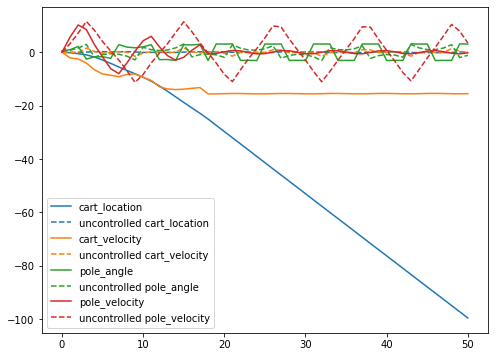

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
color_list = ['C{}--'.format(i) for i in range(4)]
for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
    ax.plot([i for i in range(steps+1)], [uc[i] for uc in uncontrolled_history], color_list[i], 
            label='uncontrolled {}'.format(index_to_variable[i]))
ax.legend()
# ax.set_ylim(-3,3)

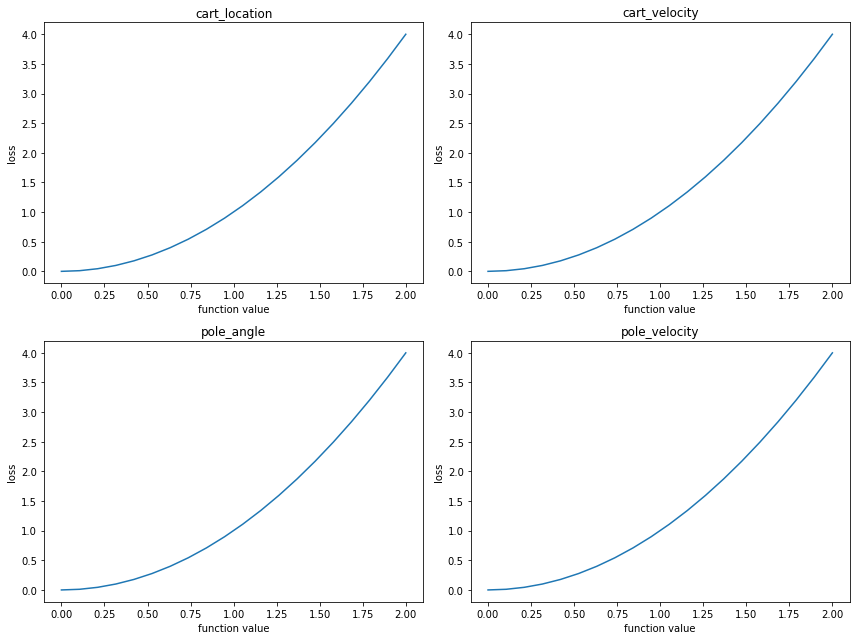

In [11]:
fig, axs = plt.subplots(2,2, figsize=(12,9))
total_loss = np.zeros(20)
for j in range(4):
    zer = [0,0,0,0]
    x_list = []
    for i in np.linspace(0,2,20):
        x_ = zer.copy()
        x_[j] = i
        x_list.append(x_)
        
    axs[int(round((j+1)/4,0)),j%2].plot(np.linspace(0,2,20), [loss(x_) for x_ in x_list])
    axs[int(round((j+1)/4,0)),j%2].set_xlabel('function value')
    axs[int(round((j+1)/4,0)),j%2].set_ylabel('loss')
    axs[int(round((j+1)/4,0)),j%2].set_title(index_to_variable[j])
    total_loss += np.array([loss(x_) for x_ in x_list])
fig.tight_layout()
# plt.plot([i for i in np.linspace(0,2,20)], total_loss, label='sum of all loss')
# plt.legend()
# plt.savefig(plot_path + 'new_loss_function')